# 基本的に遺伝的アルゴリズムを用いてやってみようと思う
パッケージの説明
https://www.jstatsoft.org/article/view/v053i04/v53i04.pdf

よくわからんので、何個かサンプルを試す

In [1]:
library(GA)

Warning message:
“package ‘GA’ was built under R version 3.4.4”Loading required package: foreach
Loading required package: iterators
Warning message:
“package ‘iterators’ was built under R version 3.4.4”Package 'GA' version 3.1.1
Type 'citation("GA")' for citing this R package in publications.


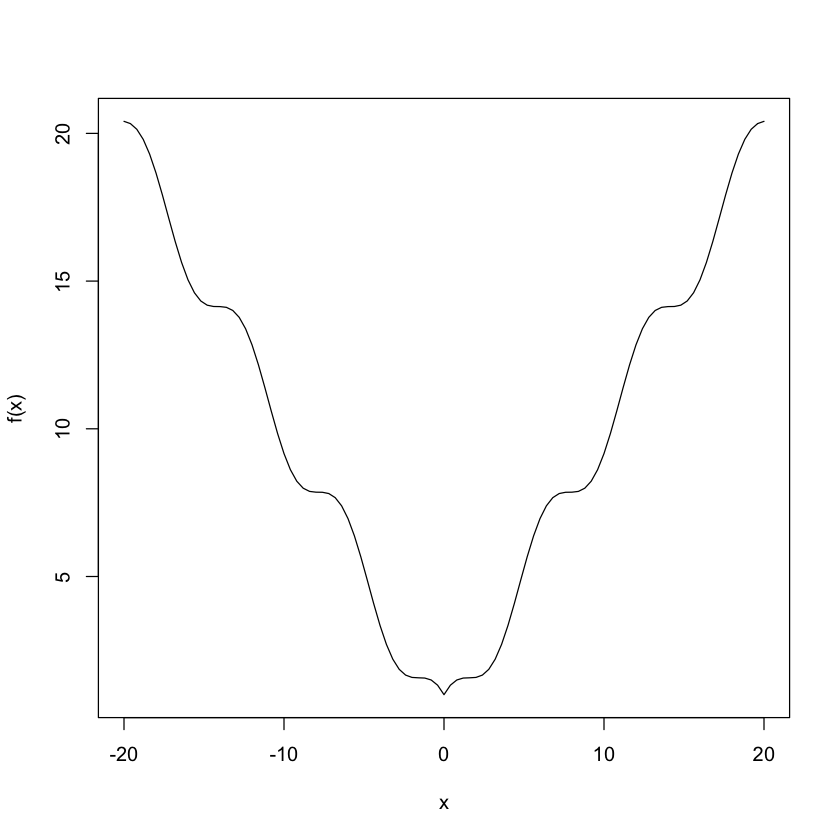

In [2]:
# |x| + cos(x)で実験(p11)
f <- function(x){abs(x) + cos(x)}
min <- -20
max <- +20
curve(f, min, max)

In [3]:
fitness <- function(x){-f(x)}
GA_1 <- ga(type = "real-valued", fitness = fitness, lower = min, upper = max)

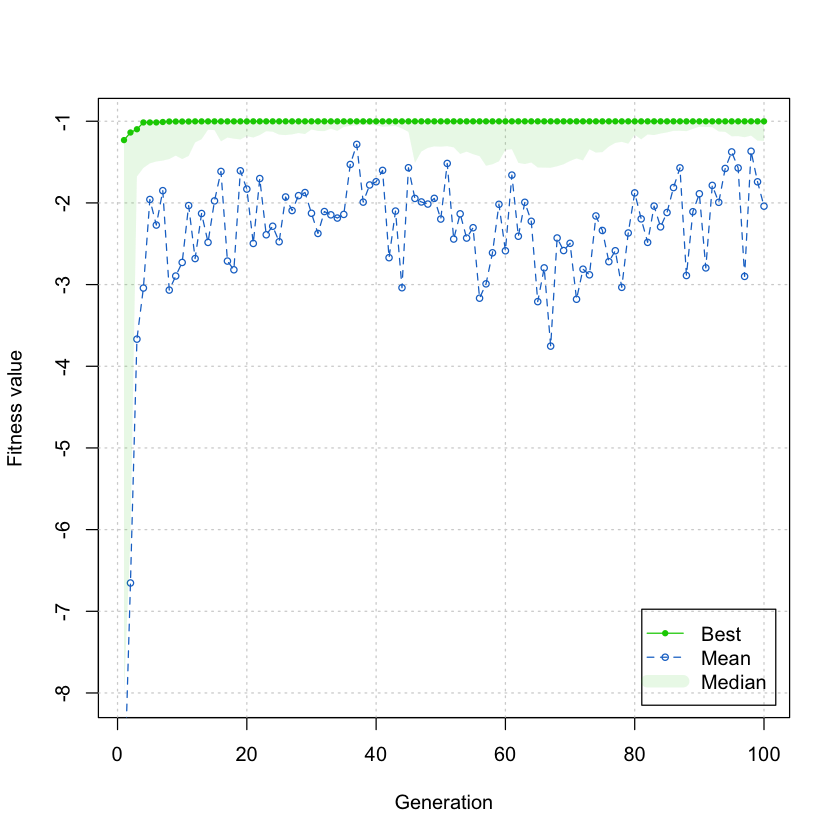

In [4]:
plot(GA_1)

In [5]:
summary(GA_1)

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 
Search domain = 
       x1
lower -20
upper  20

GA results: 
Iterations             = 100 
Fitness function value = -1.001183 
Solution = 
              x1
[1,] -0.00118412

In [6]:
# 最大値のx
GA_1@solution

x1         
[1,] -0.00118412

In [7]:
#　値
GA_1@fitnessValue

[1] -1.001183

In [8]:
GA_1

An object of class "ga"

Call:
ga(type = "real-valued", fitness = fitness, lower = min, upper = max)

Available slots:
 [1] "call"         "type"         "lower"        "upper"        "nBits"       
 [6] "names"        "popSize"      "iter"         "run"          "maxiter"     
[11] "suggestions"  "population"   "elitism"      "pcrossover"   "pmutation"   
[16] "fitness"      "summary"      "bestSol"      "fitnessValue" "solution"    

まあまあの最大値を得ている模様

In [9]:
# 巡回セールスマン問題(p30)
data("eurodist", package = "datasets")
D <- as.matrix(eurodist)
D

Athens Barcelona Brussels Calais Cherbourg Cologne Copenhagen
Athens             0   3313      2963     3175   3339      2762    3276      
Barcelona       3313      0      1318     1326   1294      1498    2218      
Brussels        2963   1318         0      204    583       206     966      
Calais          3175   1326       204        0    460       409    1136      
Cherbourg       3339   1294       583      460      0       785    1545      
Cologne         2762   1498       206      409    785         0     760      
Copenhagen      3276   2218       966     1136   1545       760       0      
Geneva          2610    803       677      747    853      1662    1418      
Gibraltar       4485   1172      2256     2224   2047      2436    3196      
Hamburg         2977   2018       597      714   1115       460     460      
Hook of Holland 3030   1490       172      330    731       269     269      
Lisbon          4532   1305      2084     2052   1827      2290    2971      
Lyons           2753    645       690      739    789       714    1458      
Madrid          3949    636      1558     1550   1347      1764    2498      
Marseilles      2865    521      1011     1059   1101      1035    1778      
Milan           2282   1014       925     1077   1209       911    1537      
Munich          2179   1365       747      977   1160       583    1104      
Paris           3000   1033       285      280    340       465    1176      
Rome             817   1460      1511     1662   1794      1497    2050      
Stockholm       3927   2868      1616     1786   2196      1403     650      
Vienna          1991   1802      1175     1381   1588       937    1455      
                Geneva Gibraltar Hamburg ⋯ Lisbon Lyons Madrid Marseilles Milan
Athens          2610   4485      2977    ⋯ 4532   2753  3949   2865       2282 
Barcelona        803   1172      2018    ⋯ 1305    645   636    521       1014 
Brussels         677   2256       597    ⋯ 2084    690  1558   1011        925 
Calais           747   2224       714    ⋯ 2052    739  1550   1059       1077 
Cherbourg        853   2047      1115    ⋯ 1827    789  1347   1101       1209 
Cologne         1662   2436       460    ⋯ 2290    714  1764   1035        911 
Copenhagen      1418   3196       460    ⋯ 2971   1458  2498   1778       1537 
Geneva             0   1975      1118    ⋯ 1936    158  1439    425        328 
Gibraltar       1975      0      2897    ⋯  676   1817   698   1693       2185 
Hamburg         1118   2897         0    ⋯ 2671   1159  2198   1479       1238 
Hook of Holland  895   2428       550    ⋯ 2280    863  1730   1183       1098 
Lisbon          1936    676      2671    ⋯    0   1178   668   1762       2250 
Lyons            158   1817      1159    ⋯ 1178      0  1281    320        328 
Madrid          1439    698      2198    ⋯  668   1281     0   1157       1724 
Marseilles       425   1693      1479    ⋯ 1762    320  1157      0        618 
Milan            328   2185      1238    ⋯ 2250    328  1724    618          0 
Munich           591   2565       805    ⋯ 2507    724  2010   1109        331 
Paris            513   1971       877    ⋯ 1799    471  1273    792        856 
Rome             995   2631      1751    ⋯ 2700   1048  2097   1011        586 
Stockholm       2068   3886       949    ⋯ 3231   2108  3188   2428       2187 
Vienna          1019   2974      1155    ⋯ 2937   1157  2409   1363        898 
                Munich Paris Rome Stockholm Vienna
Athens          2179   3000   817 3927      1991  
Barcelona       1365   1033  1460 2868      1802  
Brussels         747    285  1511 1616      1175  
Calais           977    280  1662 1786      1381  
Cherbourg       1160    340  1794 2196      1588  
Cologne          583    465  1497 1403       937  
Copenhagen      1104   1176  2050  650      1455  
Geneva           591    513   995 2068      1019  
Gibraltar       2565   1971  2631 3886      2974  
Hamburg          805    877  1

In [10]:
tourLength <- function(tour, distMatrix) {
    tour <- c(tour, tour[1])
    route <- embed(tour, 2)[,2:1]
    sum(distMatrix[route])
}
tspFitness <- function(tour, ...) 1/tourLength(tour, ...)
GA_2 <- ga(type = "permutation", fitness = tspFitness, distMatrix = D,
         min = 1, max = attr(eurodist, "Size"), popSize = 50, maxiter = 5000,
         run = 500, pmutation = 0.2)
summary(GA_2)

Warning message in ga(type = "permutation", fitness = tspFitness, distMatrix = D, :
“'min' arg is deprecated. Use 'lower' instead.”Warning message in ga(type = "permutation", fitness = tspFitness, distMatrix = D, :
“'max' arg is deprecated. Use 'upper' instead.”

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  permutation 
Population size       =  50 
Number of generations =  5000 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.2 

GA results: 
Iterations             = 2139 
Fitness function value = 7.756147e-05 
Solutions = 
     x1 x2 x3 x4 x5 x6 x7 x8 x9 x10  ...  x20 x21
[1,]  3 11  7 20 10  6 17 21  1  19        18   4
[2,] 18  4  3 11  7 20 10  6 17  21        12   5

In [11]:
apply(GA_2@solution, 1, tourLength, D)

[1] 12893 12893

In [12]:
# type='binary'の問題でもう一個(p20)
# 4.5 Subset selection
data("fat", package = "UsingR")
mod <- lm(body.fat.siri ~ age + weight + height + neck + chest + abdomen +
          hip + thigh + knee + ankle + bicep + forearm + wrist, data = fat)
summary(mod)


Call:
lm(formula = body.fat.siri ~ age + weight + height + neck + chest + 
    abdomen + hip + thigh + knee + ankle + bicep + forearm + 
    wrist, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1687  -2.8639  -0.1014   3.2085  10.0068 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18.18849   17.34857  -1.048  0.29551    
age           0.06208    0.03235   1.919  0.05618 .  
weight       -0.08844    0.05353  -1.652  0.09978 .  
height       -0.06959    0.09601  -0.725  0.46925    
neck         -0.47060    0.23247  -2.024  0.04405 *  
chest        -0.02386    0.09915  -0.241  0.81000    
abdomen       0.95477    0.08645  11.044  < 2e-16 ***
hip          -0.20754    0.14591  -1.422  0.15622    
thigh         0.23610    0.14436   1.636  0.10326    
knee          0.01528    0.24198   0.063  0.94970    
ankle         0.17400    0.22147   0.786  0.43285    
bicep         0.18160    0.17113   1.061  0.28966    
forearm       0.45

In [13]:
x <- model.matrix(mod)[, -1]
y <- model.response(model.frame(mod))
# Then, the fitness function to be maximized can be defined as follows:
fitness <- function(string) {
    inc <- which(string == 1)
    X <- cbind(1, x[,inc])
    mod <- lm.fit(X, y)
    class(mod) <- "lm"
    -AIC(mod)
}

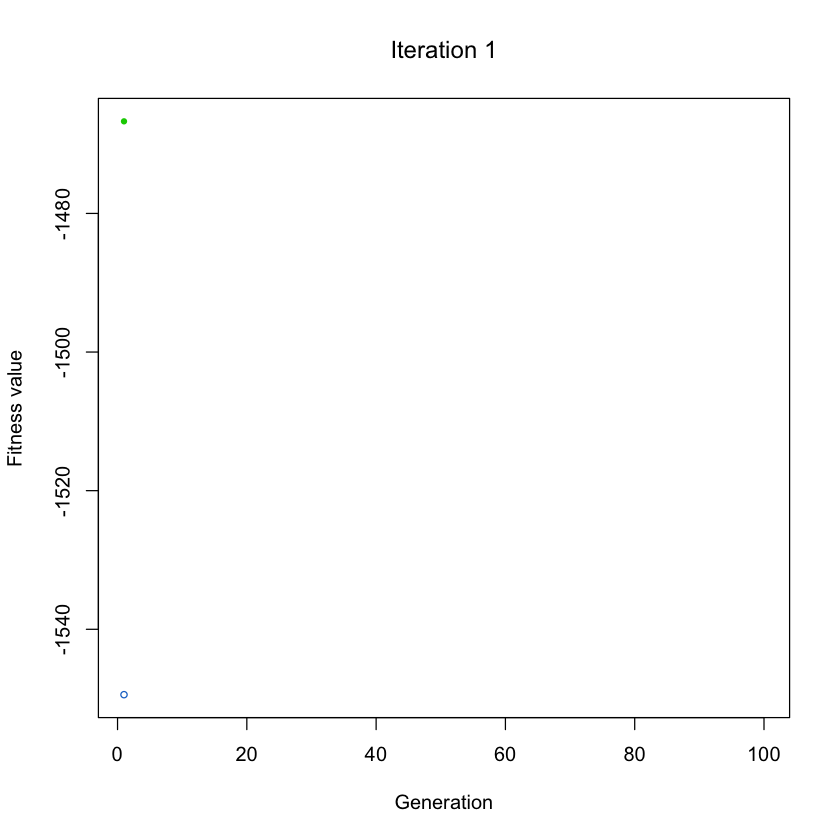

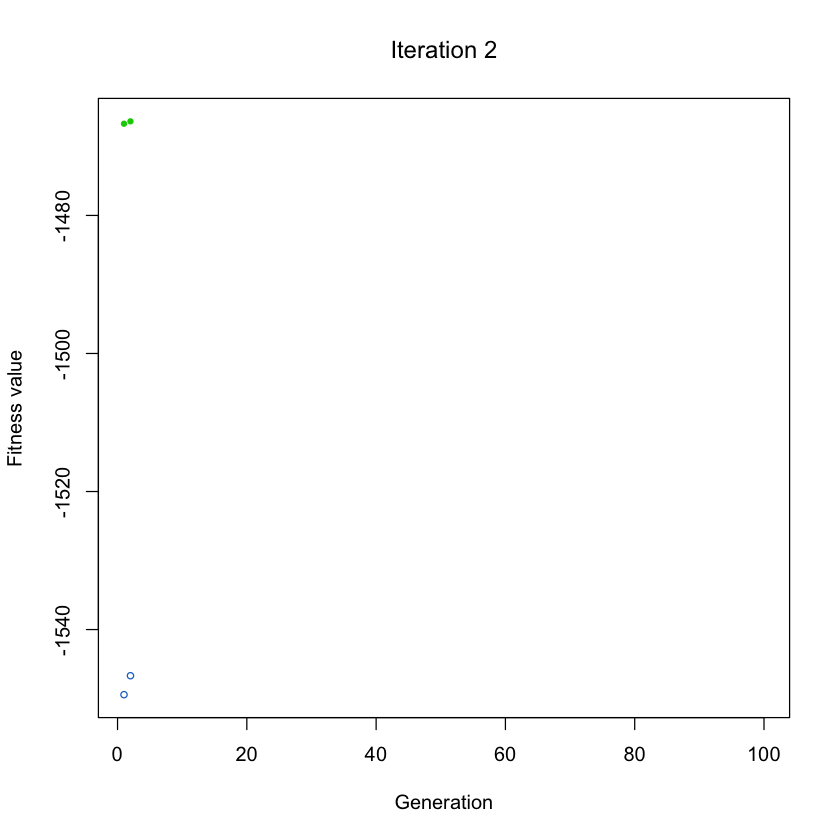

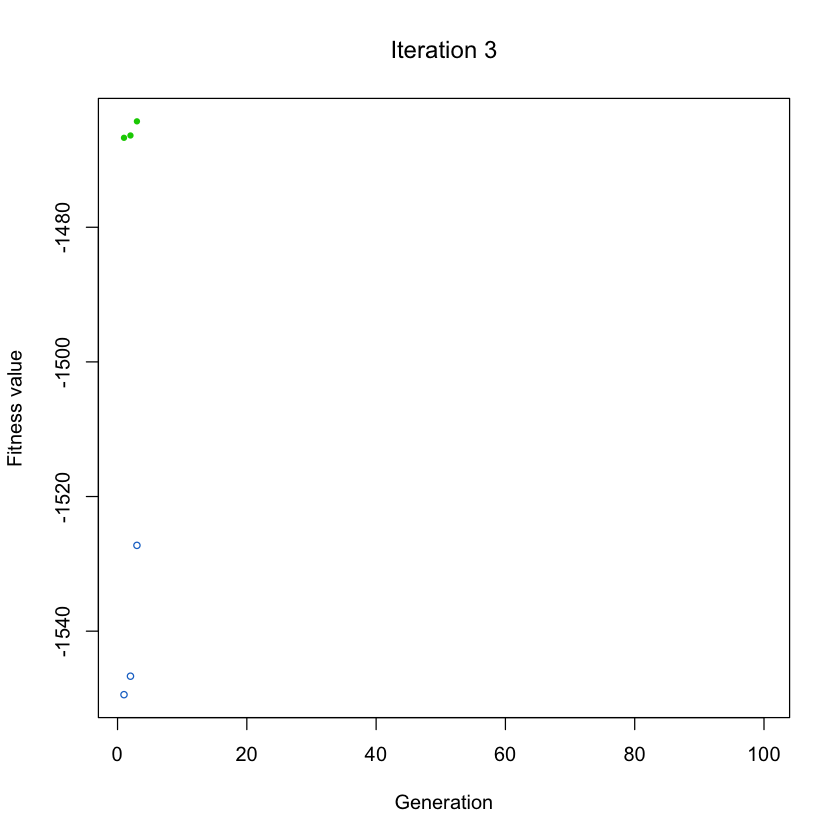

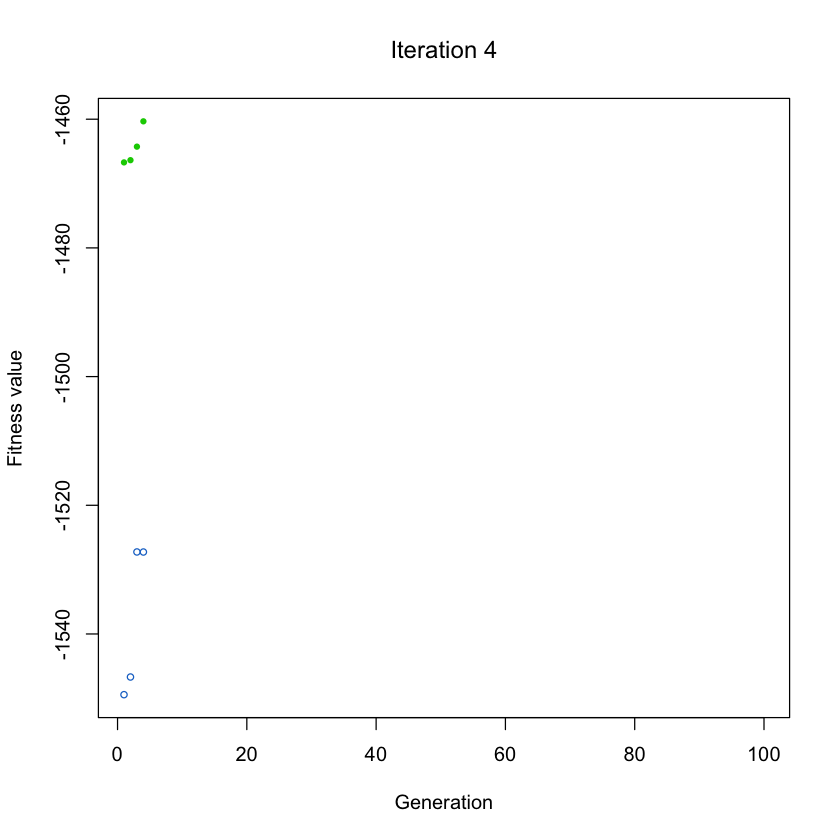

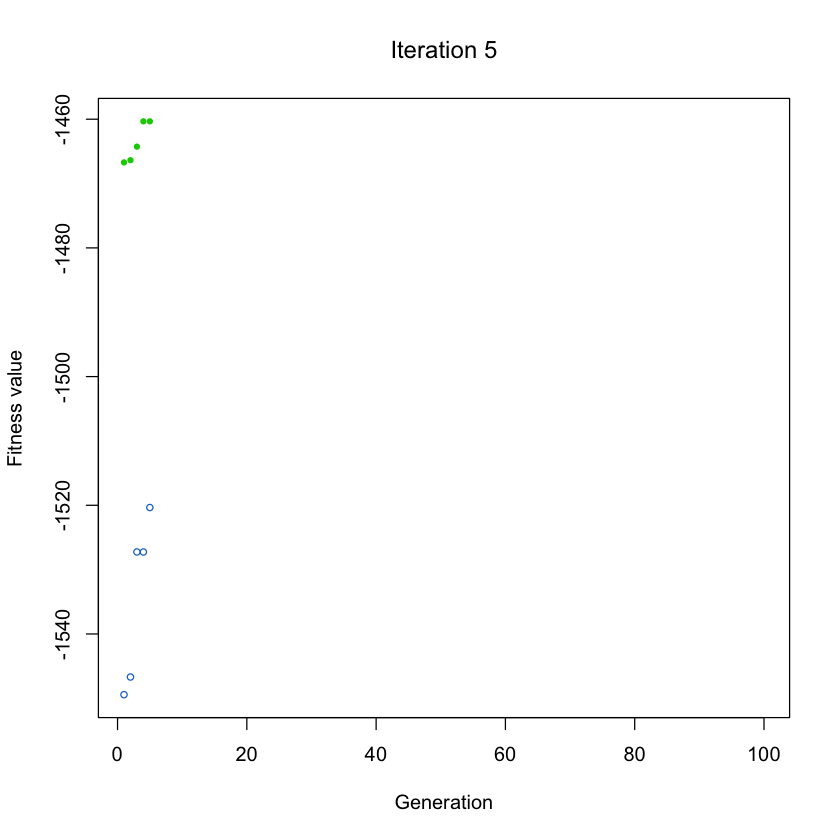

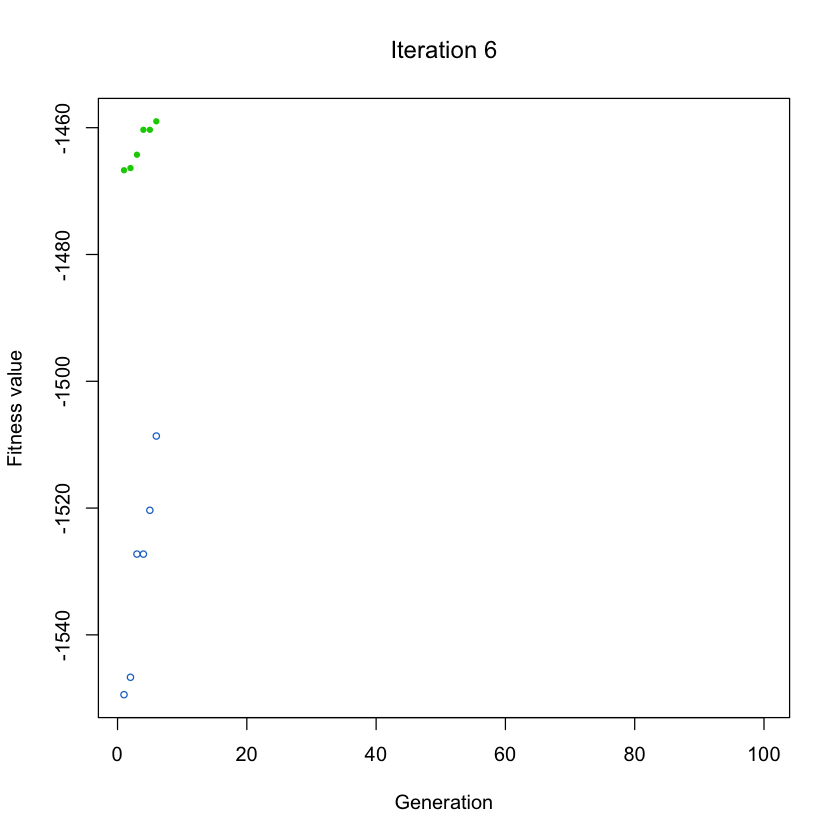

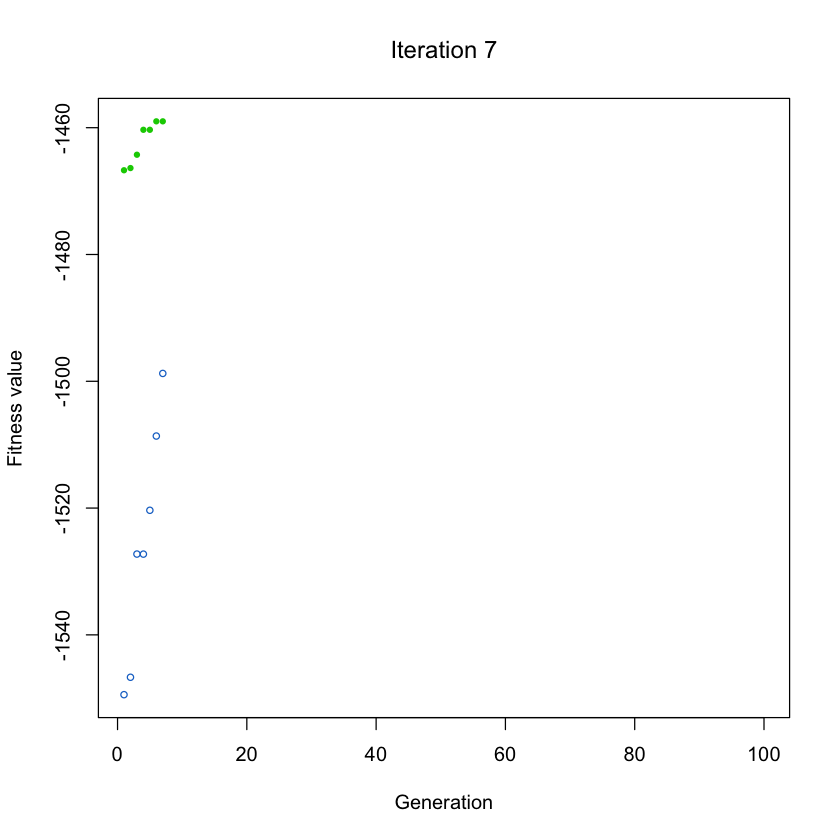

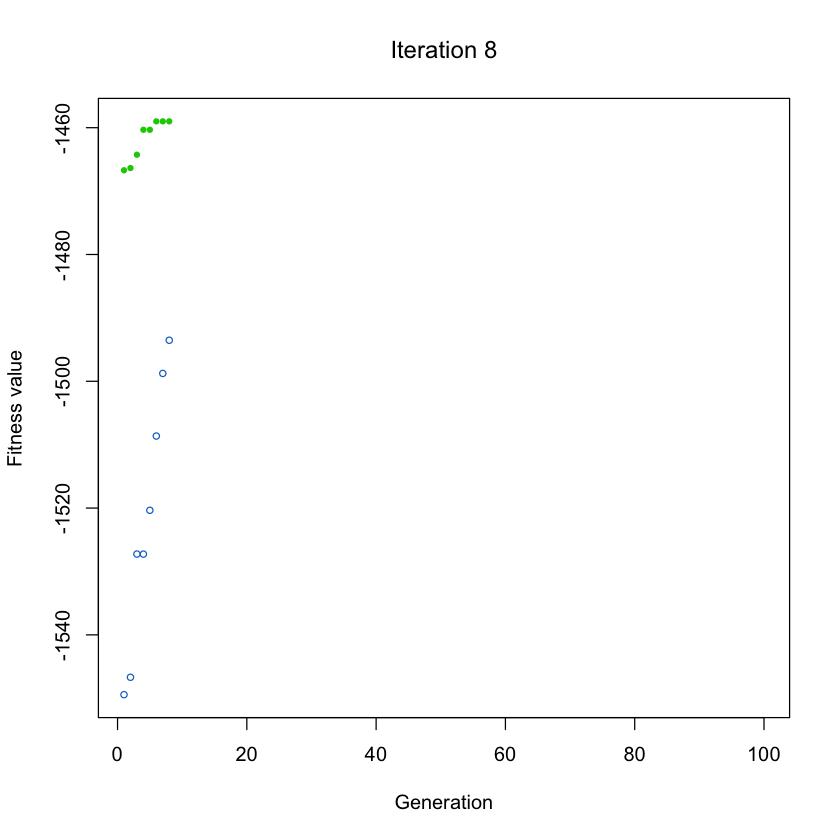

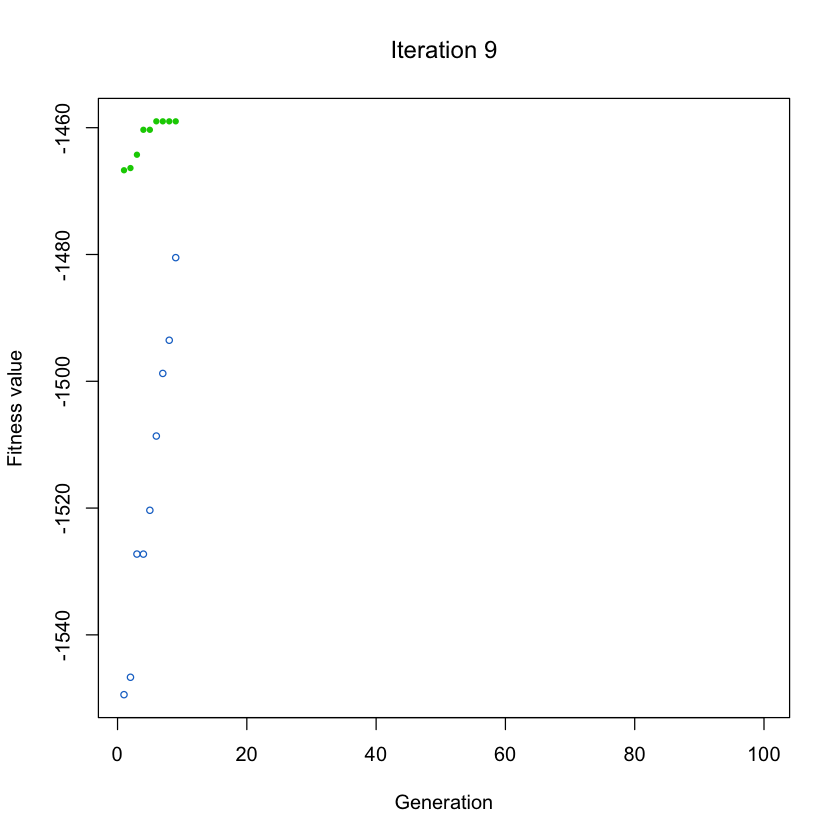

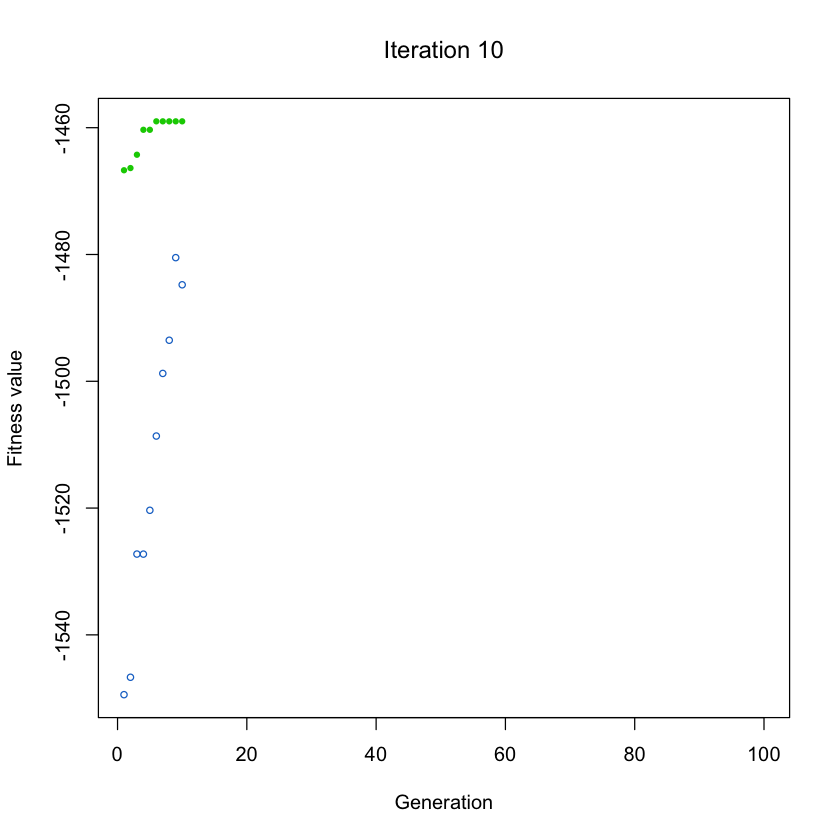

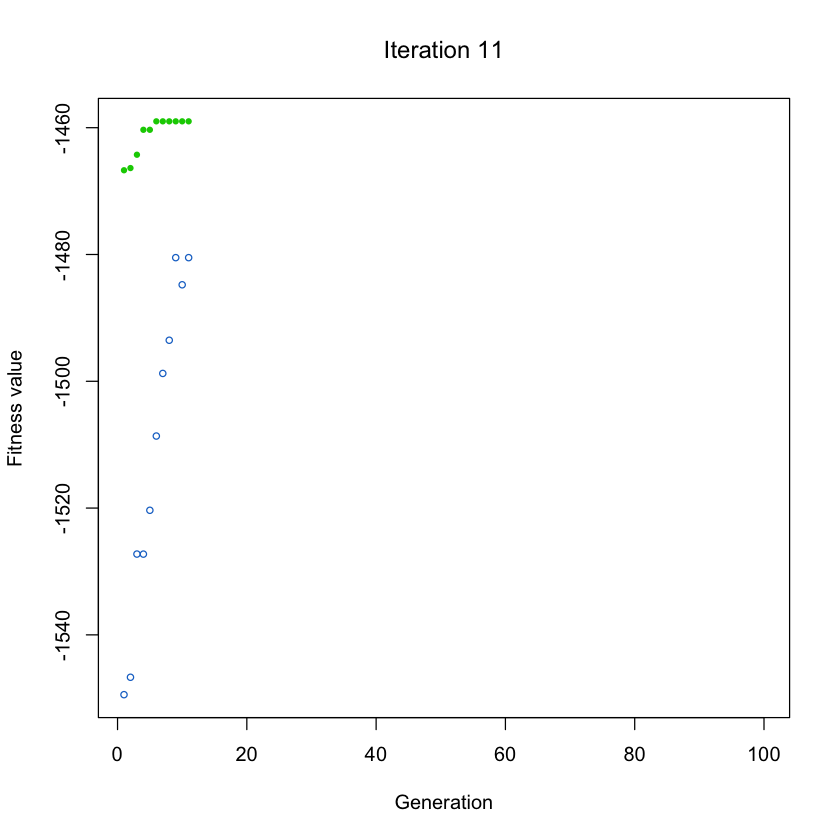

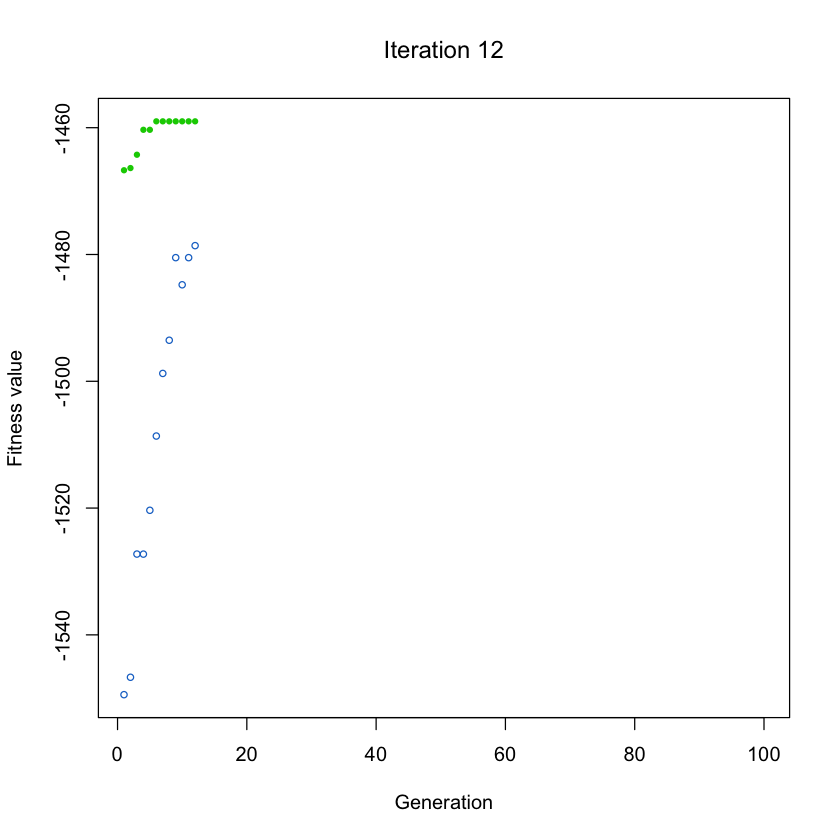

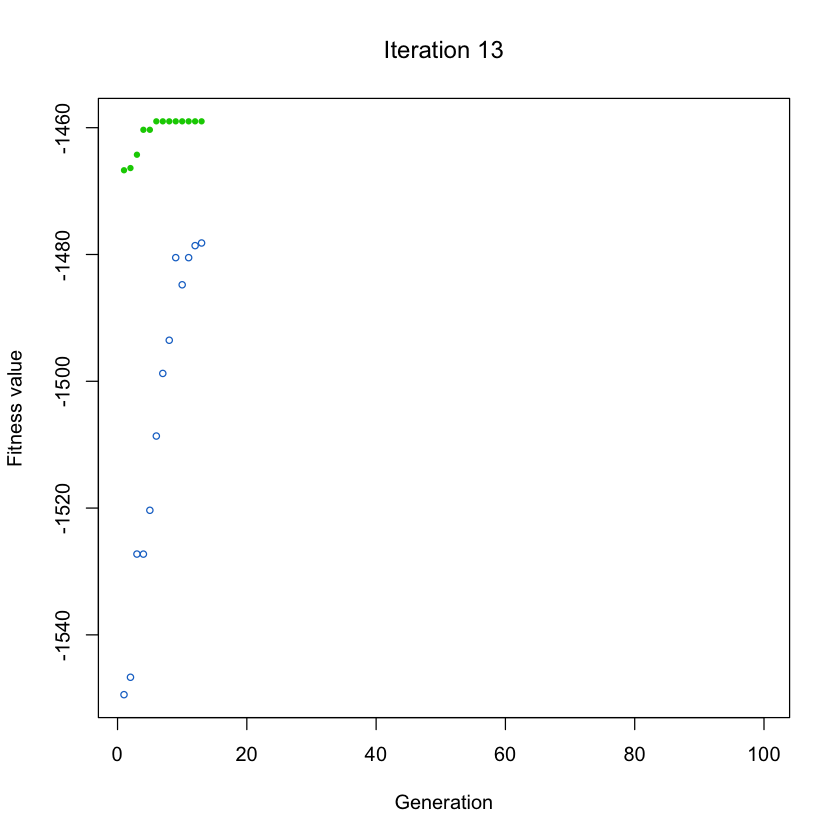

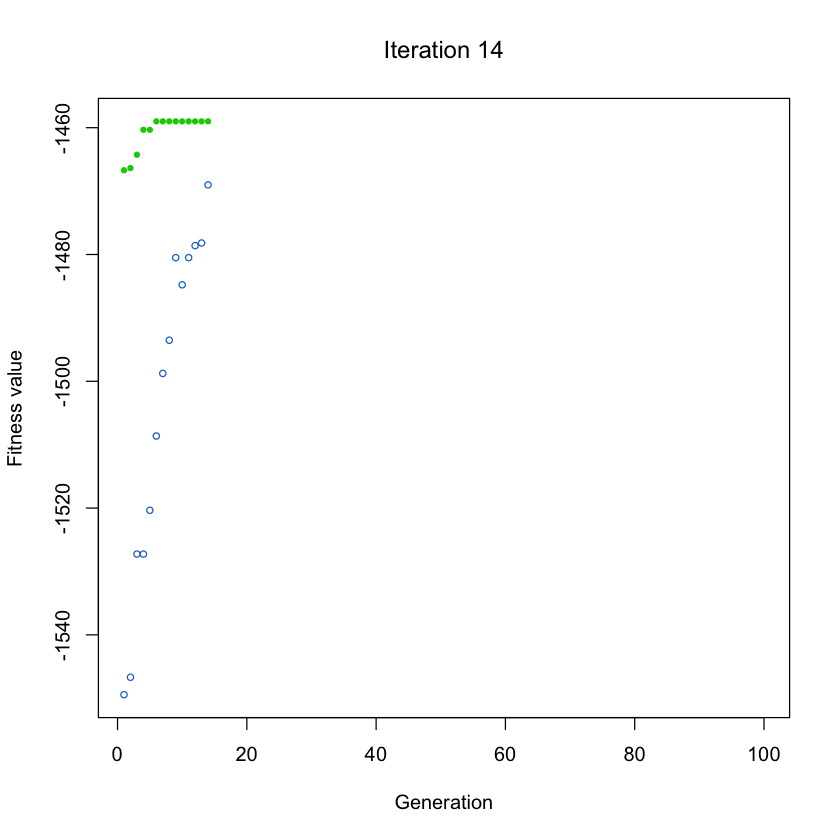

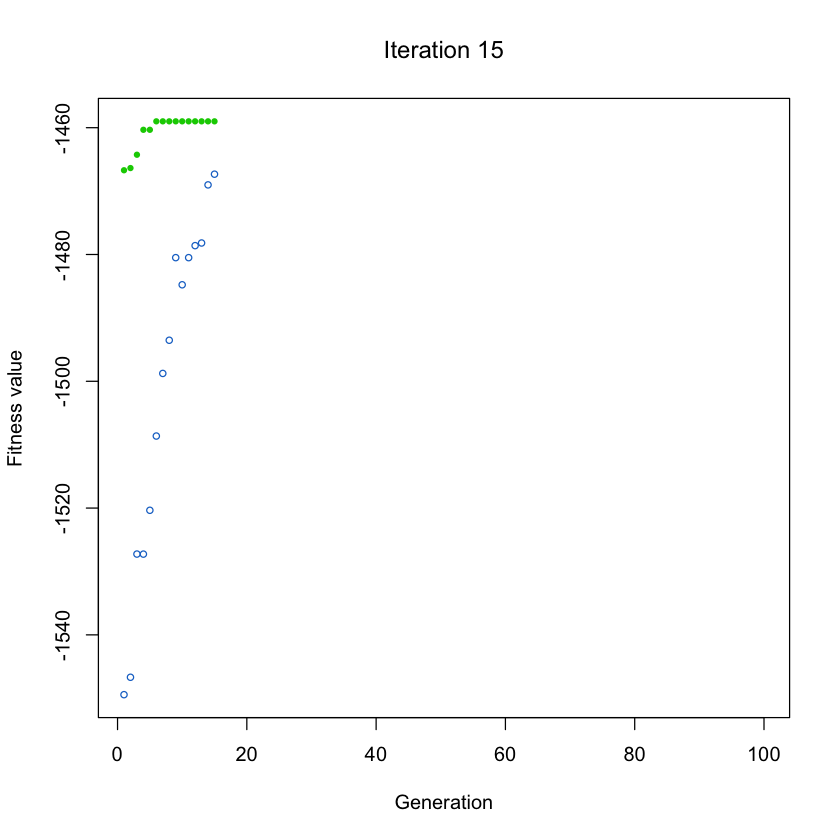

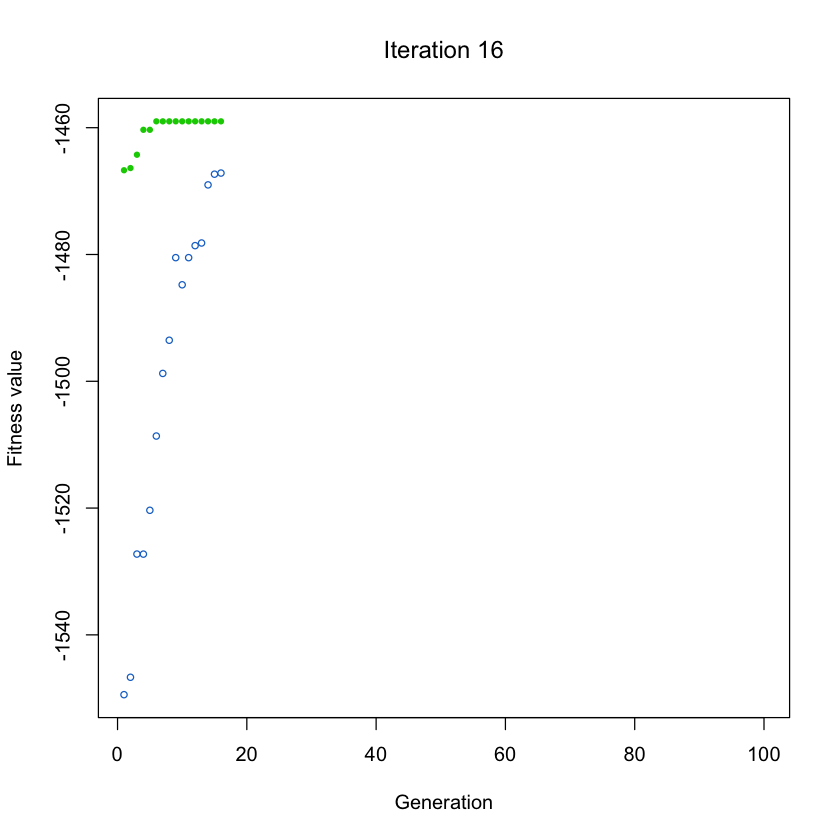

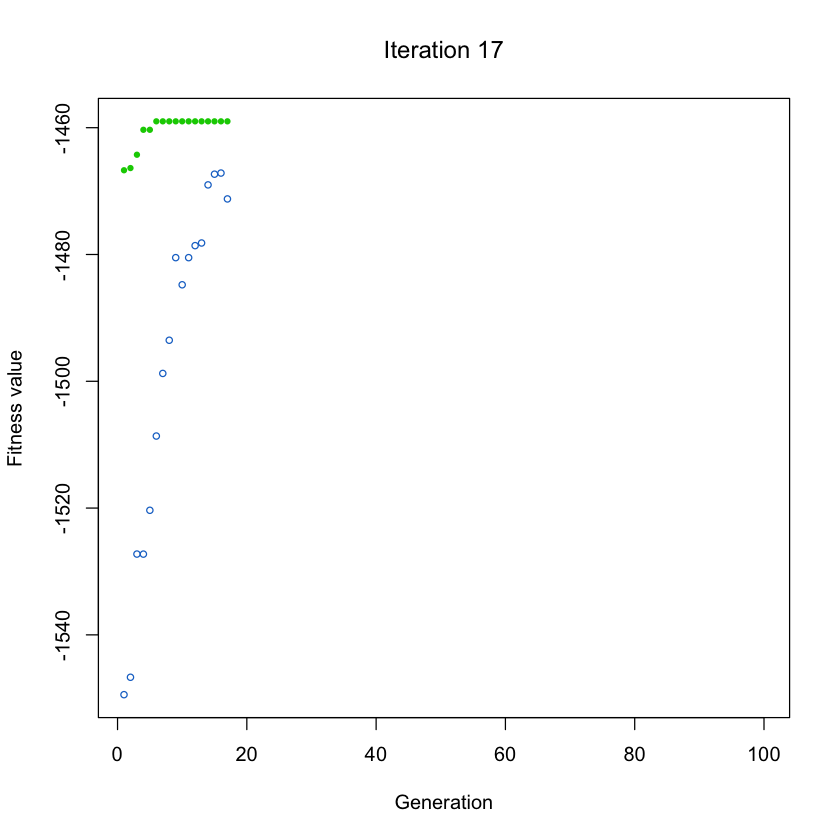

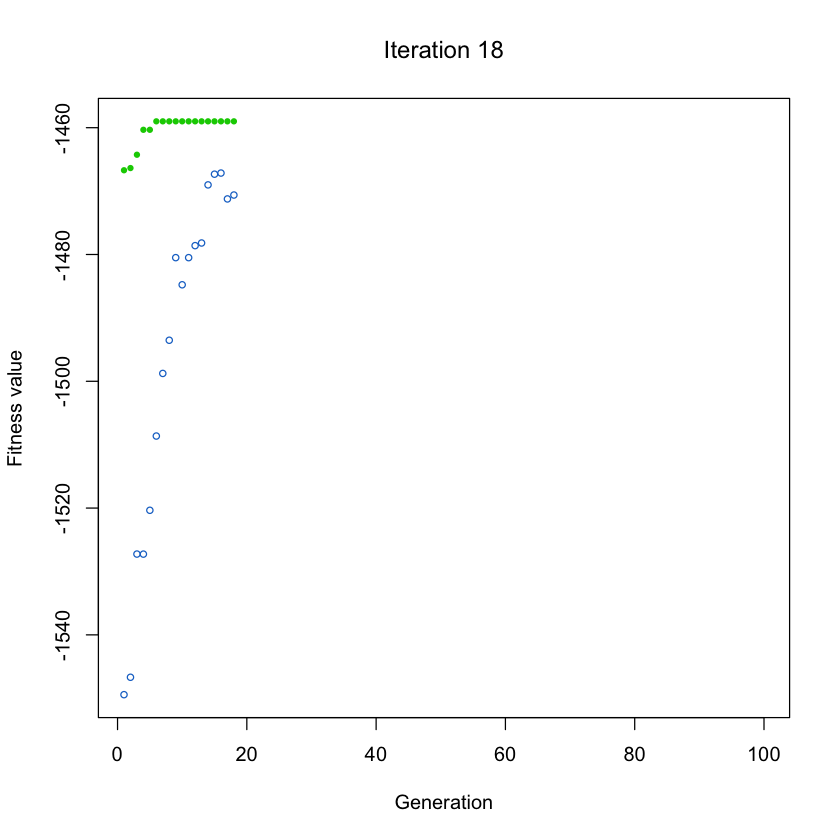

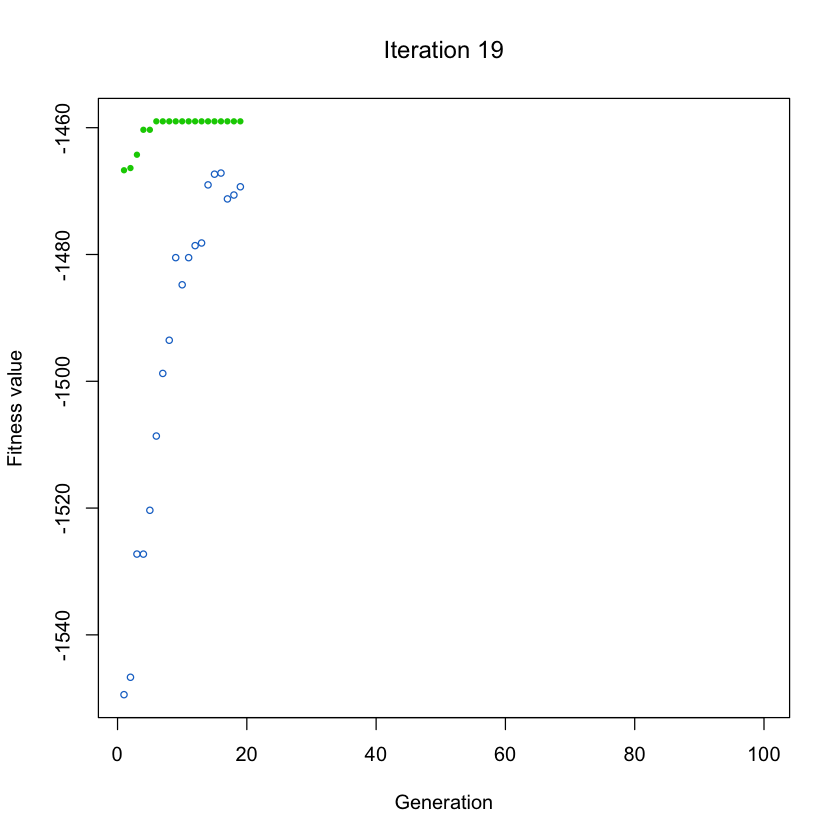

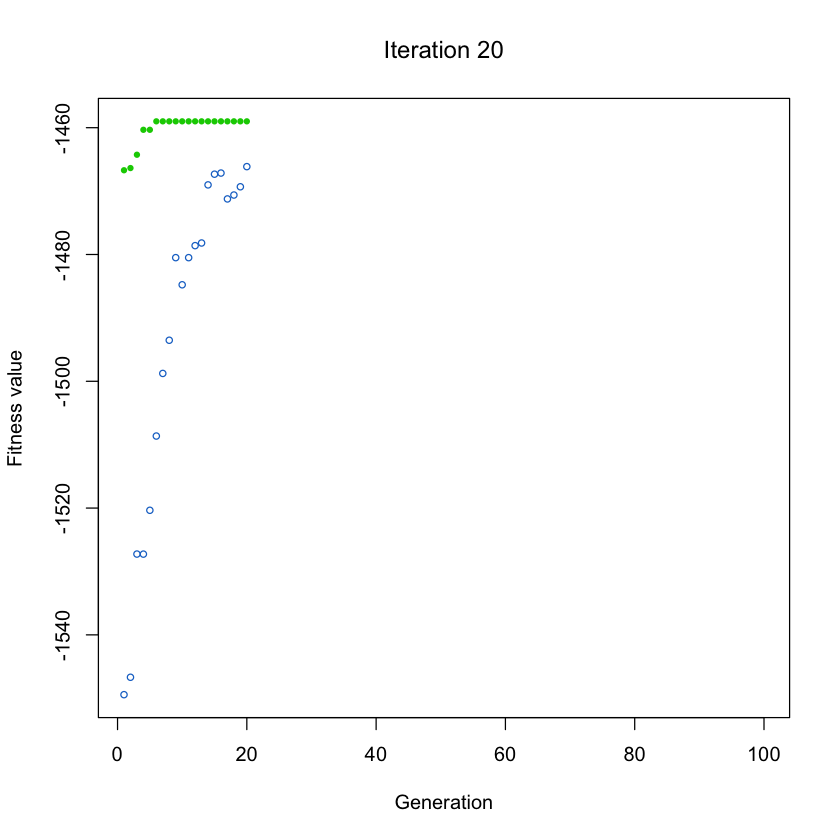

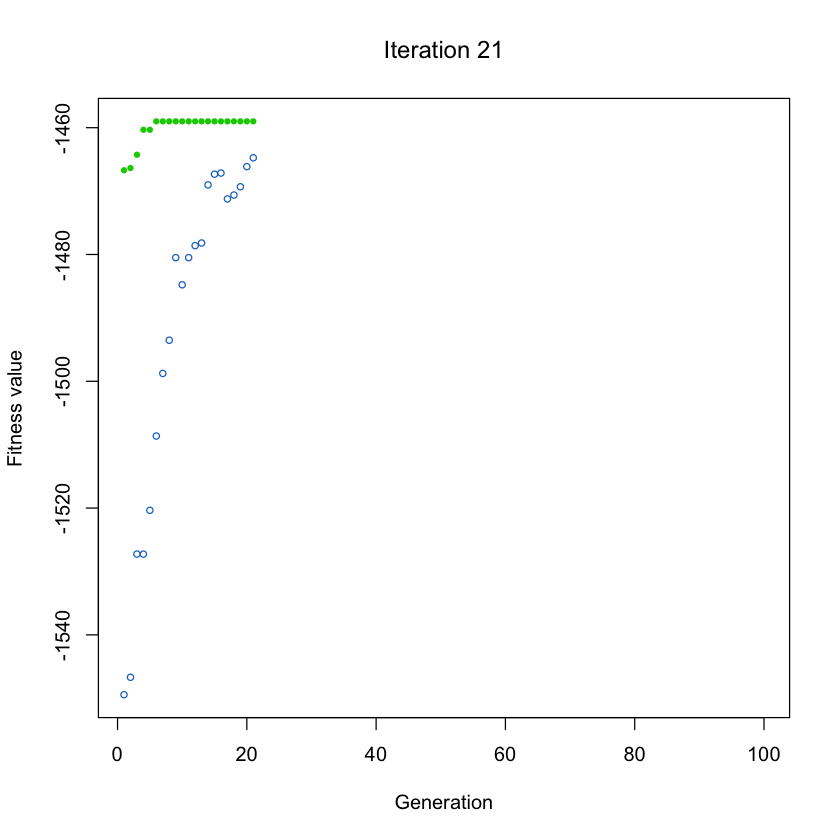

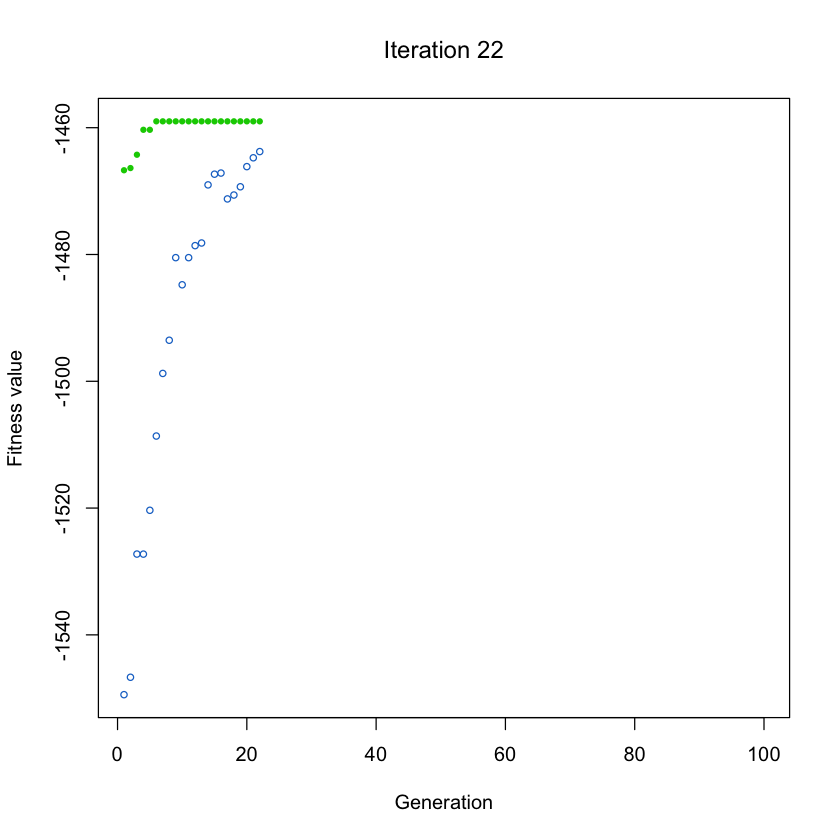

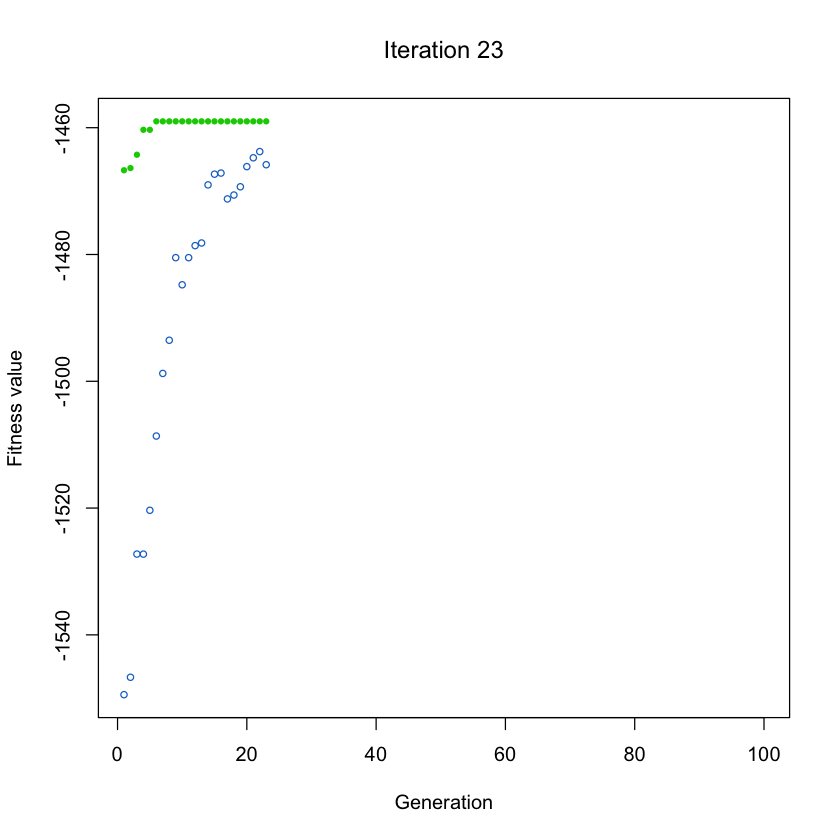

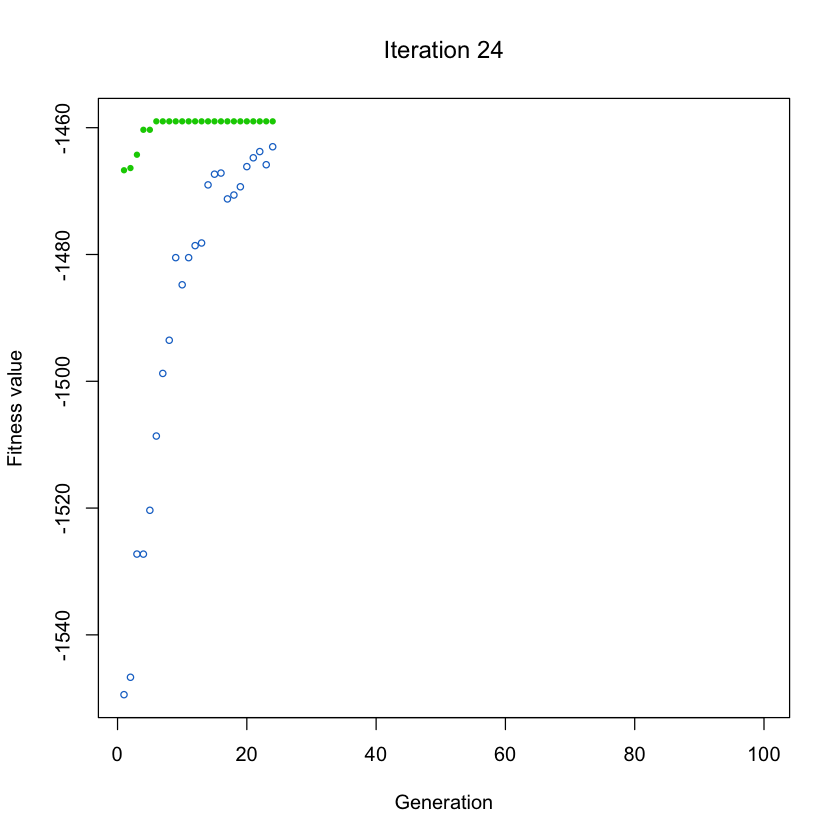

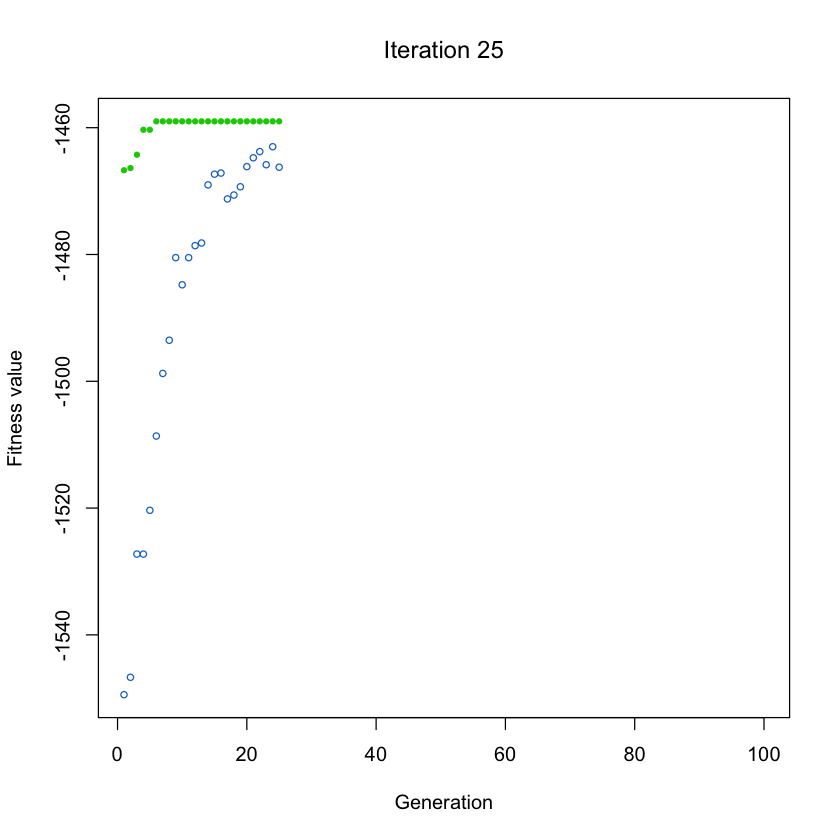

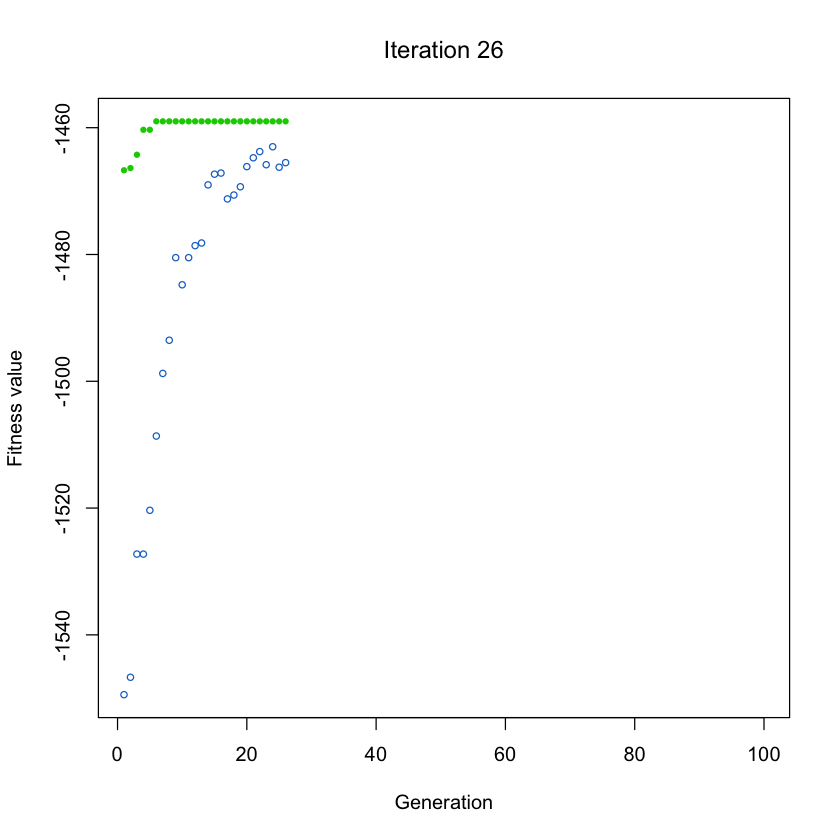

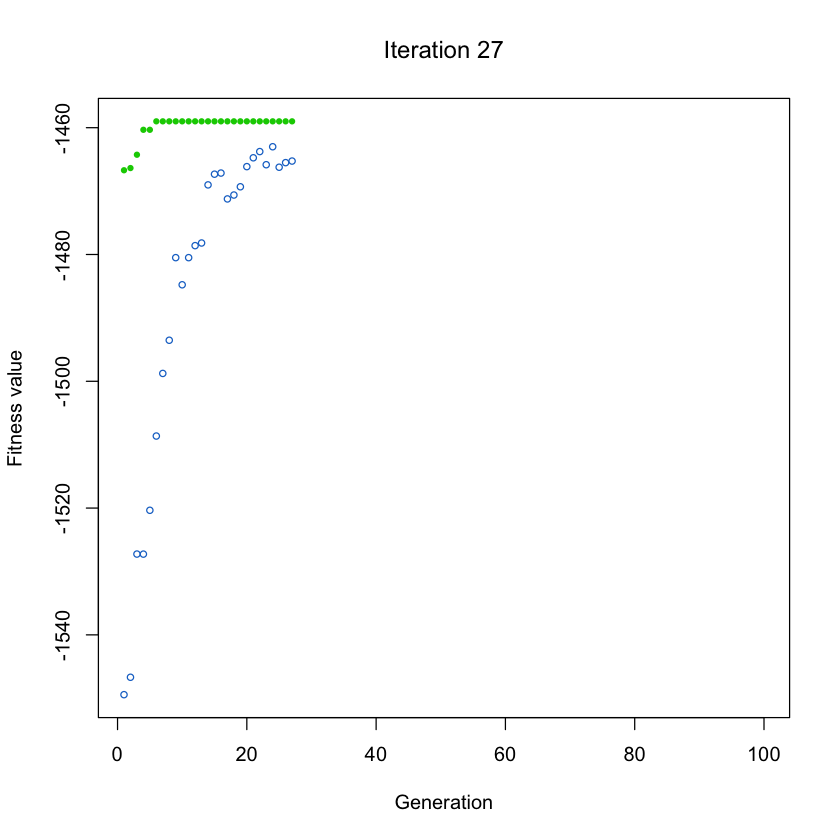

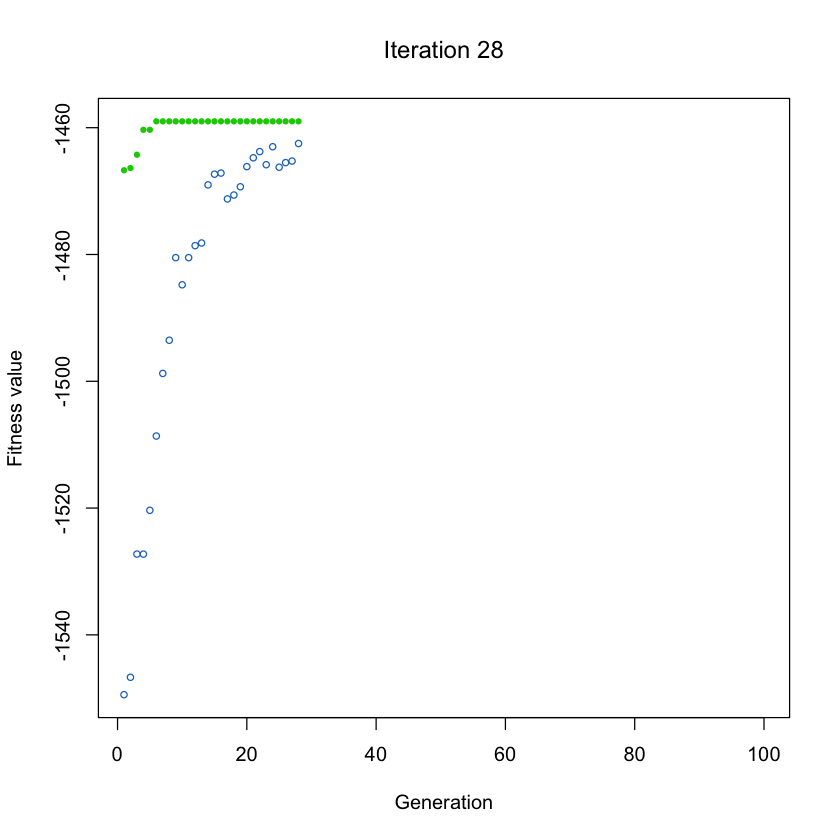

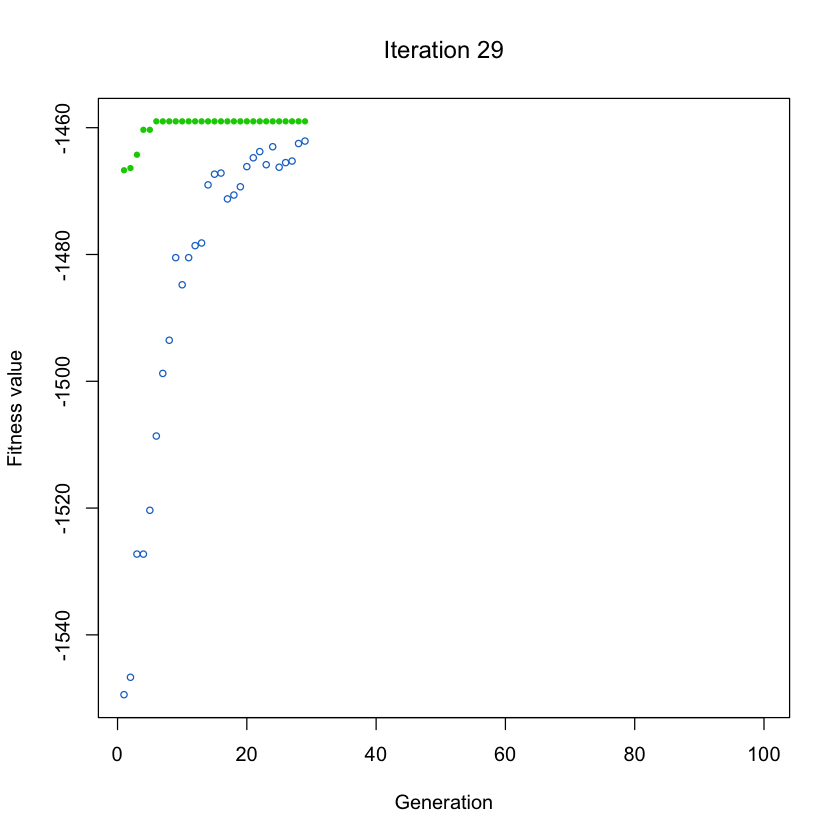

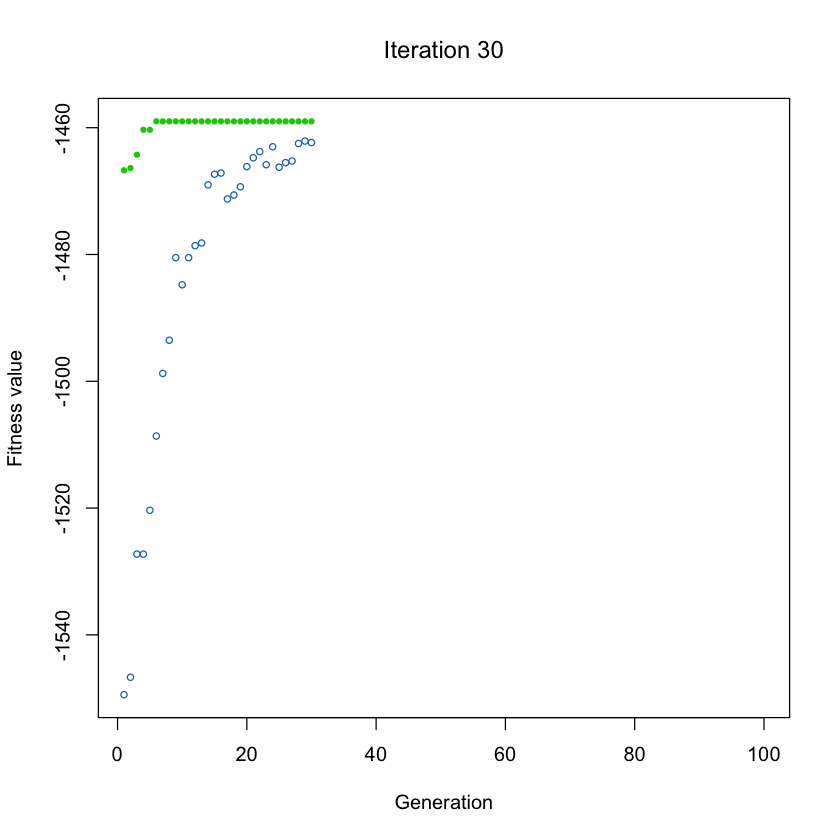

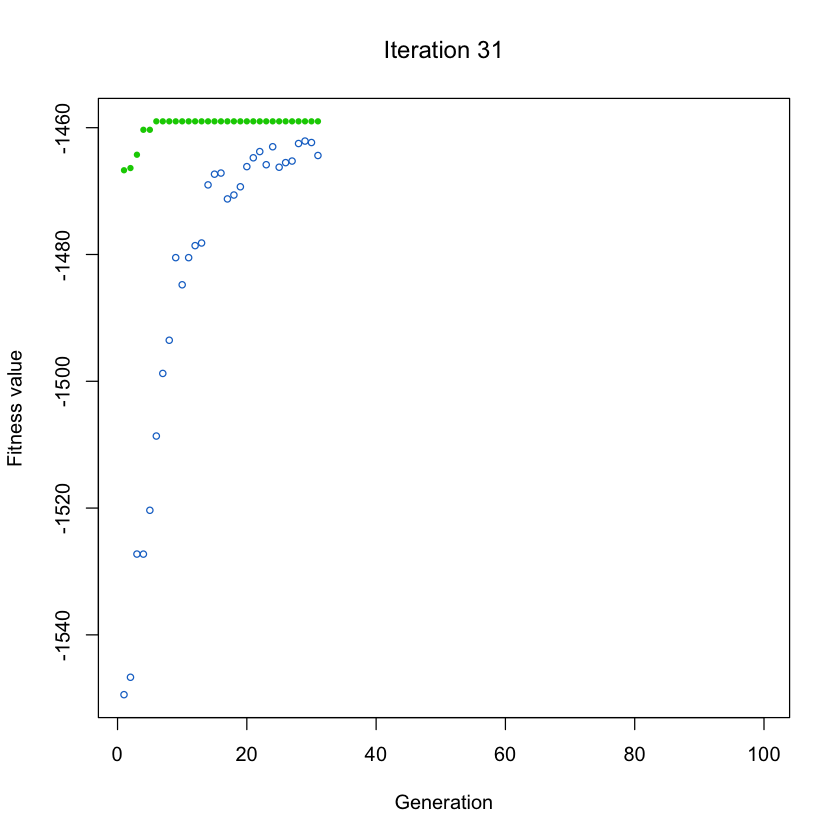

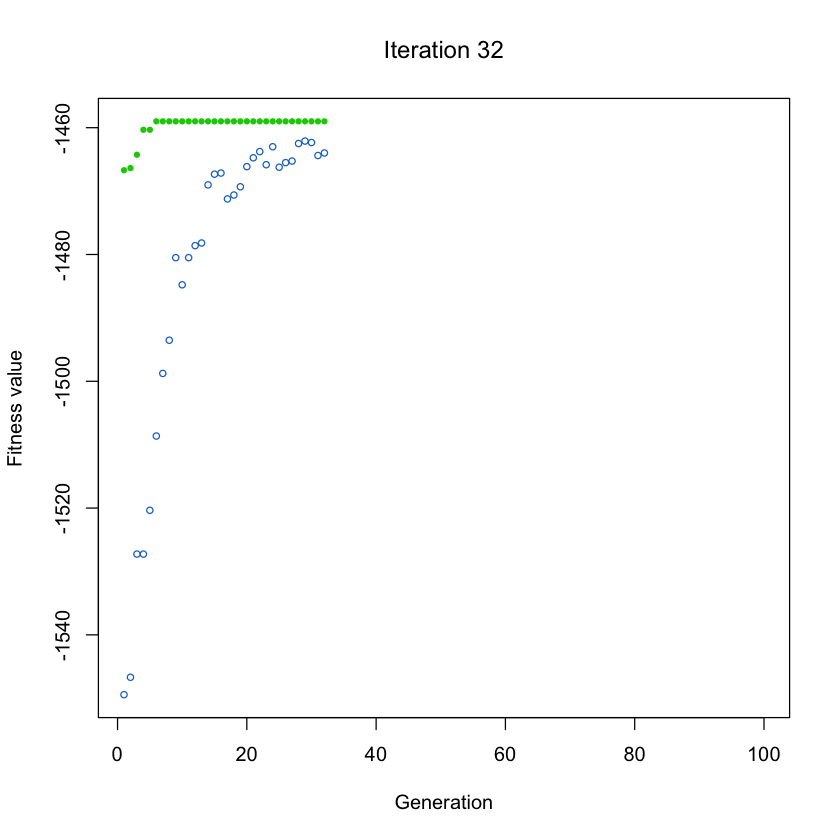

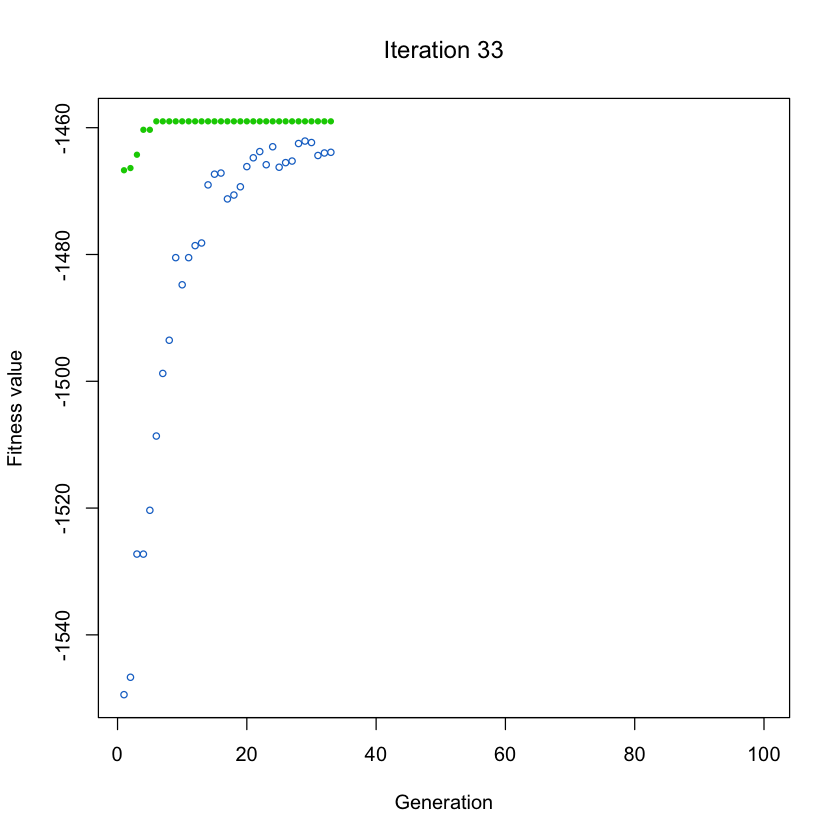

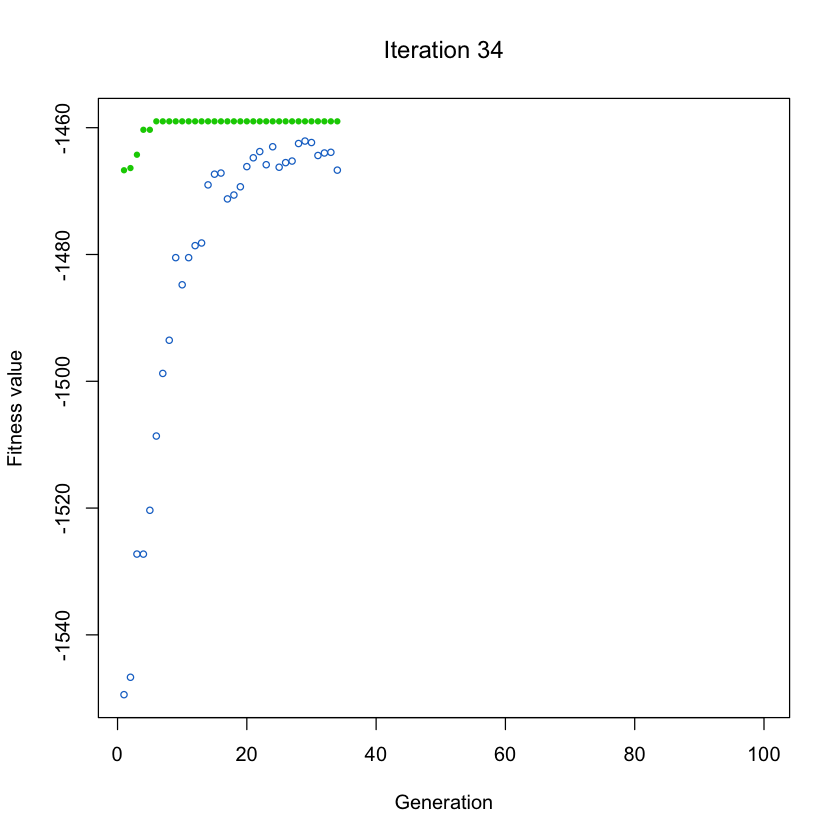

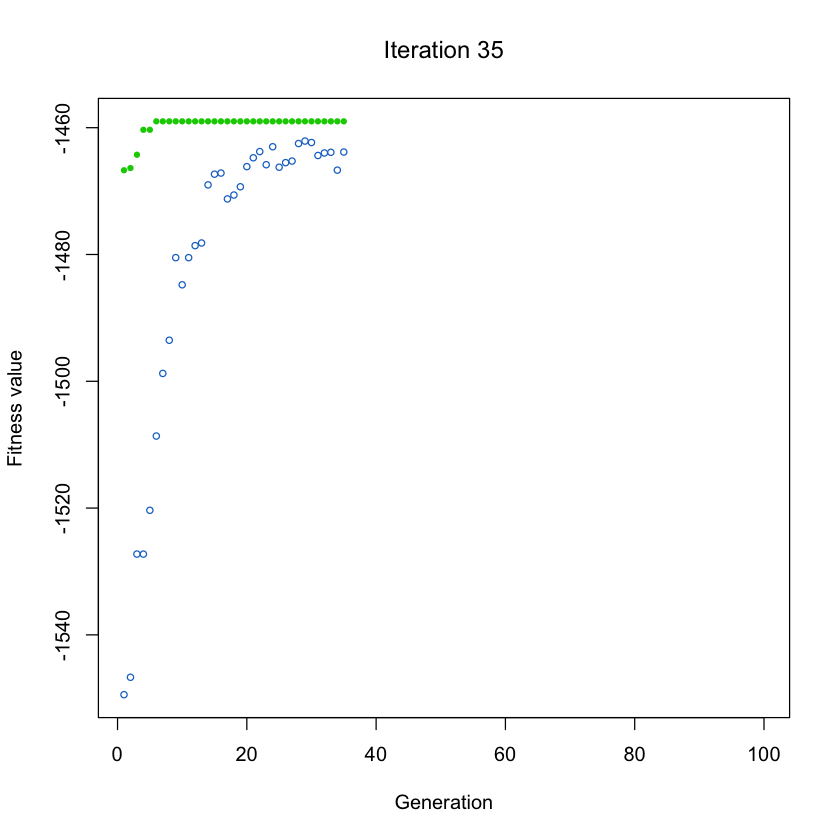

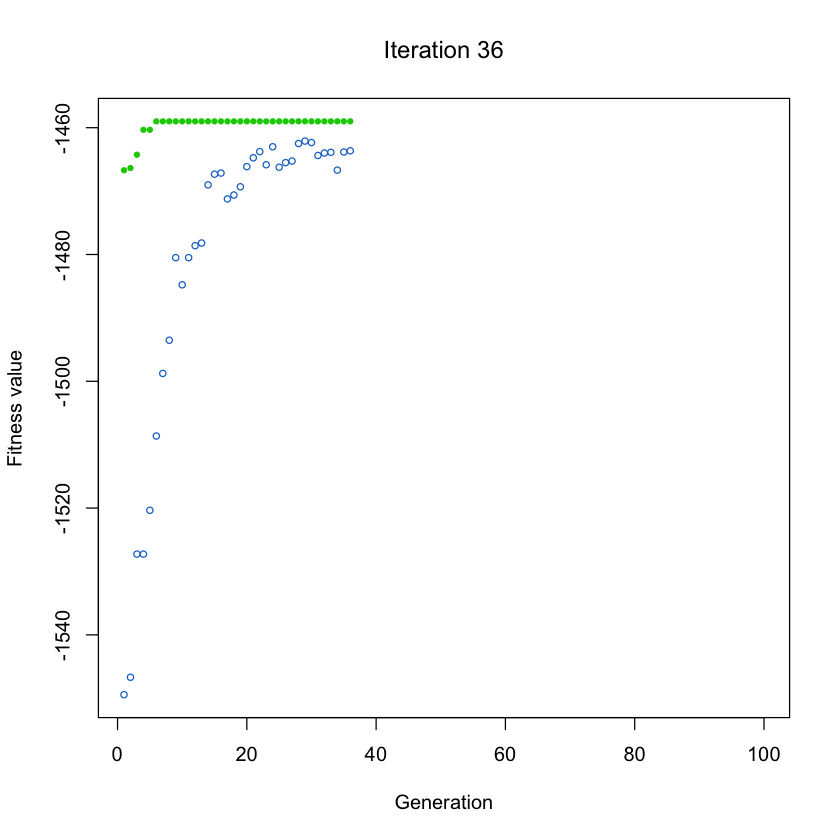

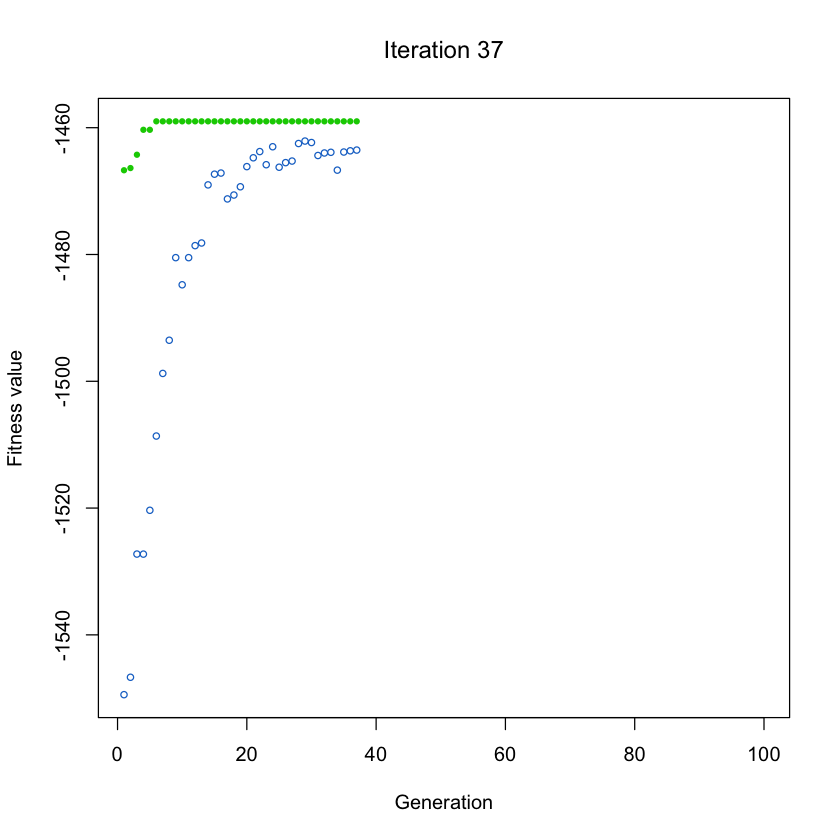

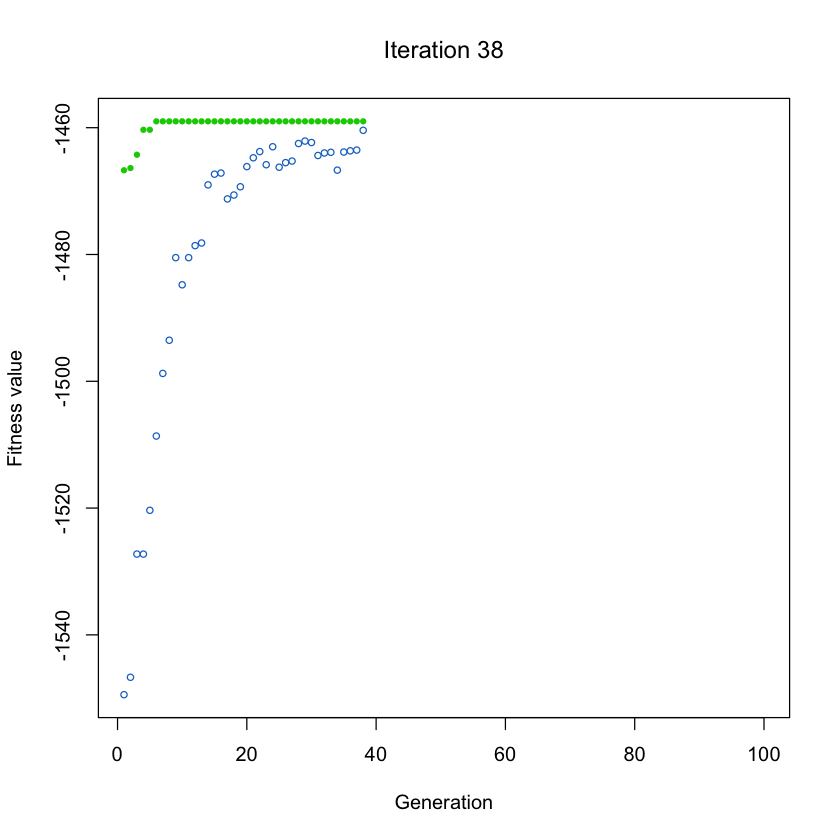

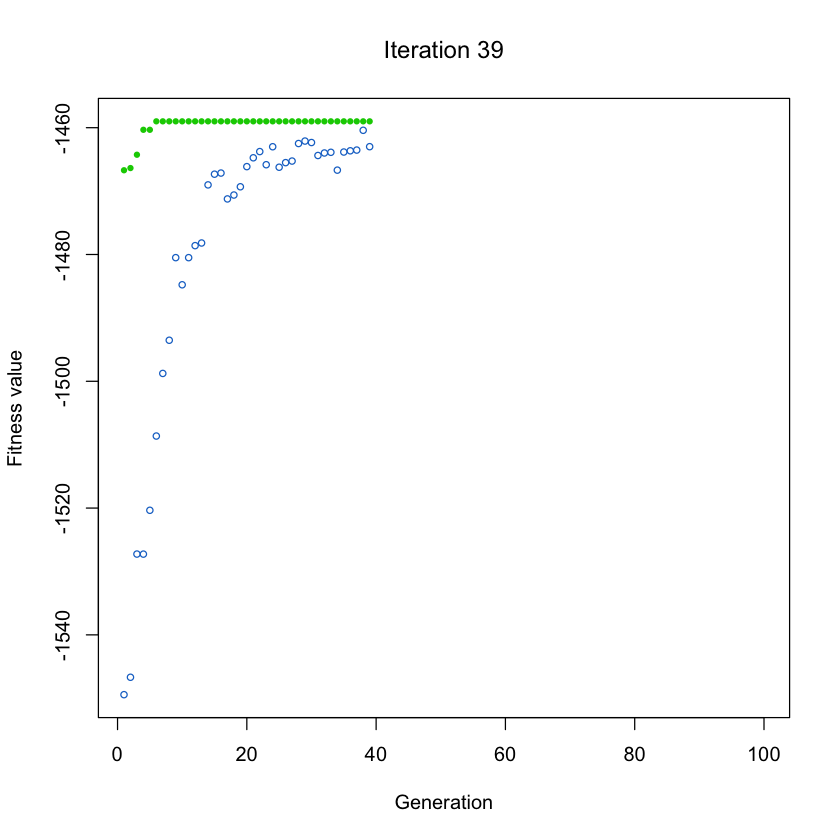

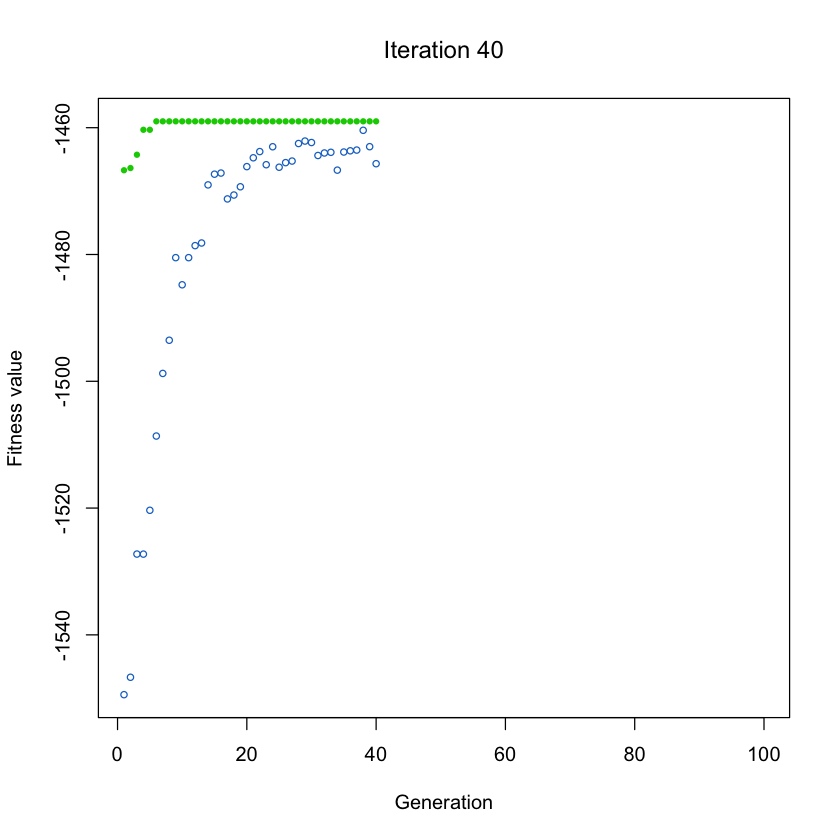

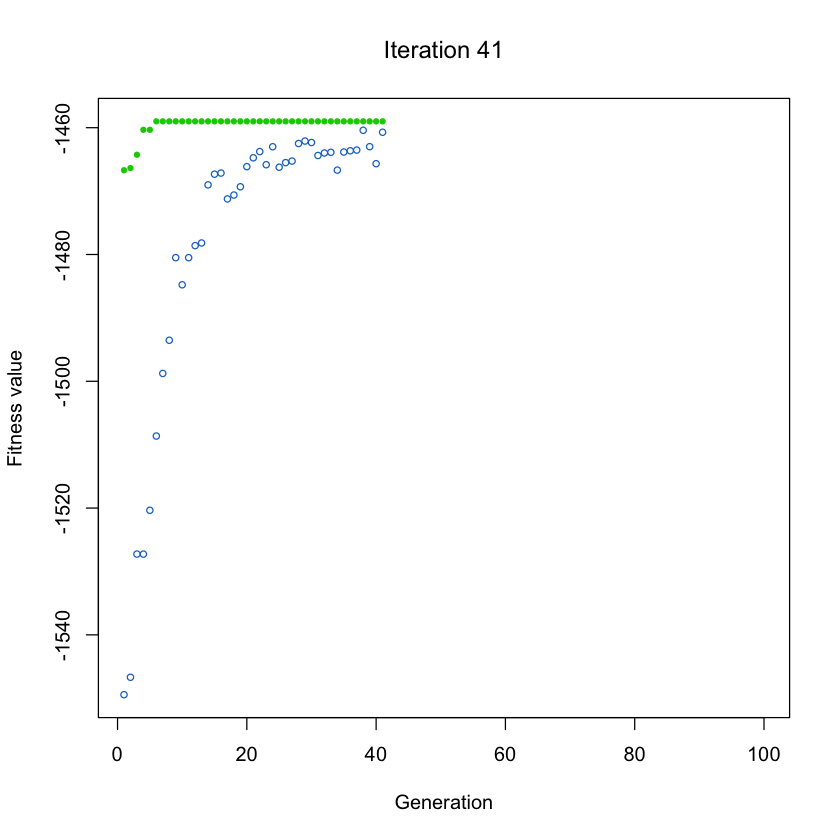

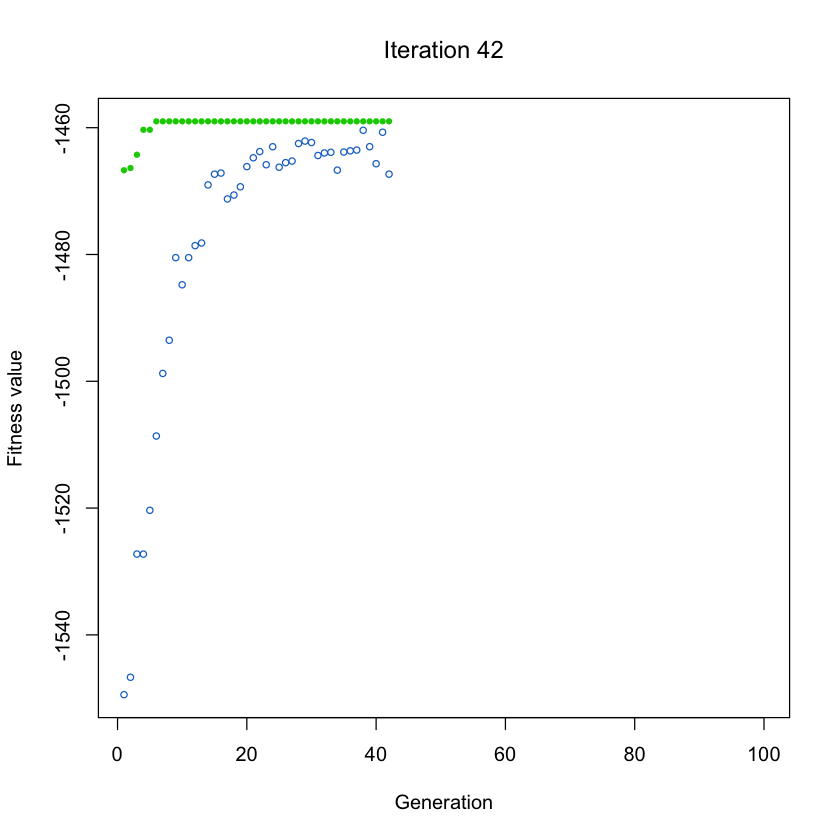

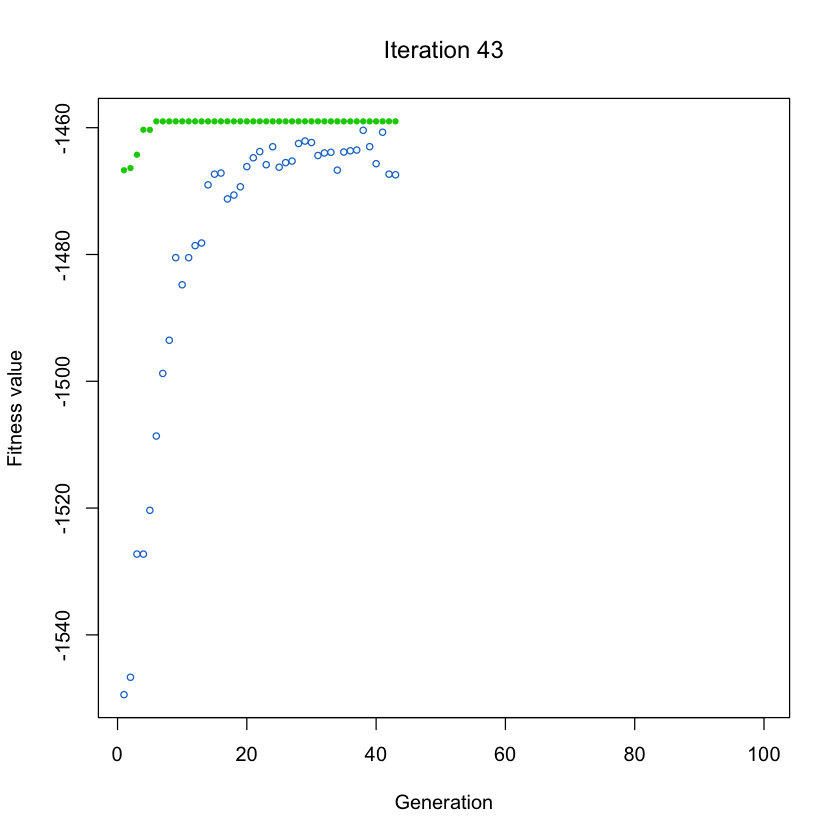

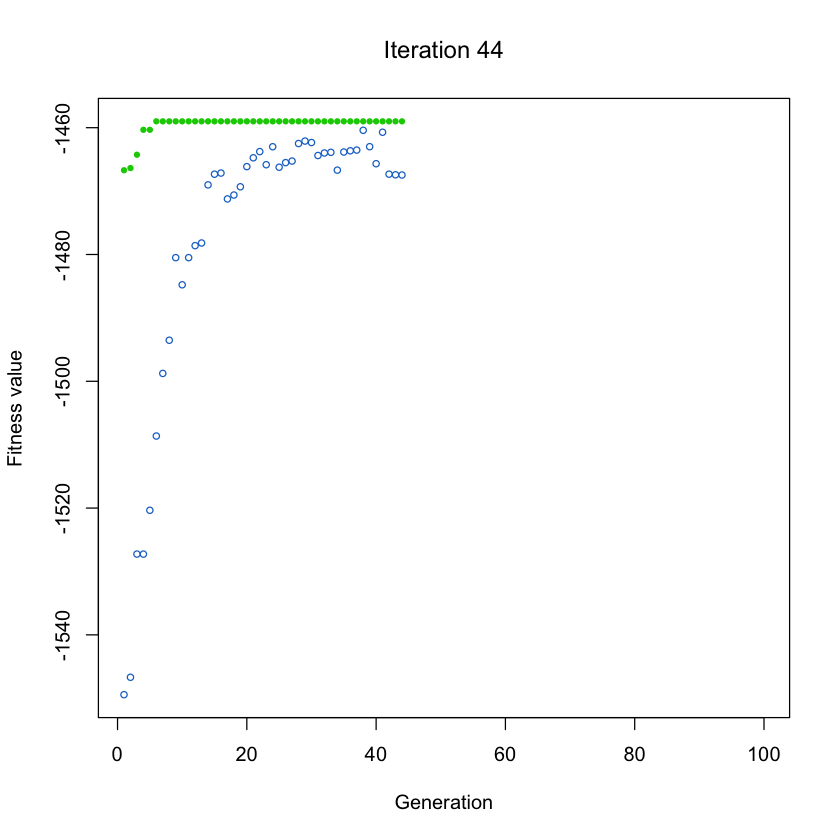

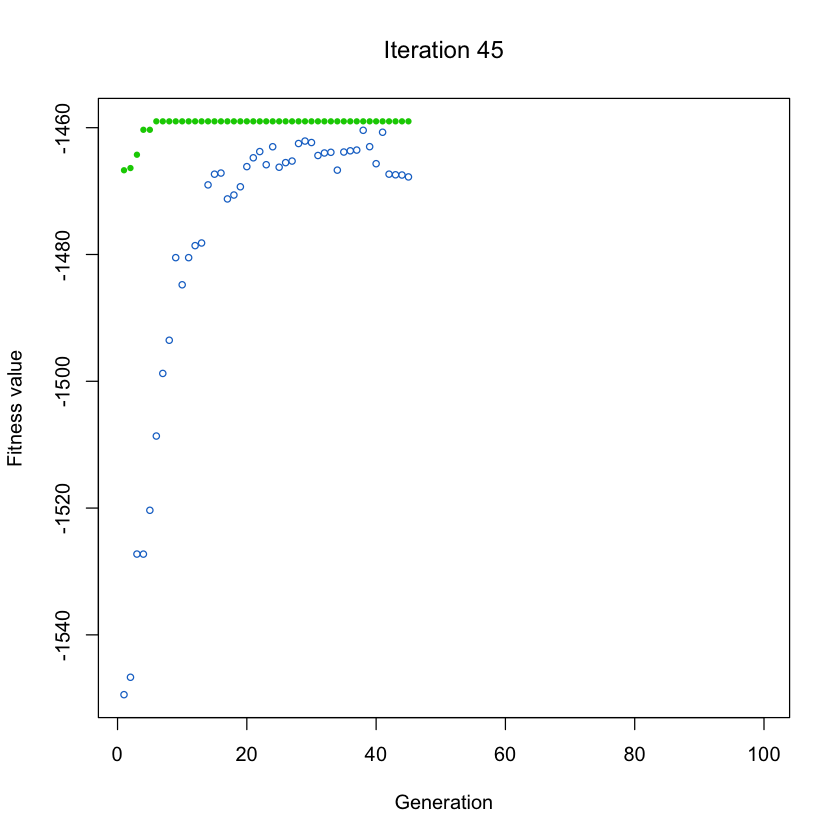

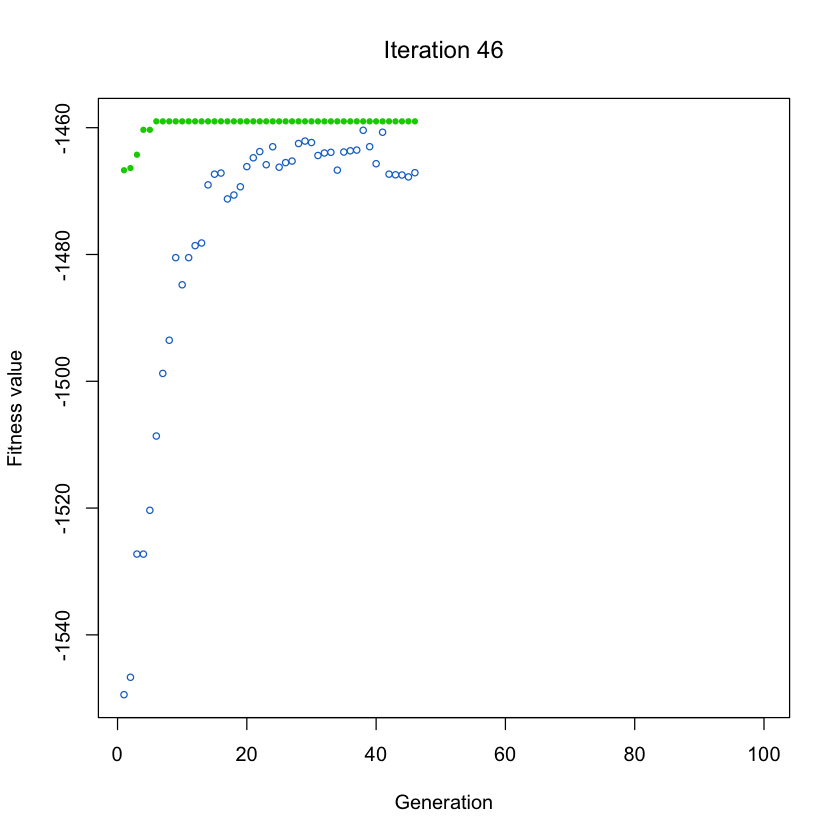

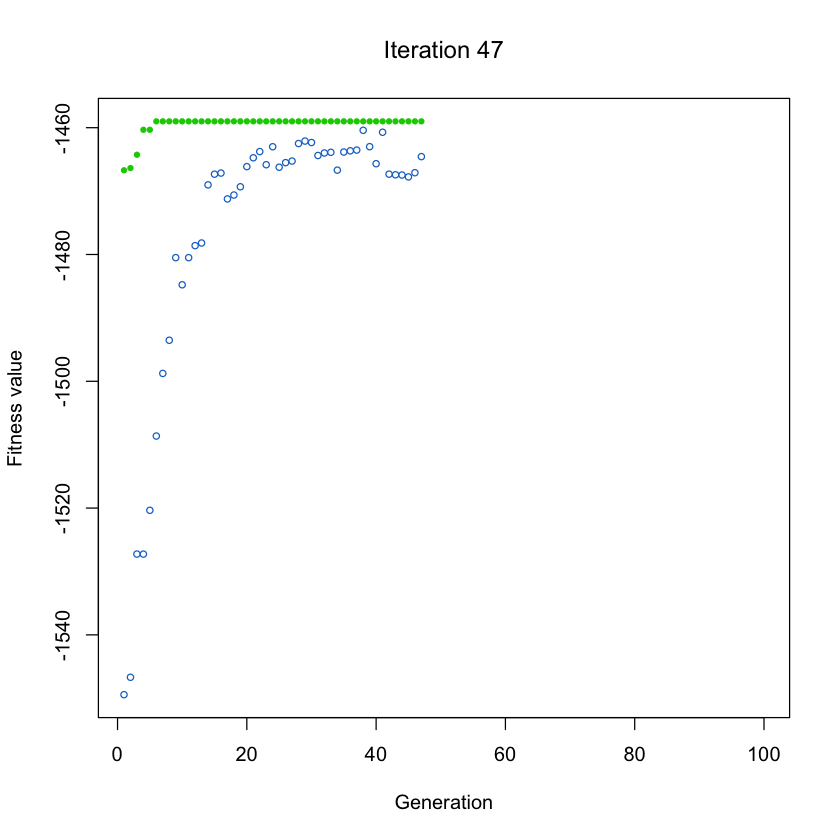

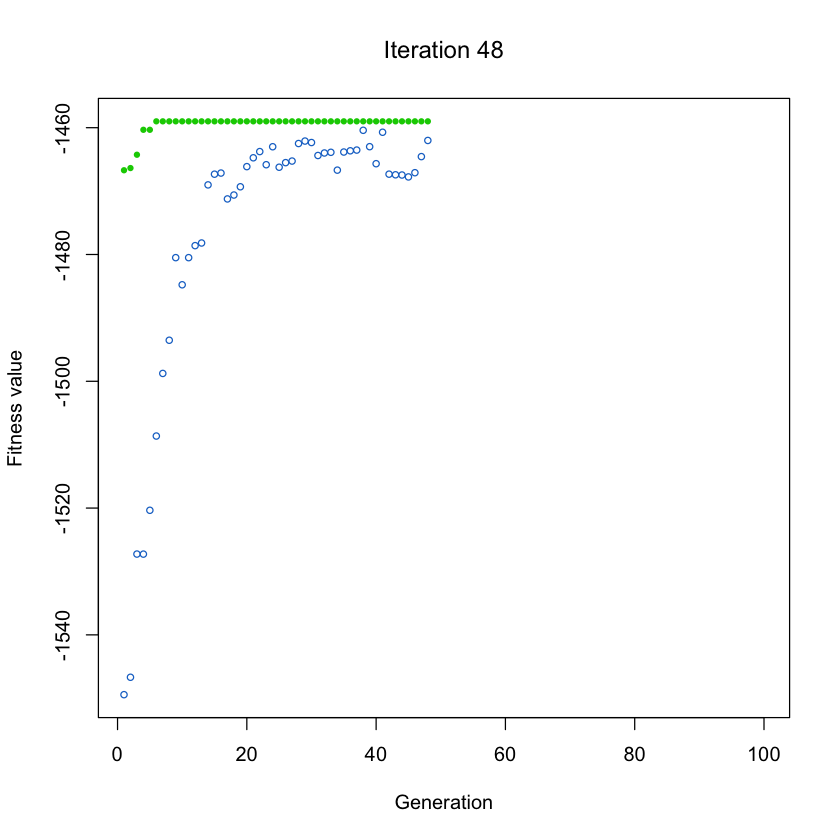

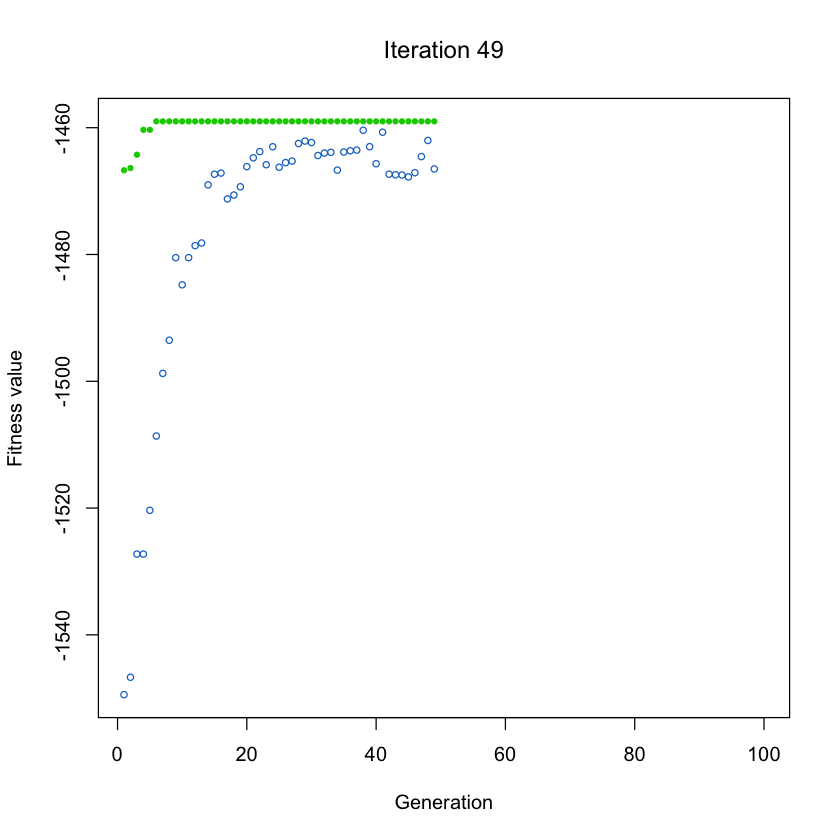

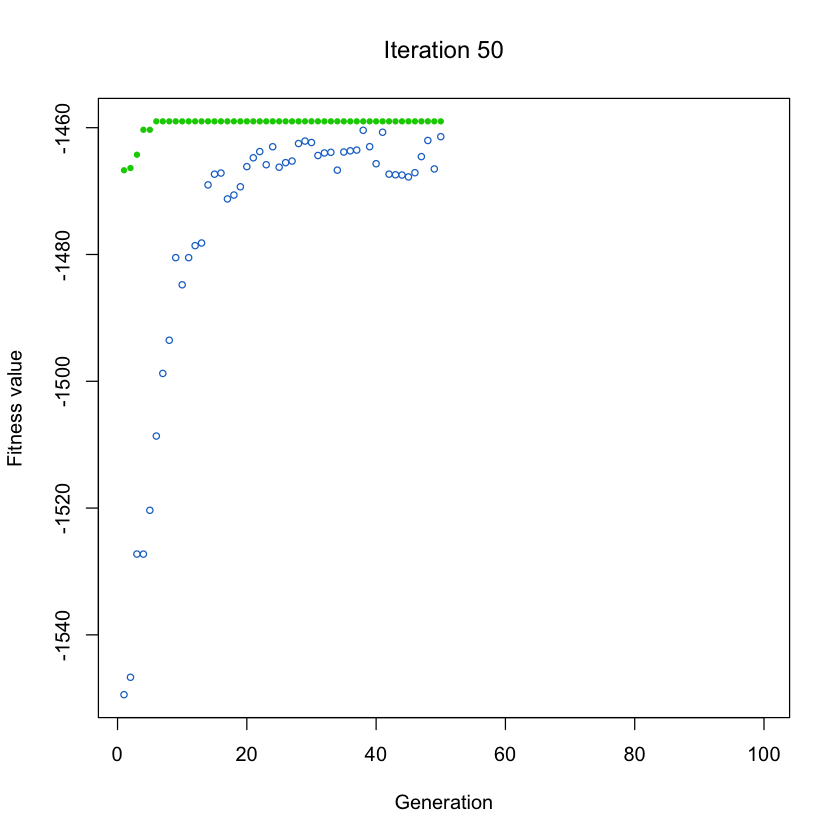

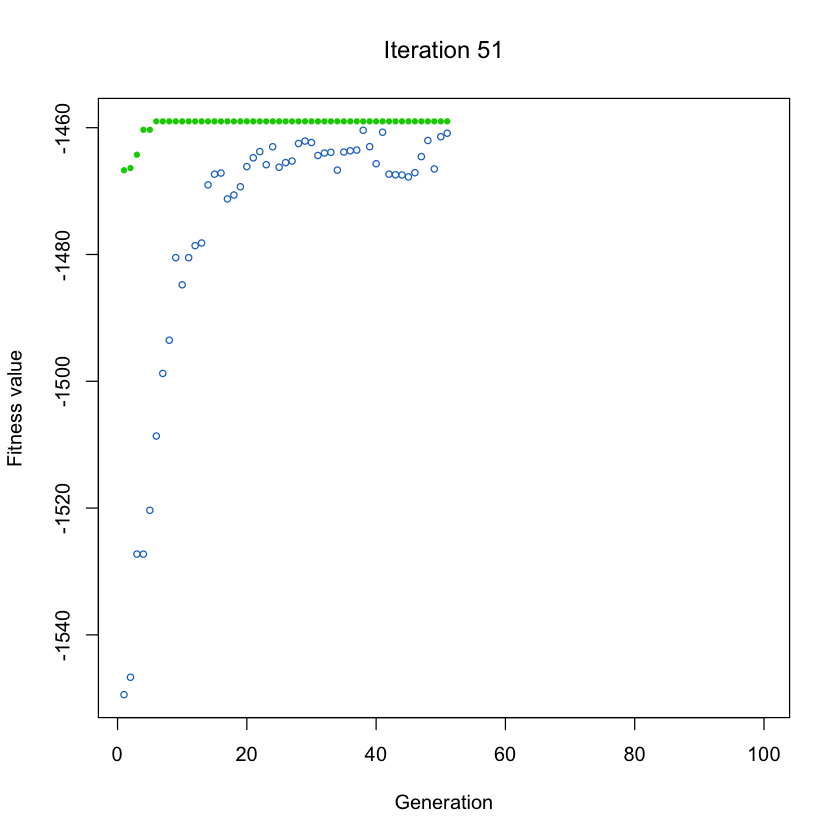

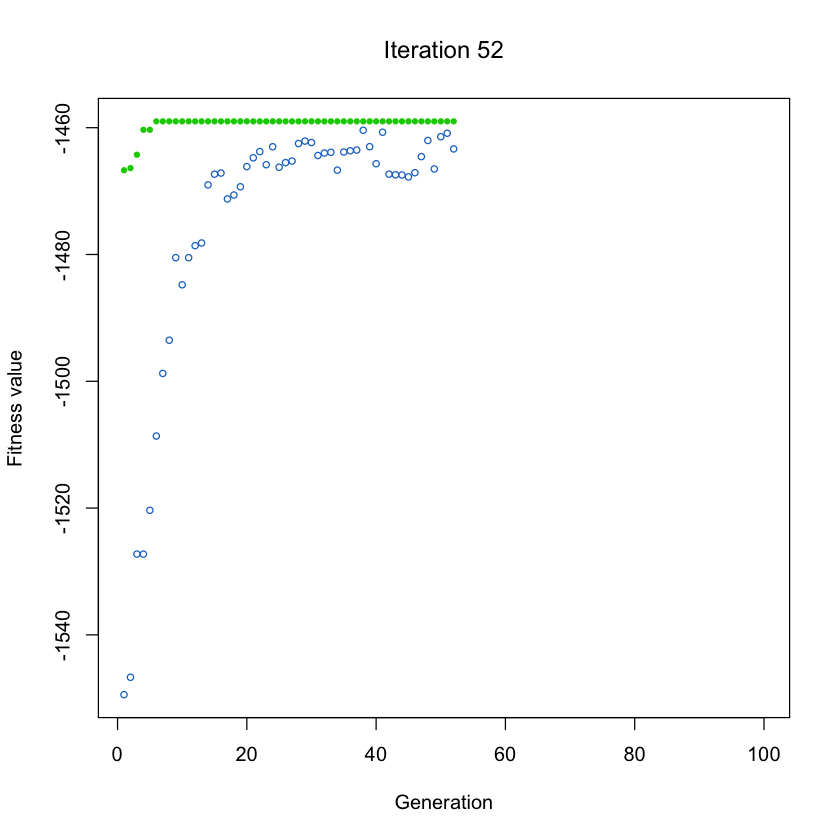

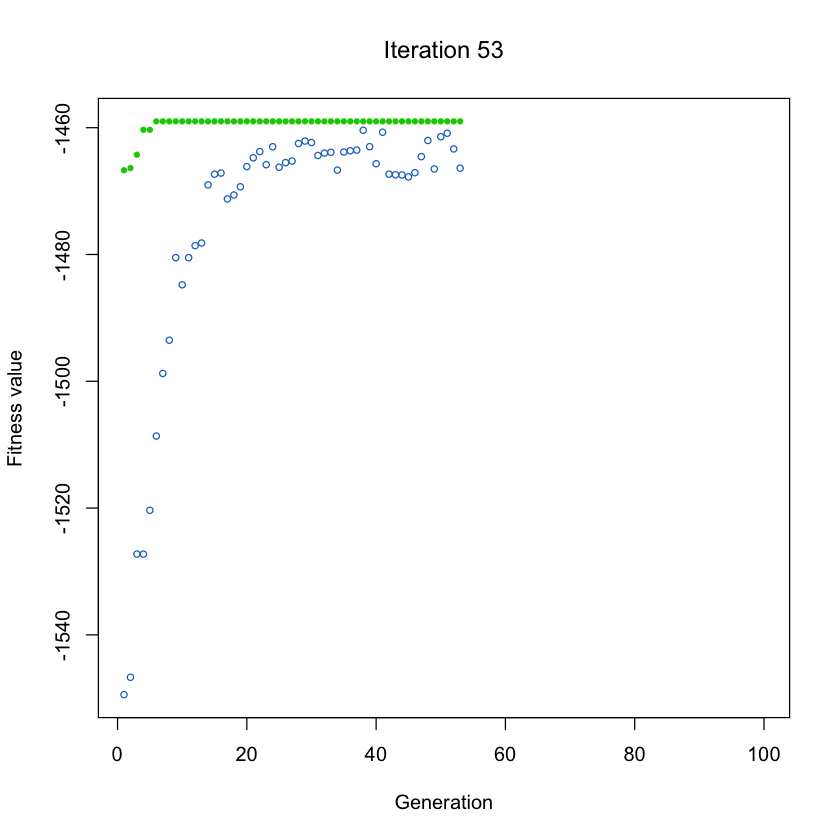

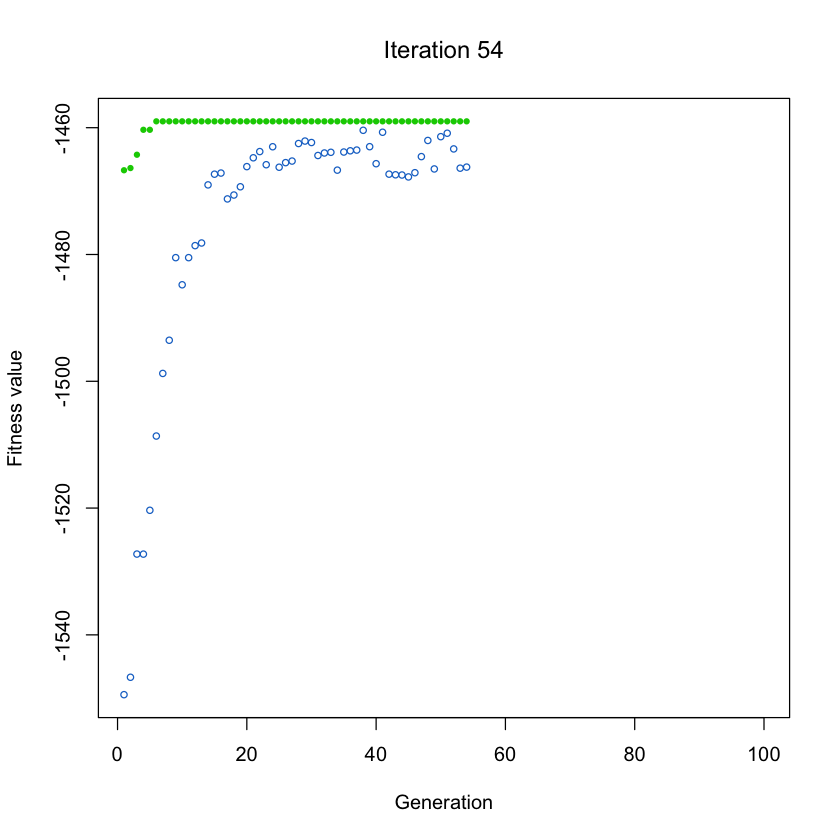

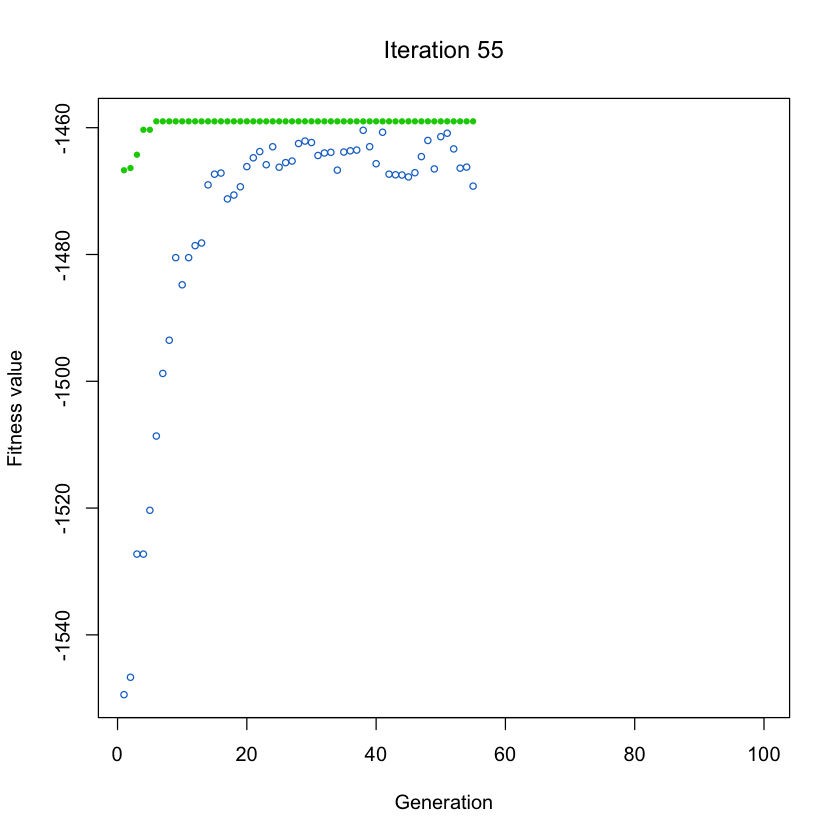

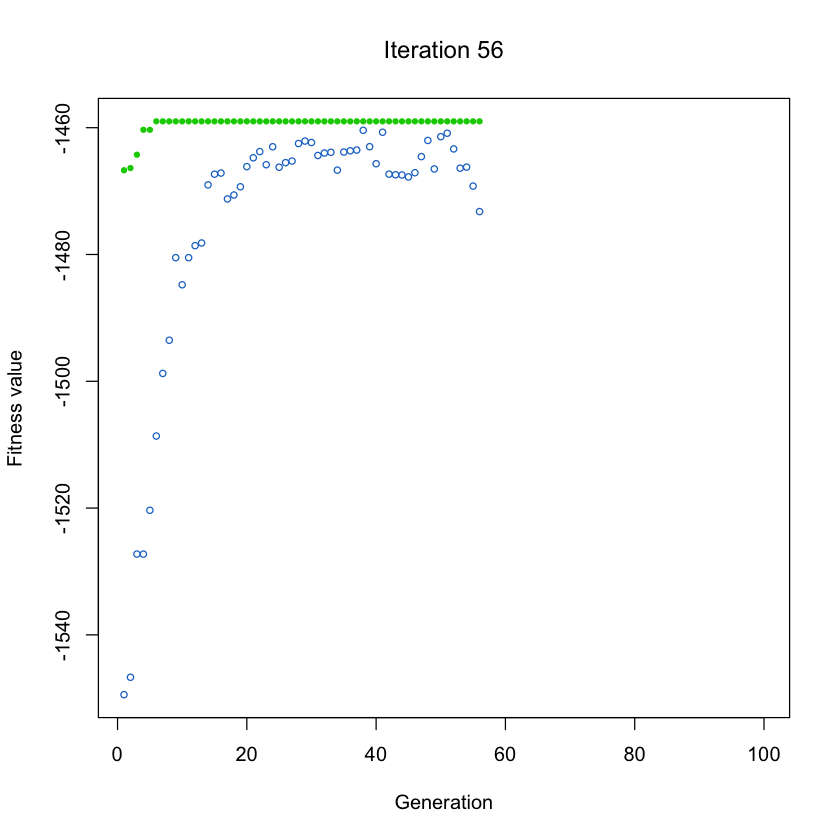

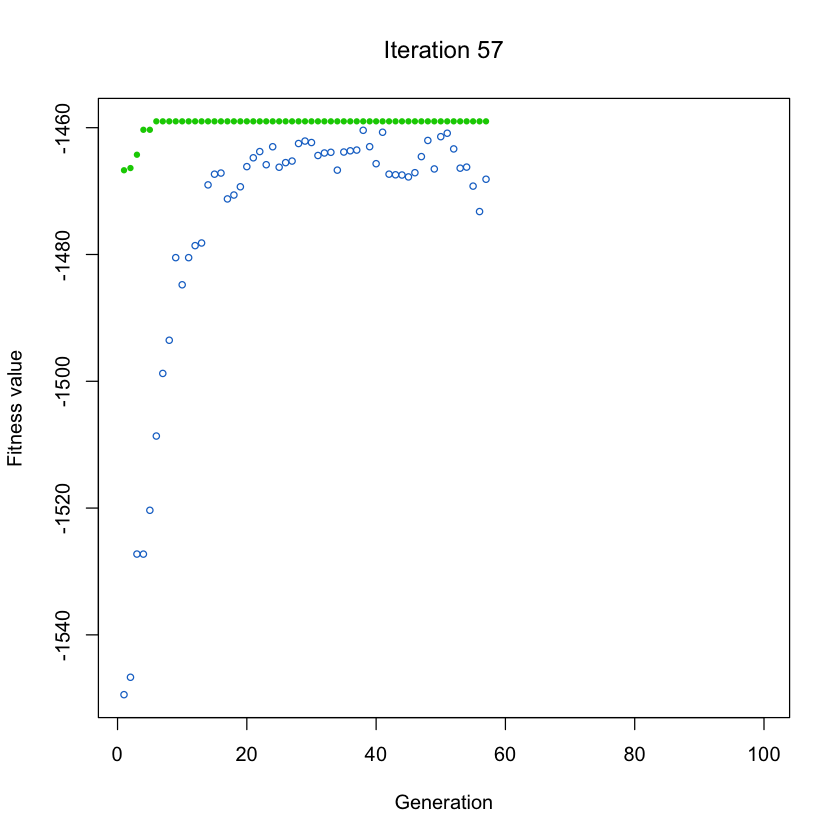

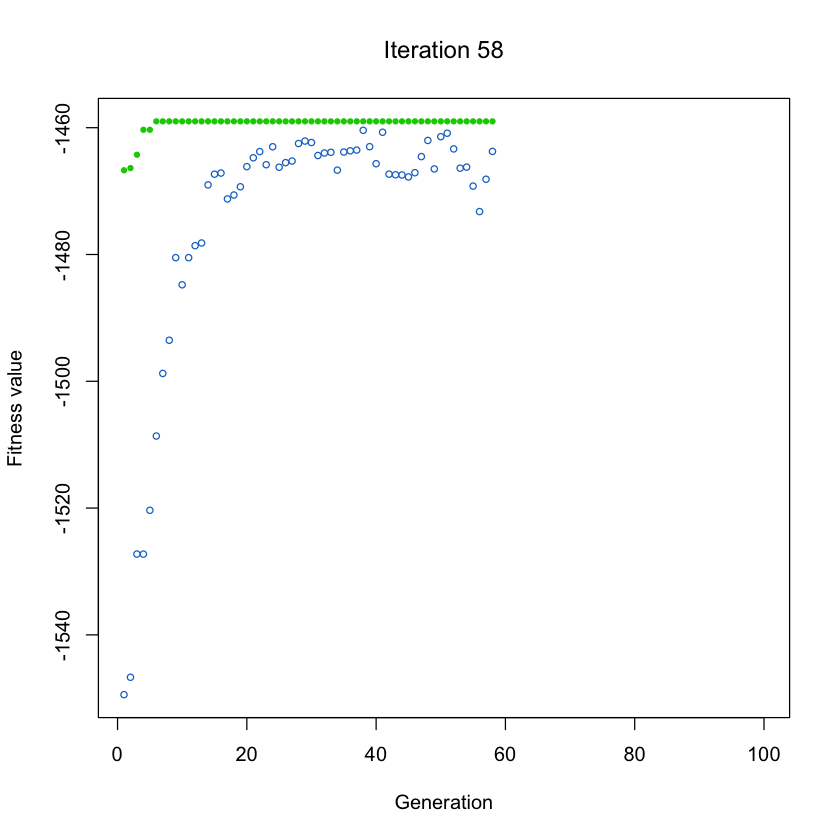

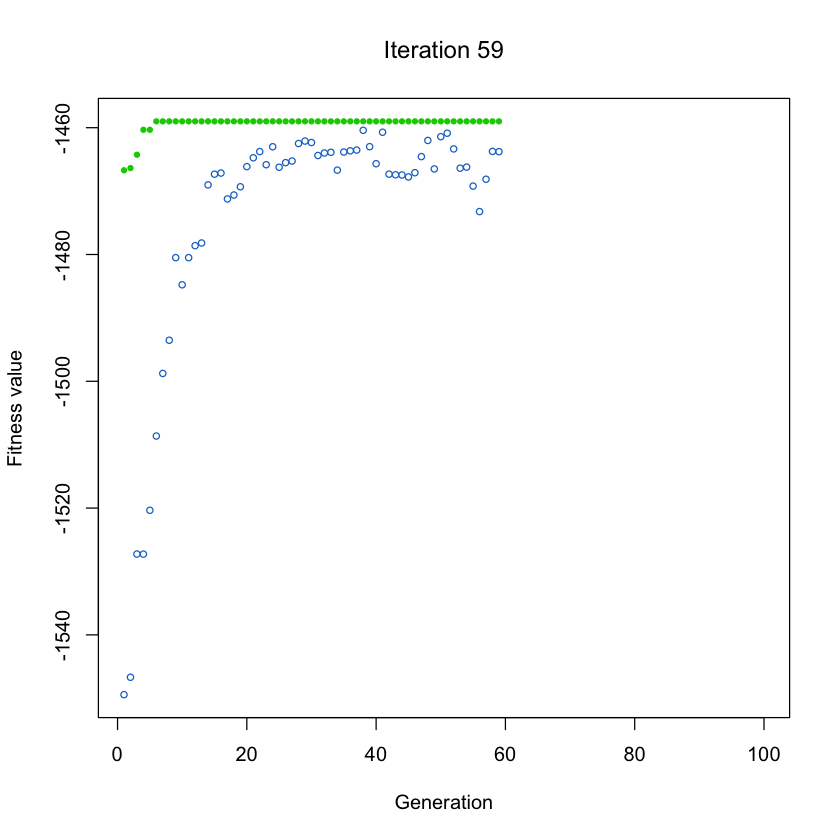

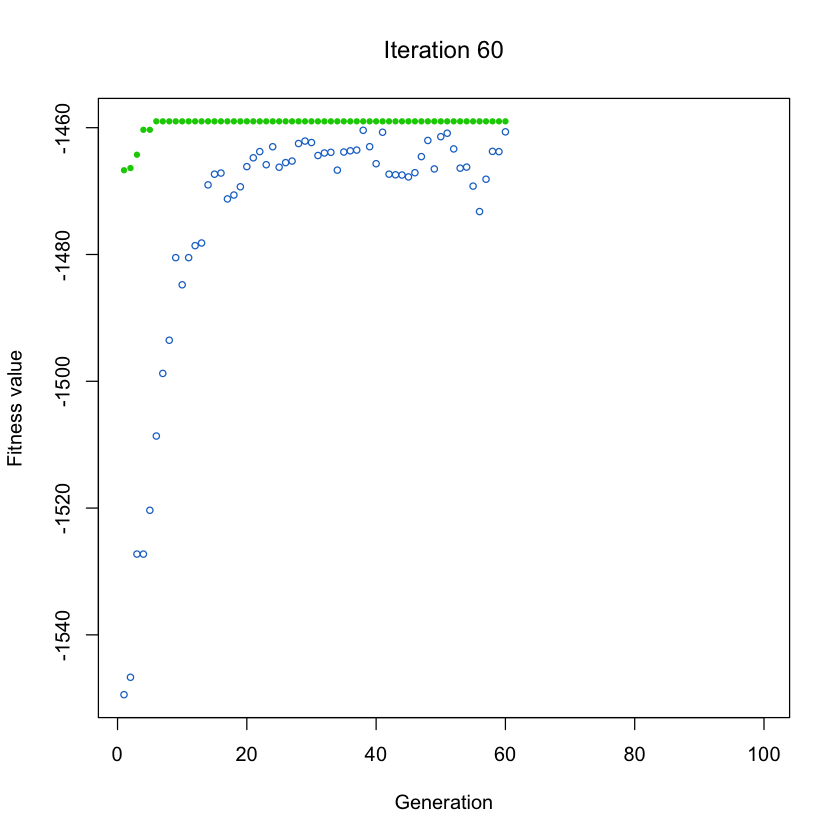

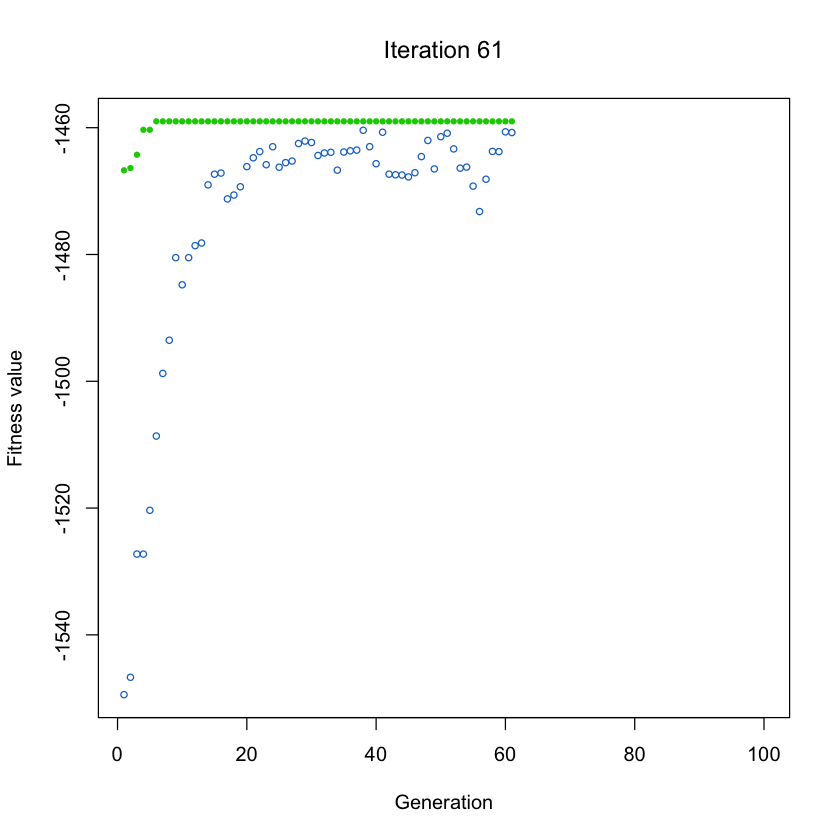

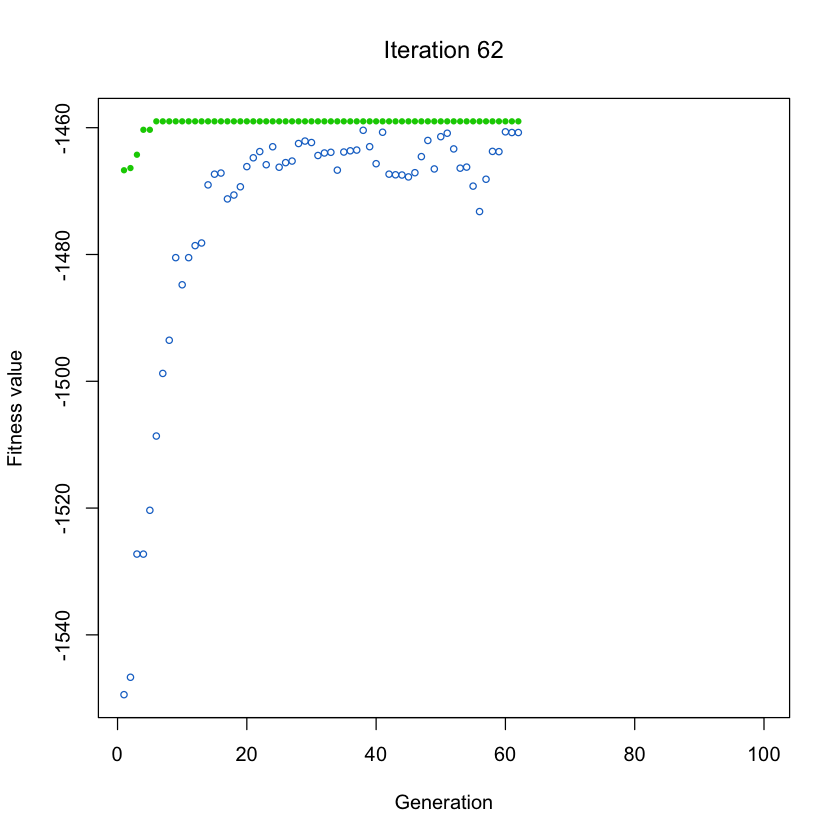

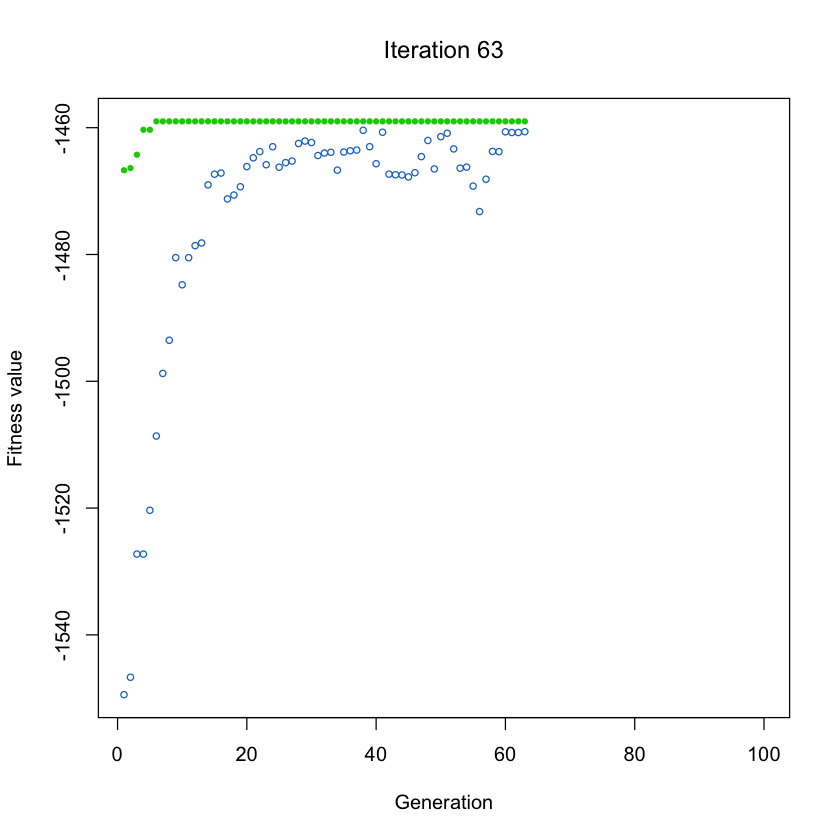

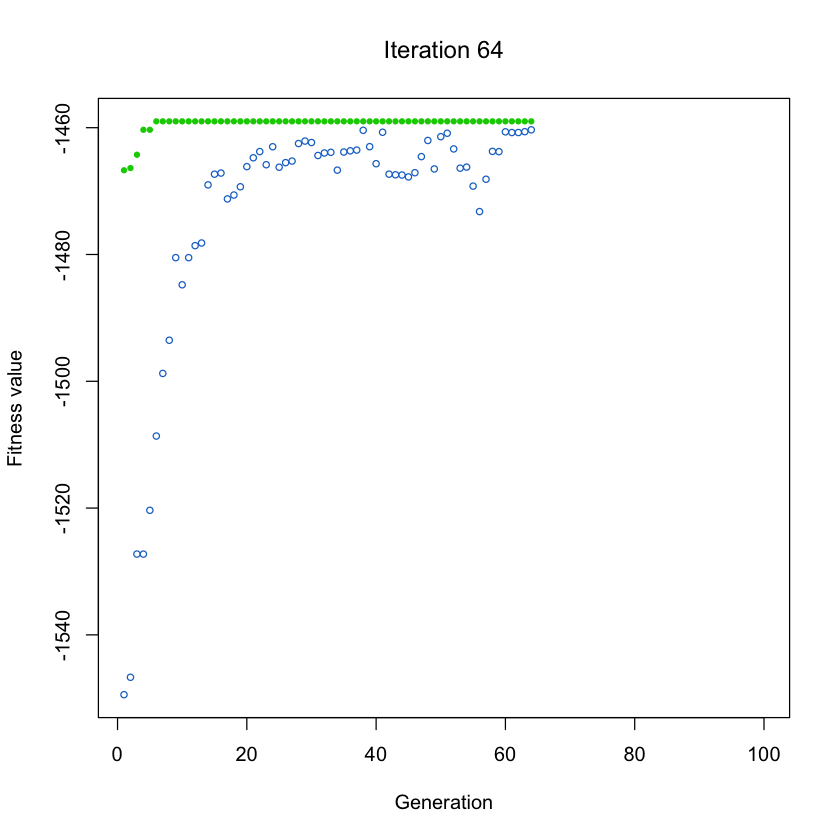

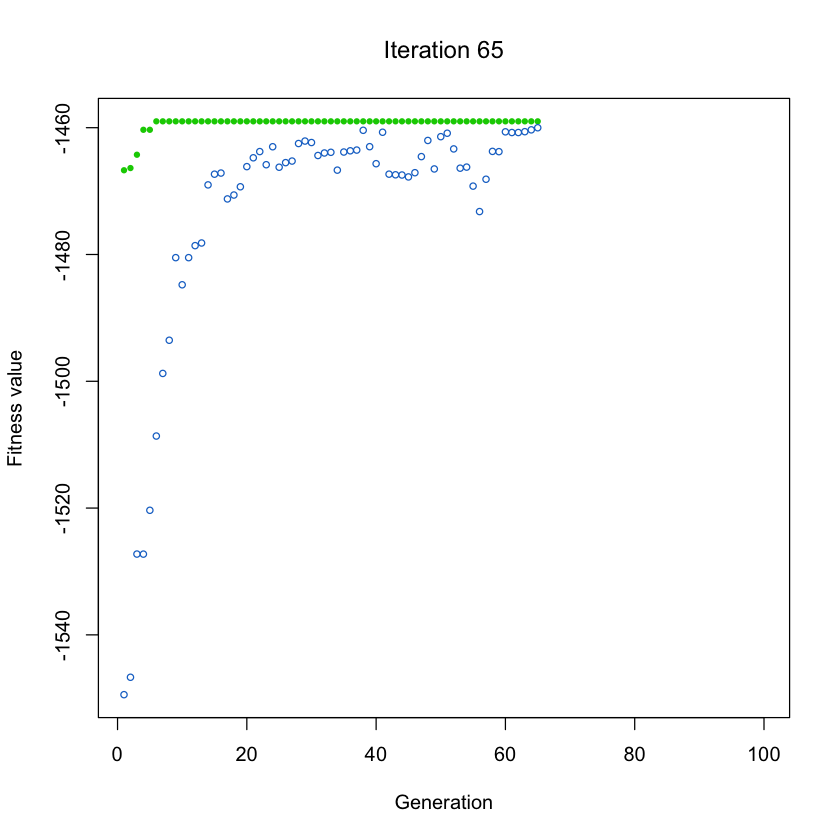

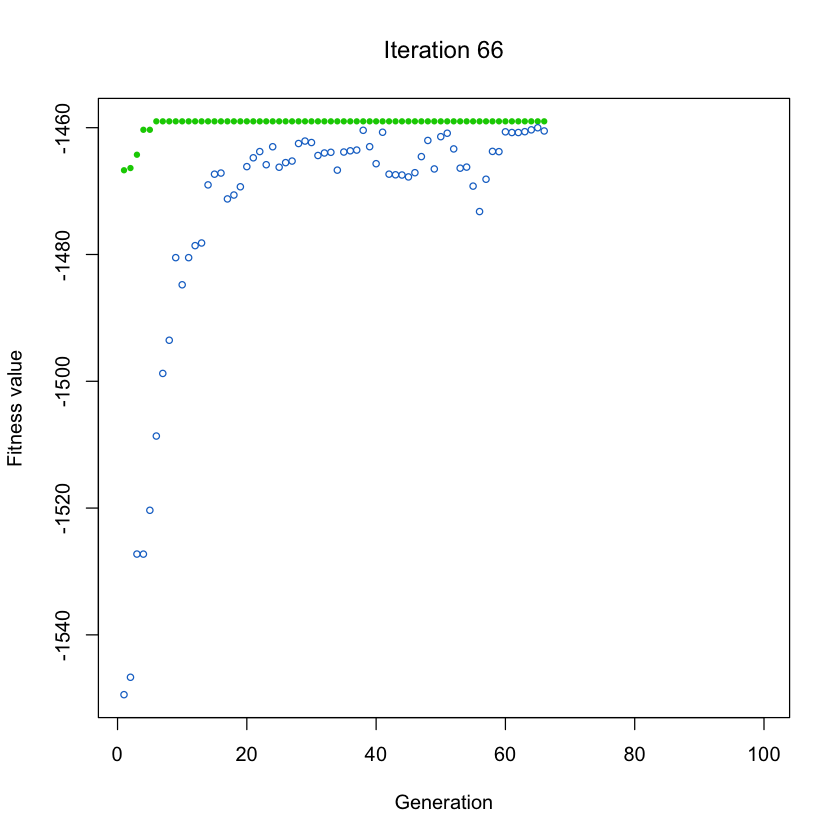

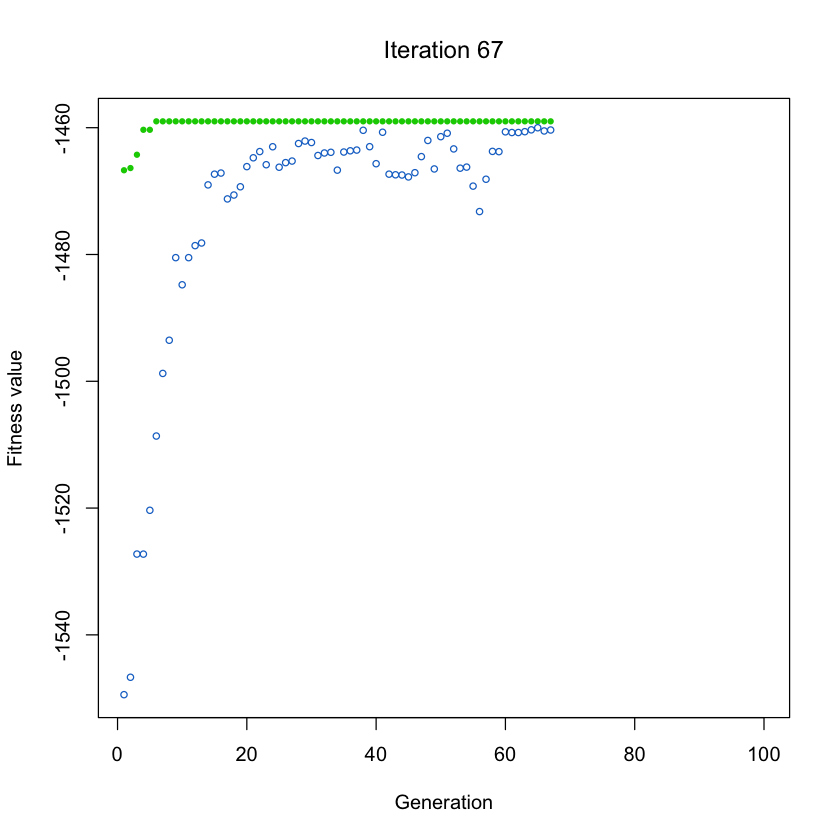

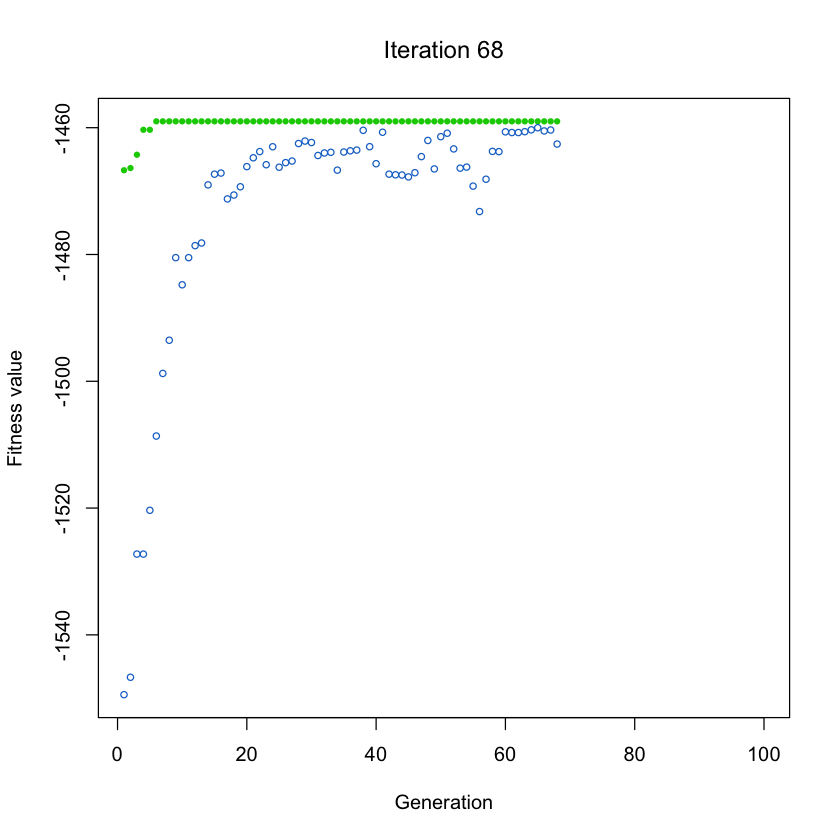

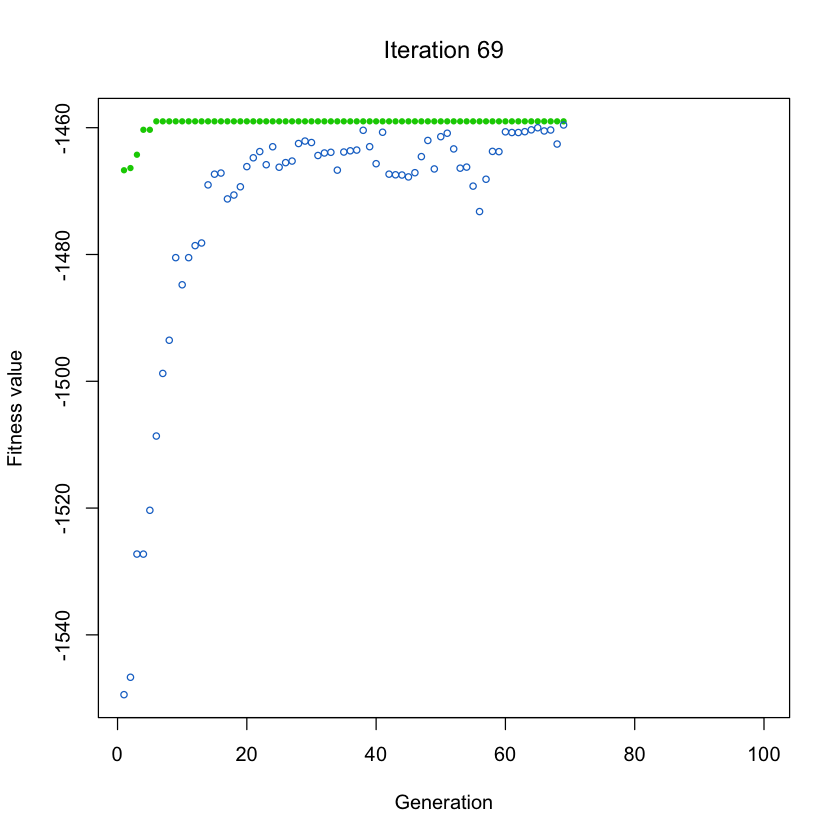

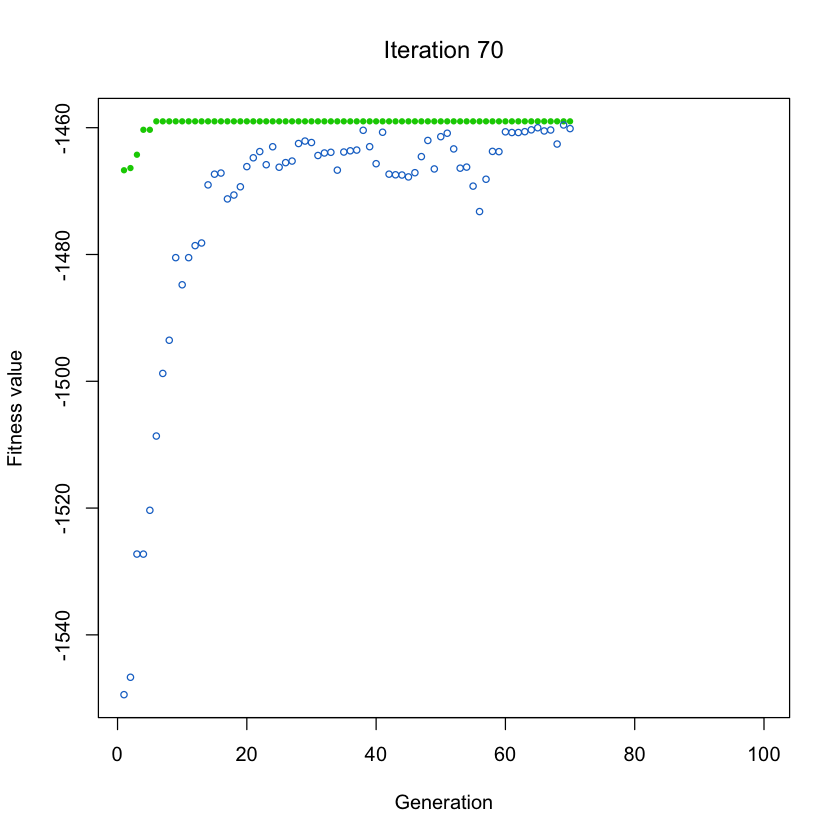

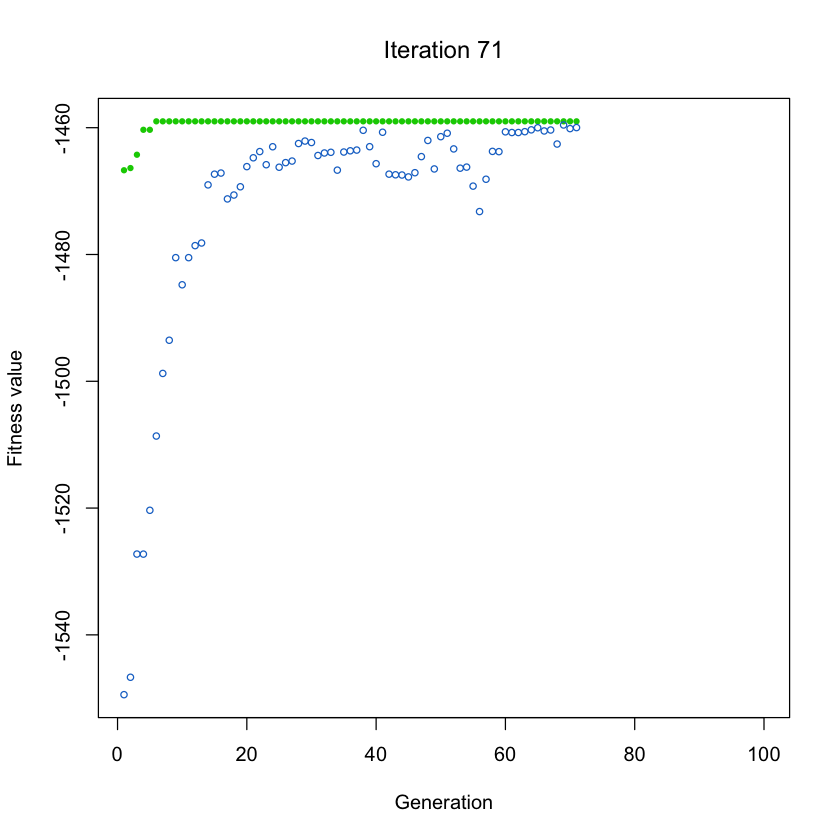

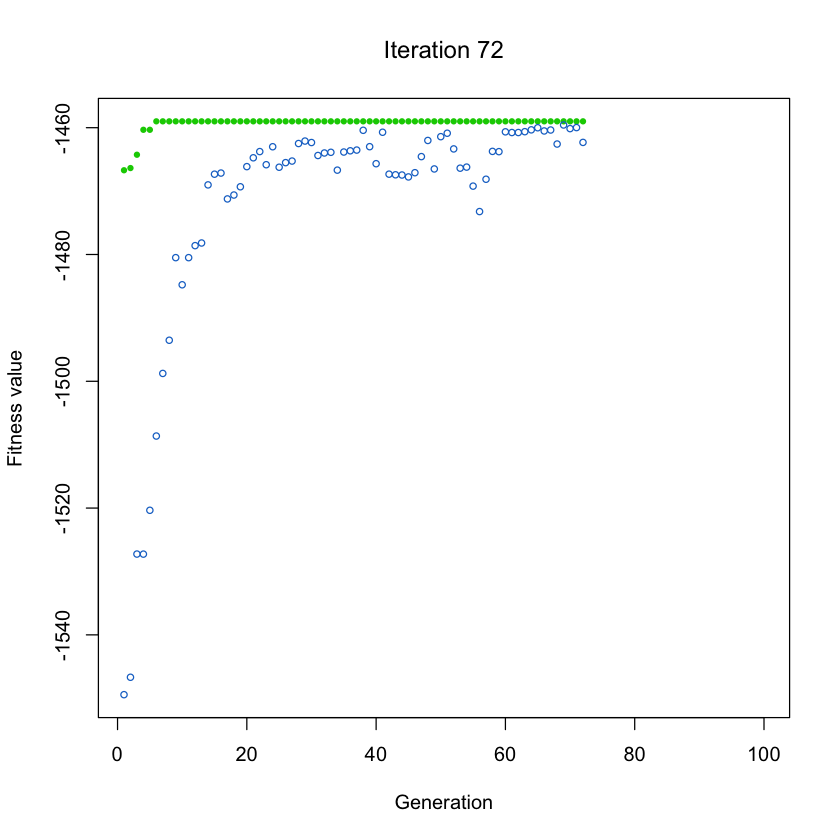

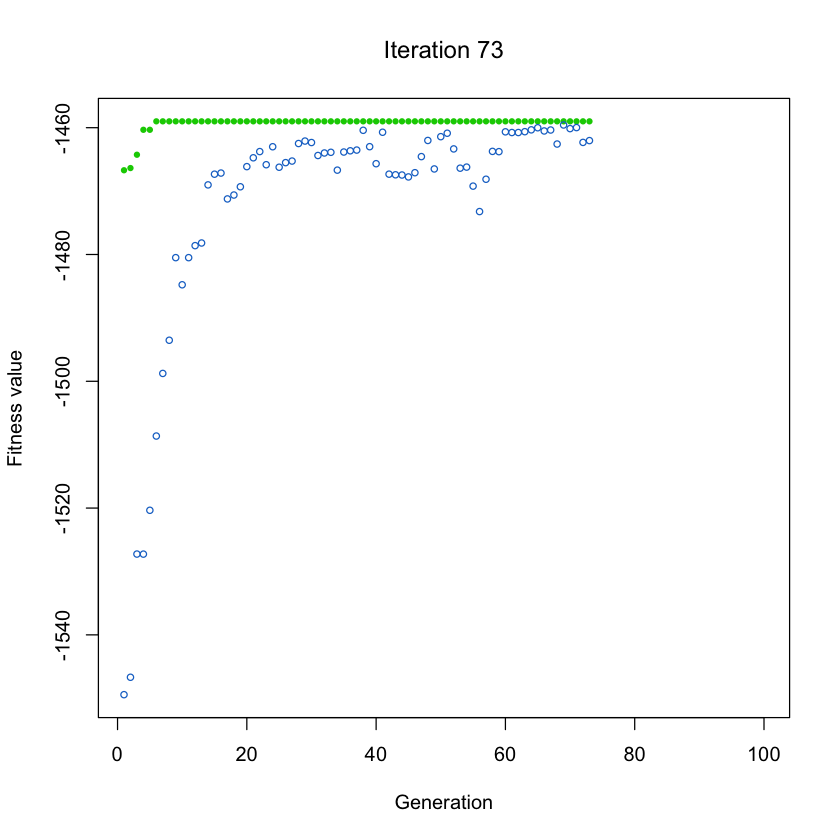

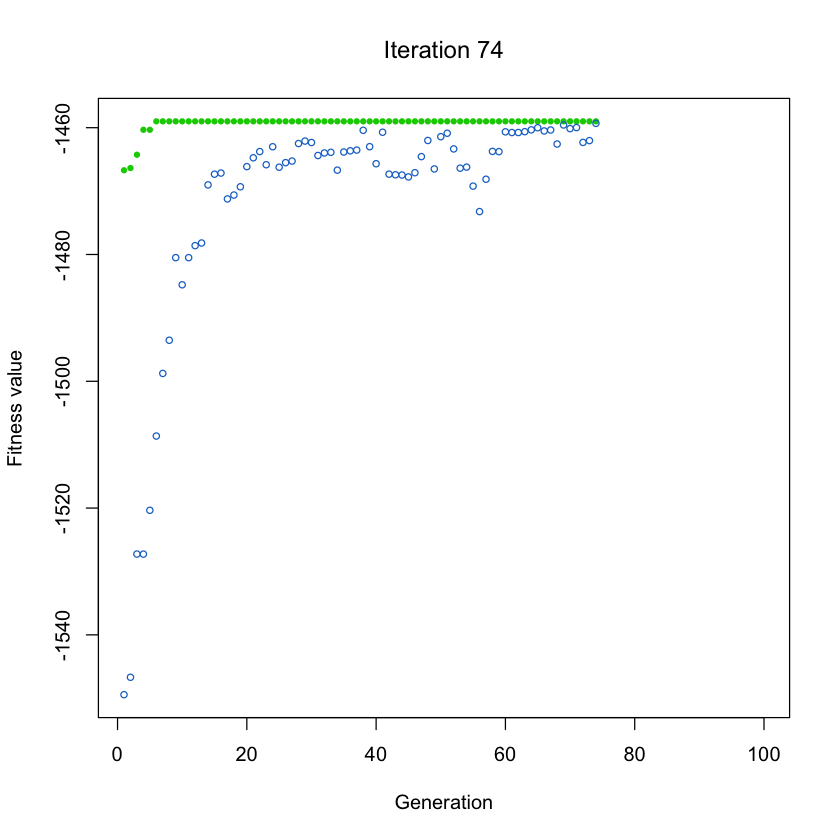

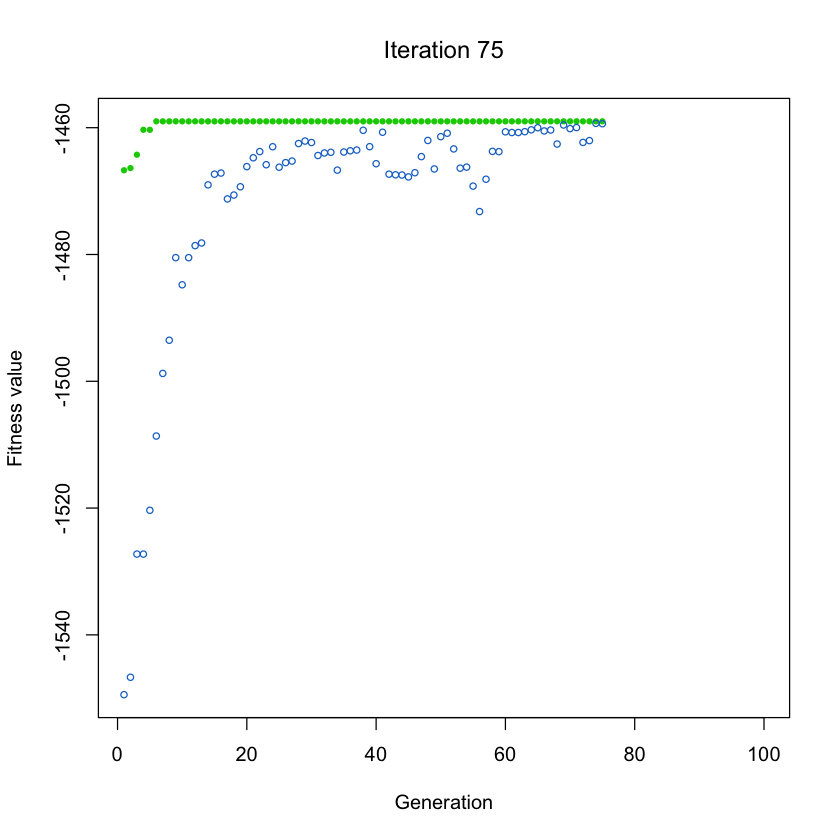

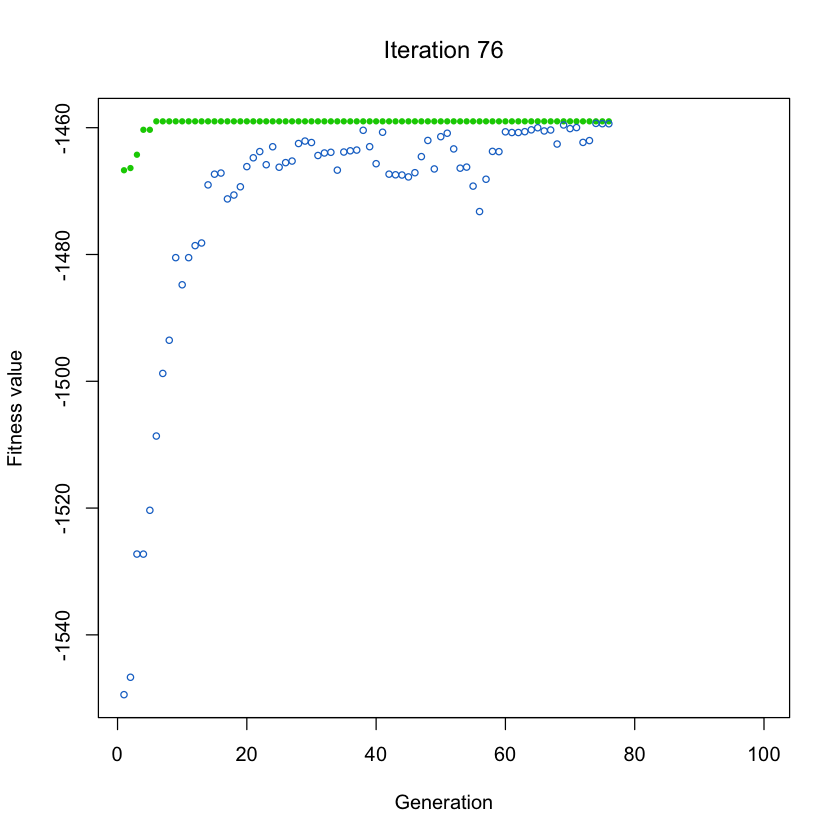

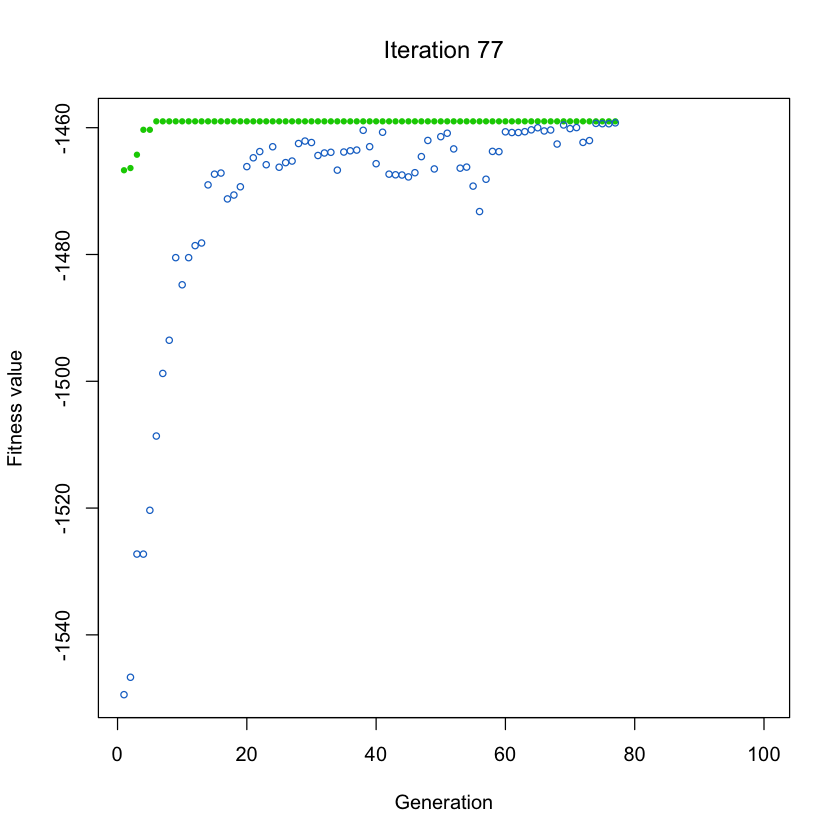

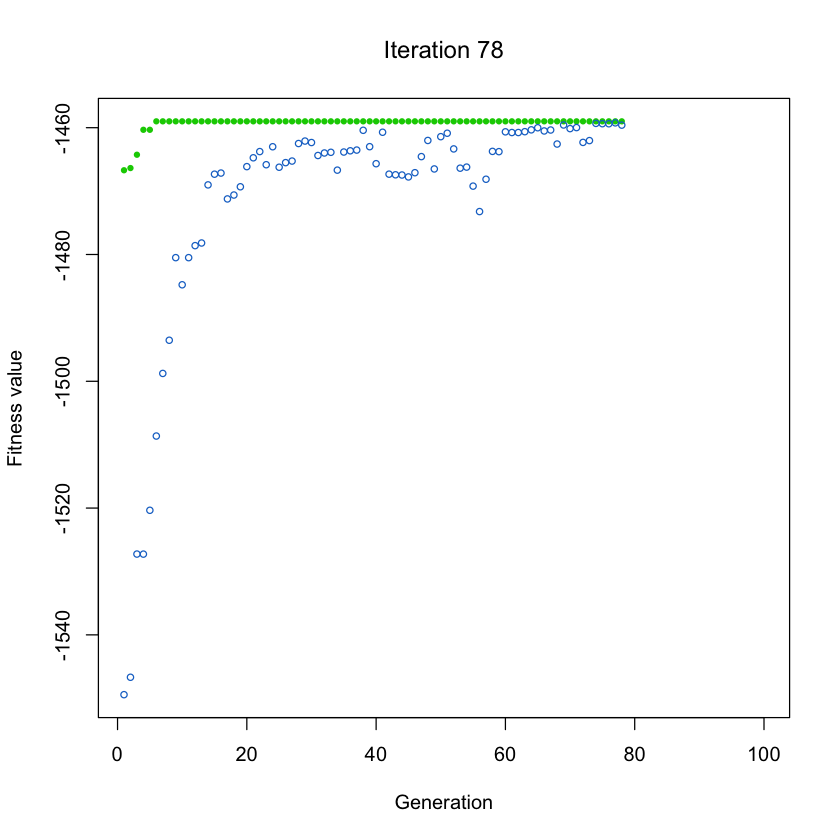

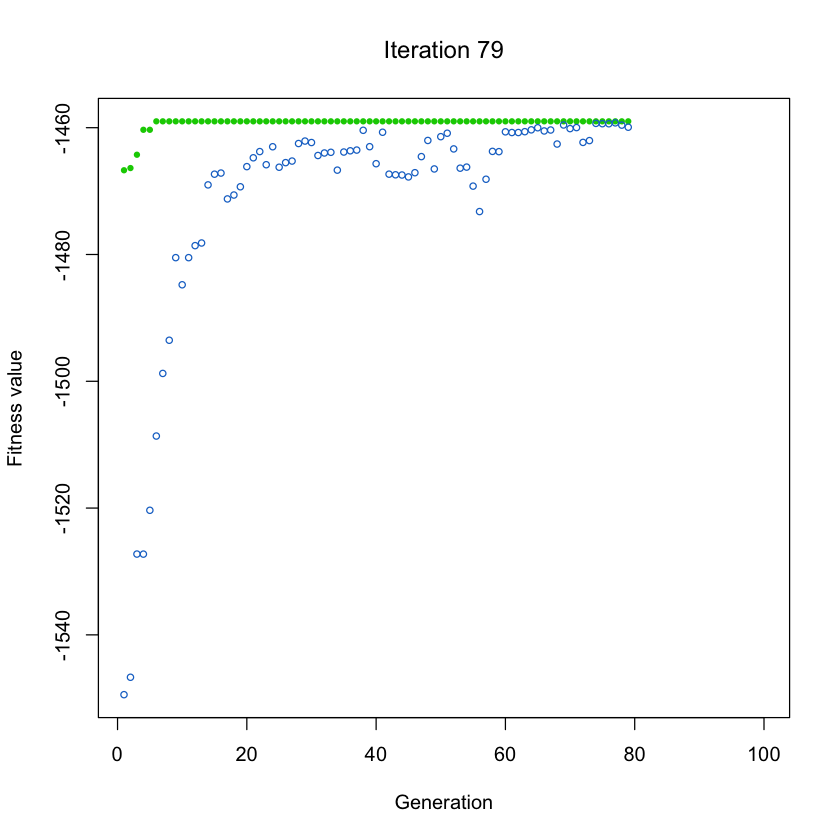

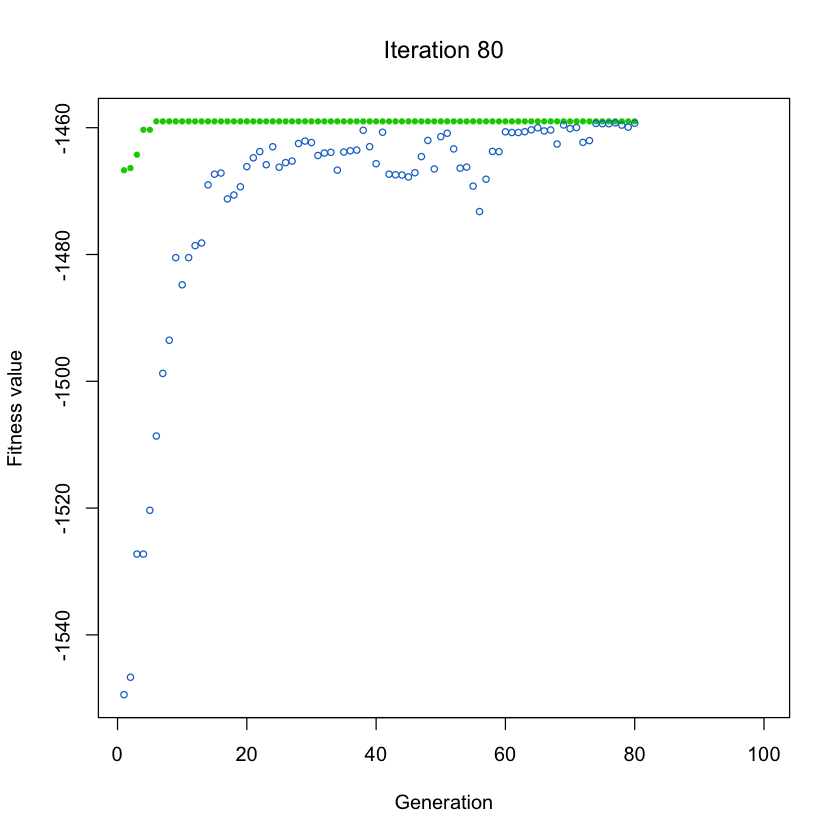

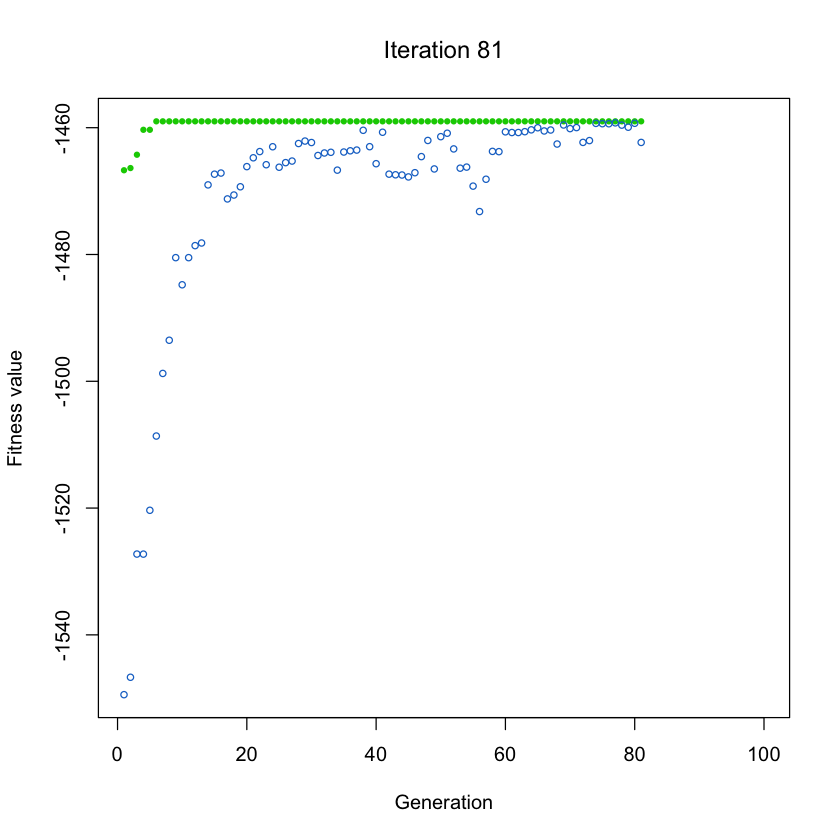

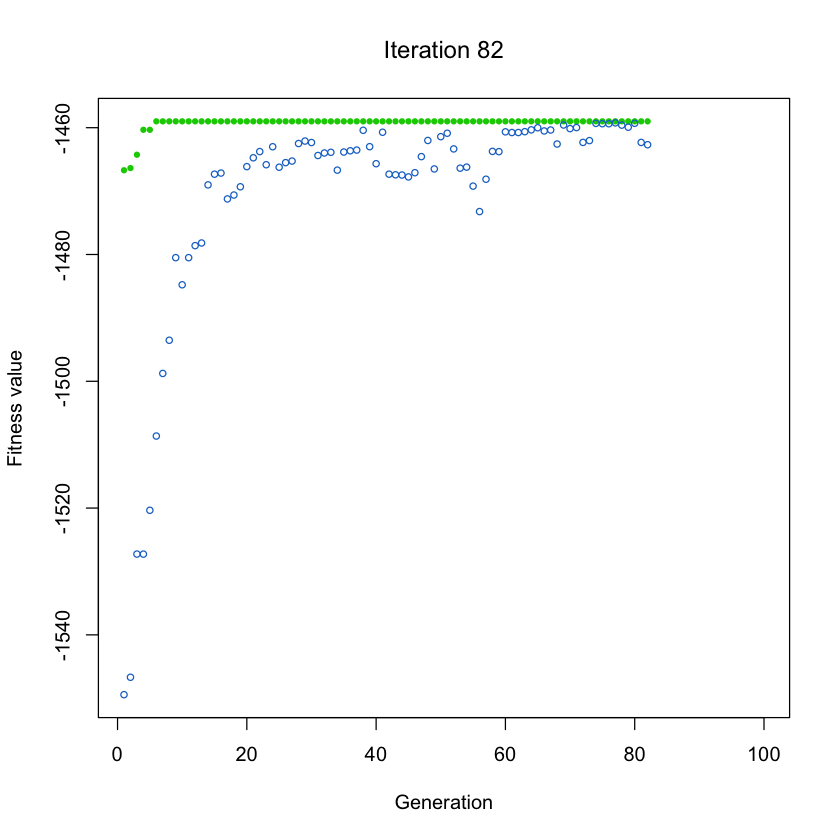

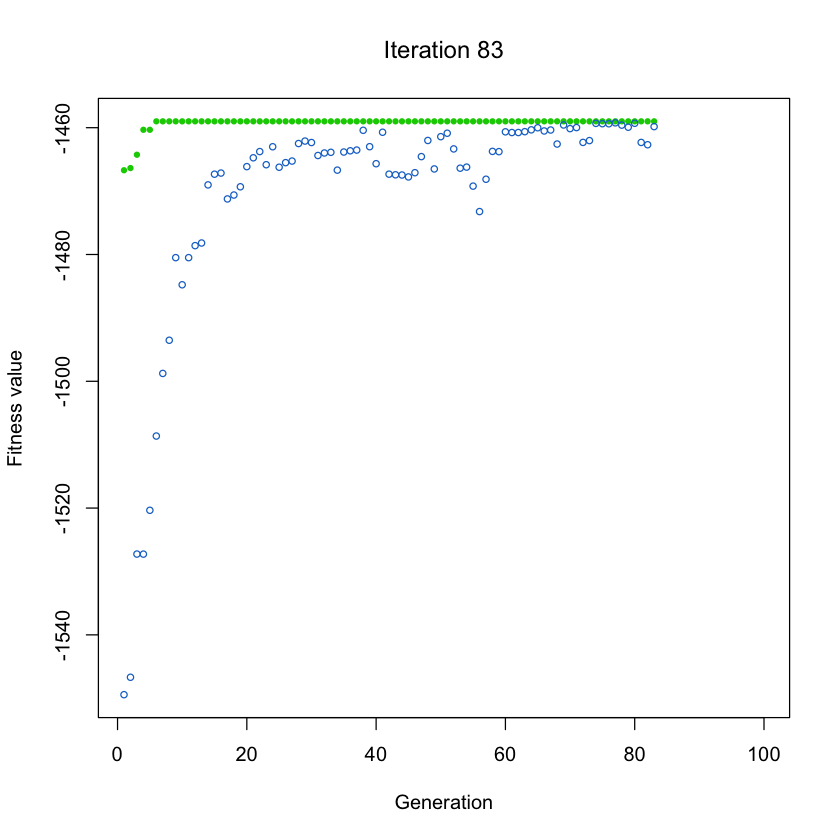

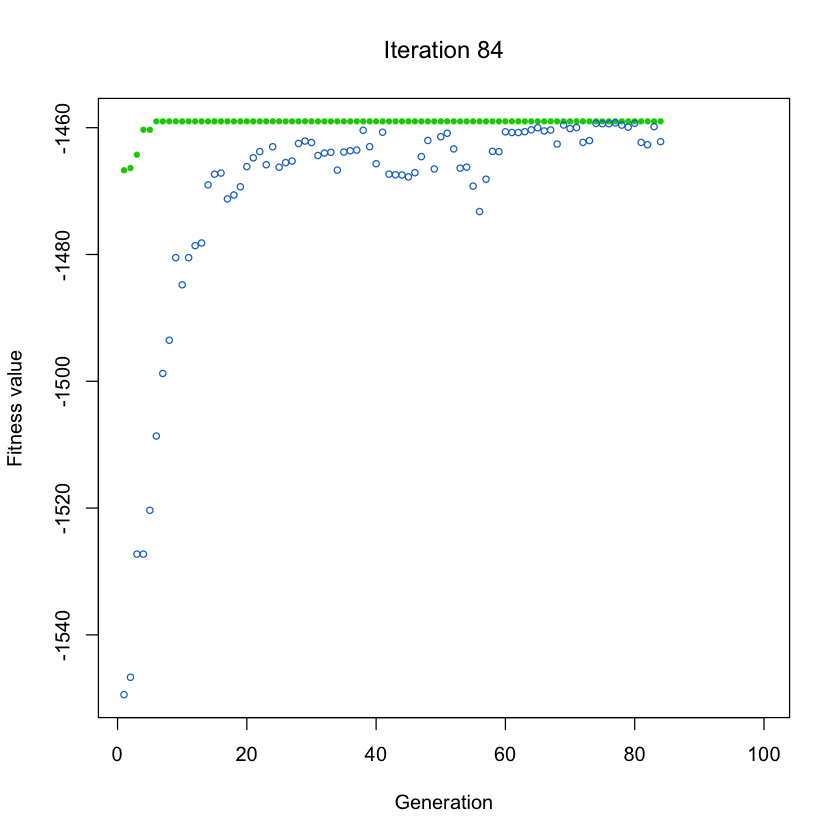

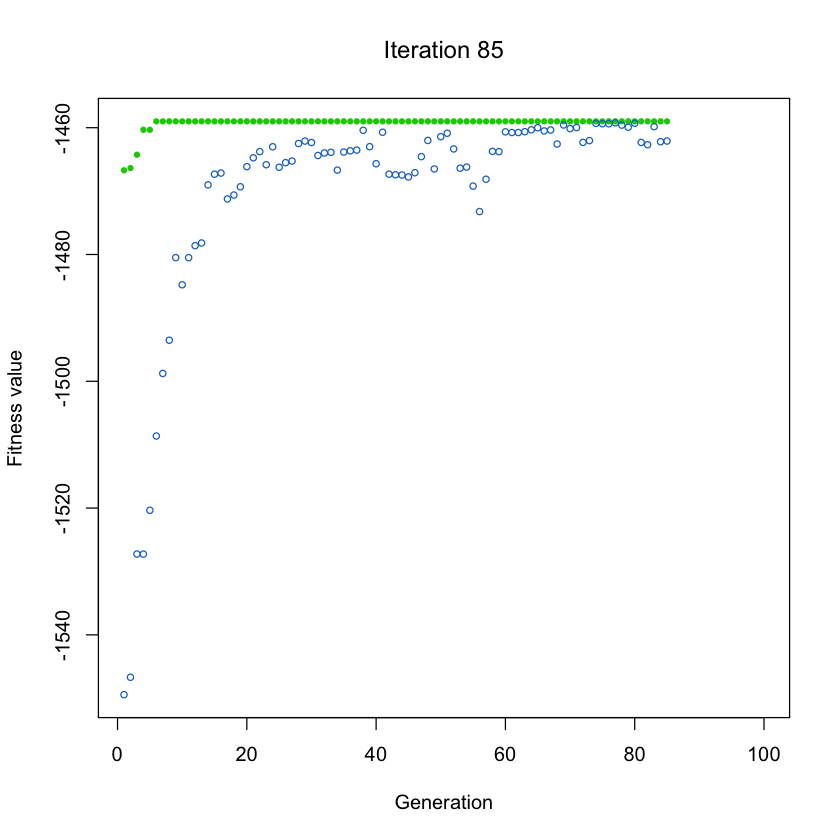

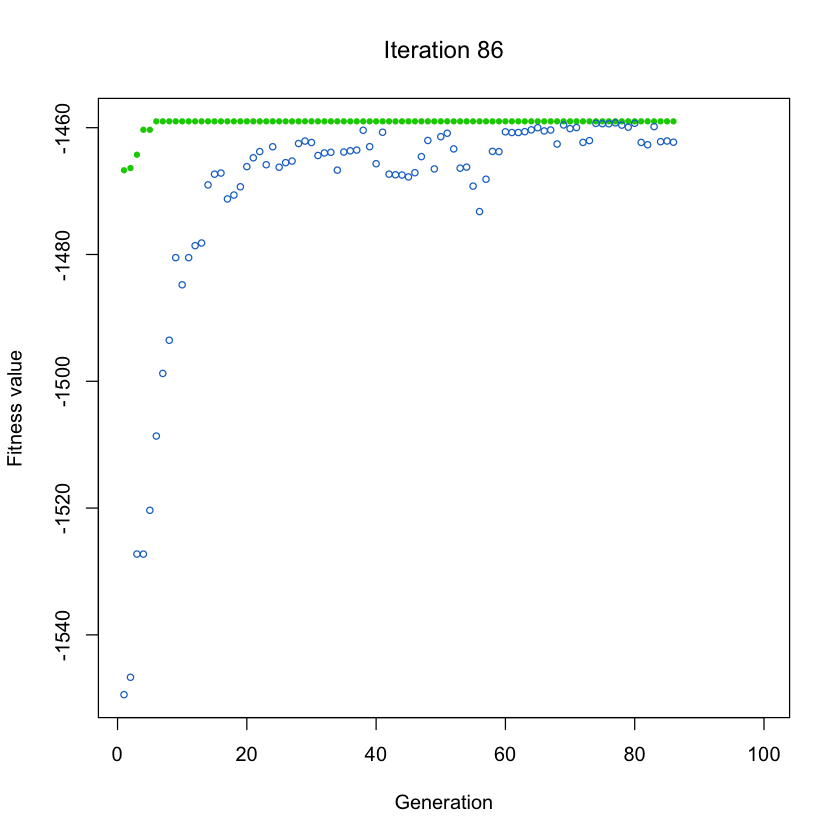

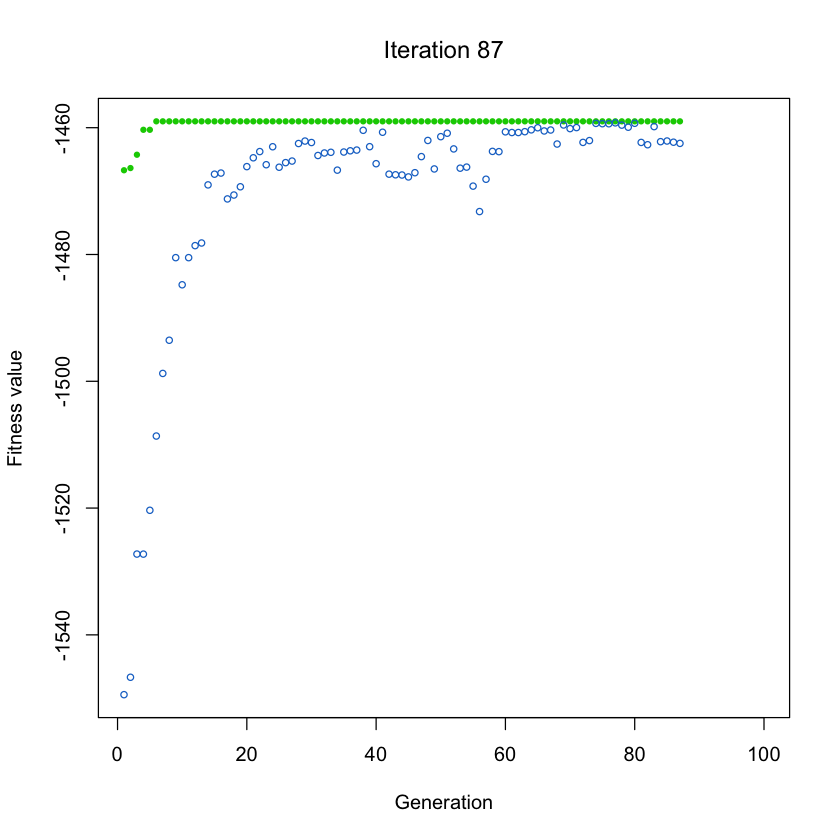

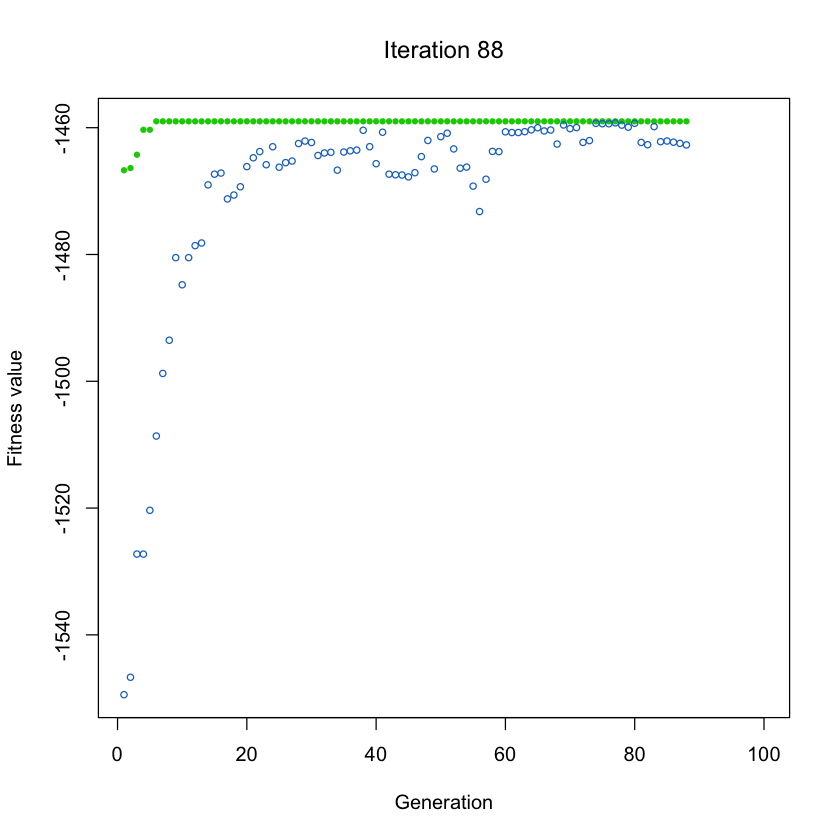

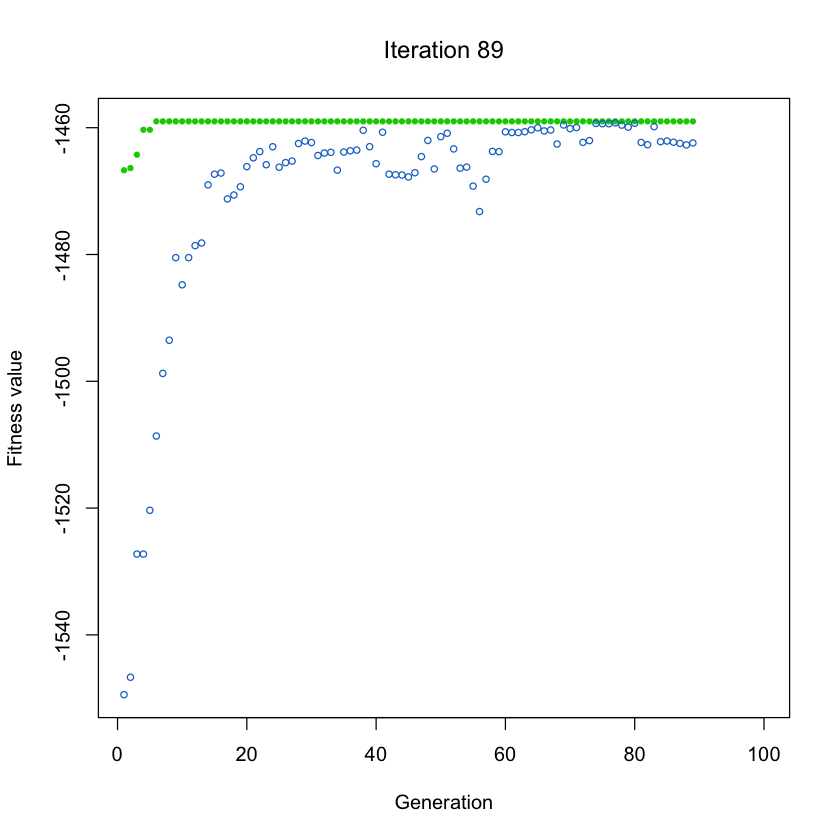

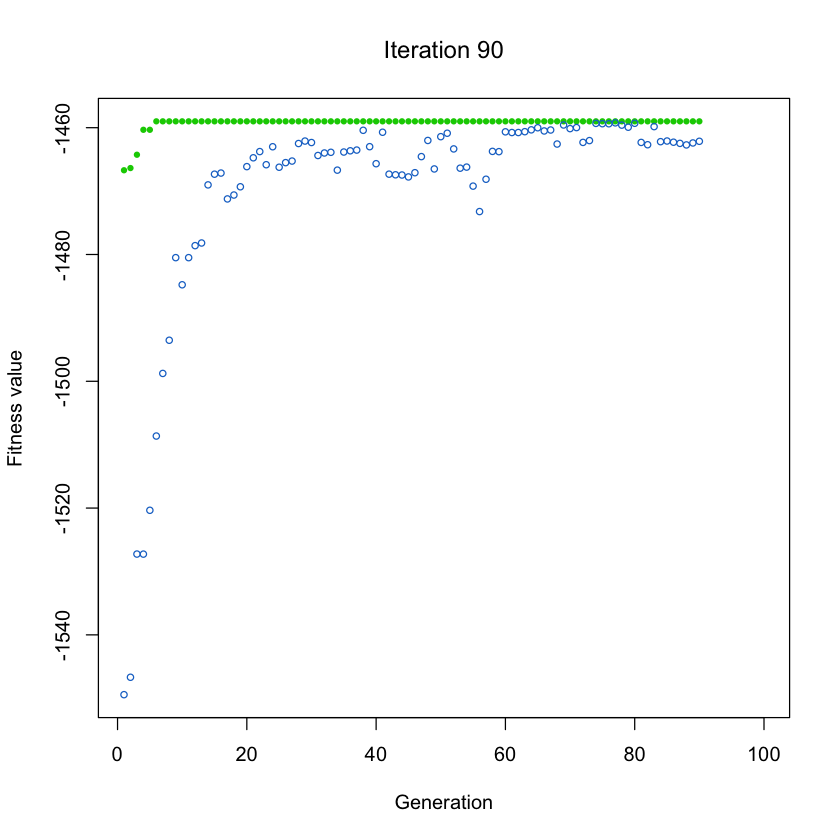

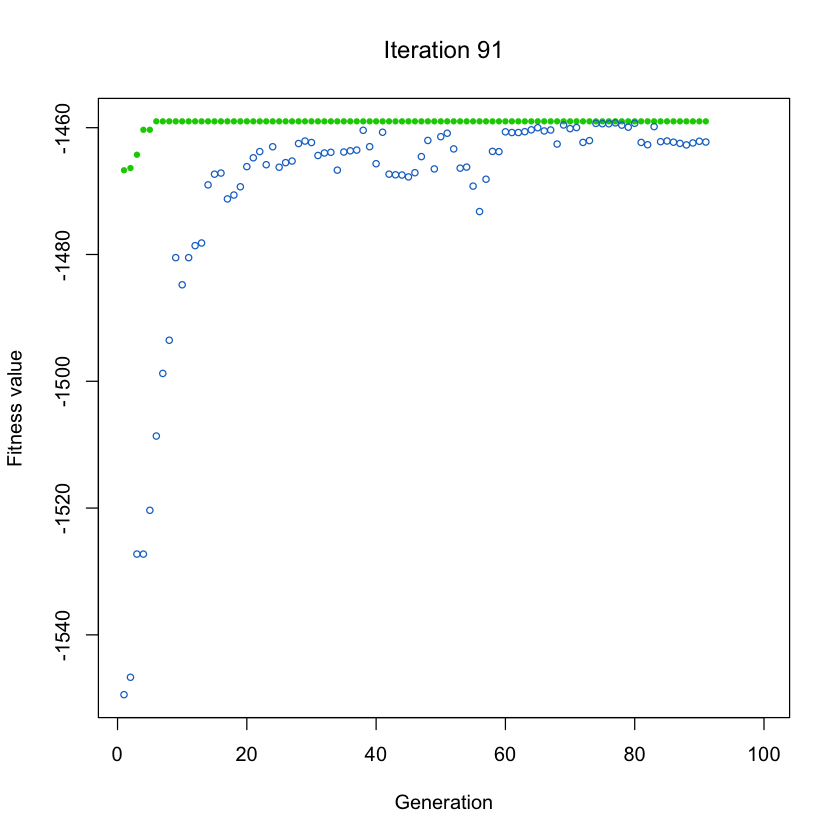

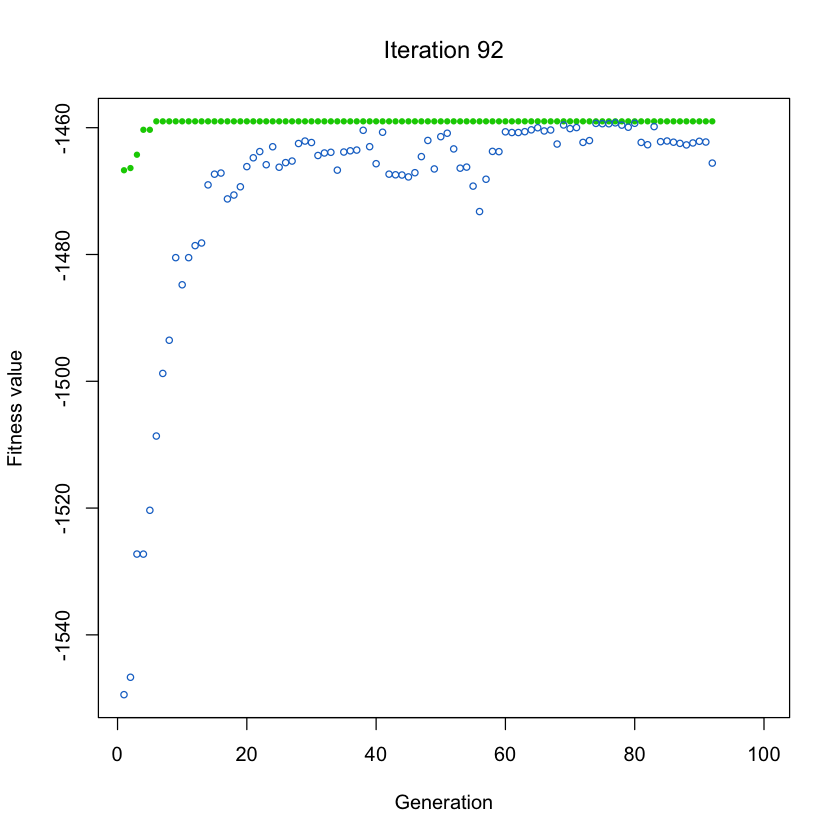

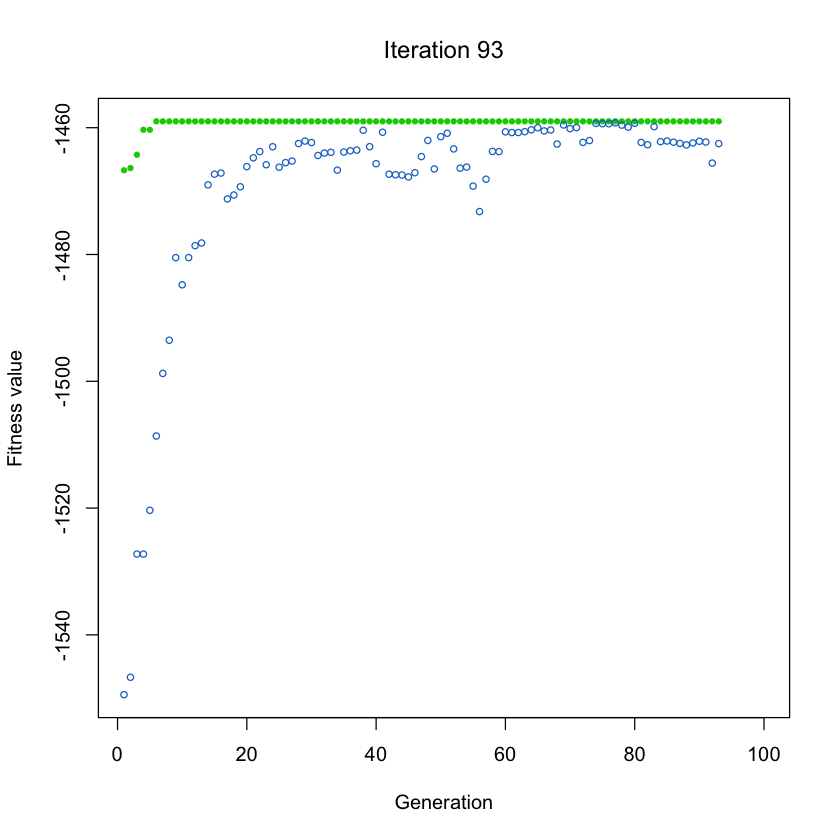

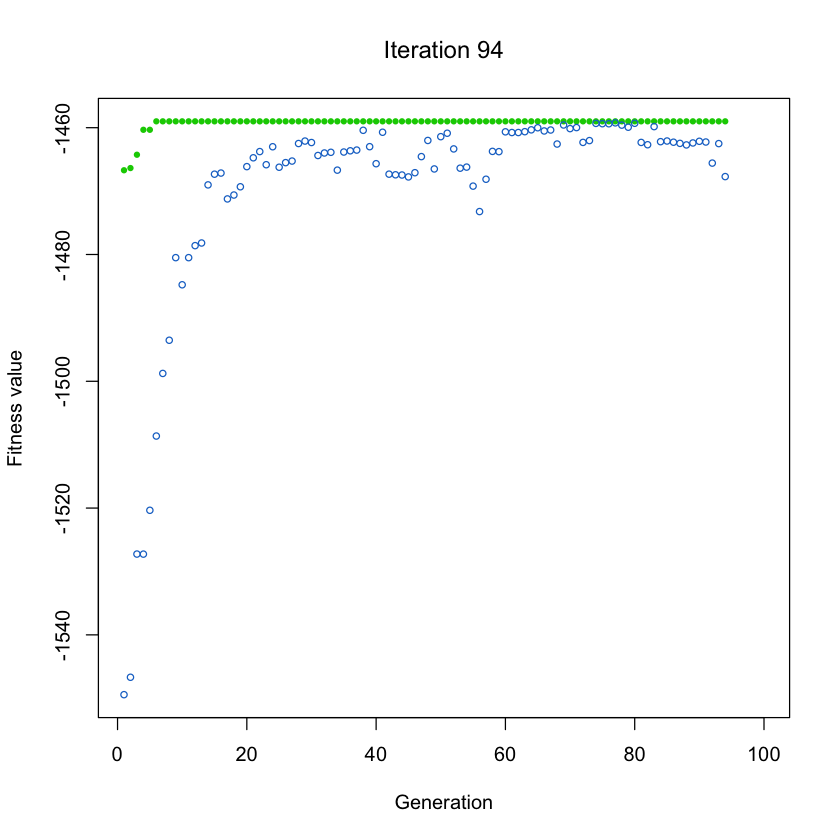

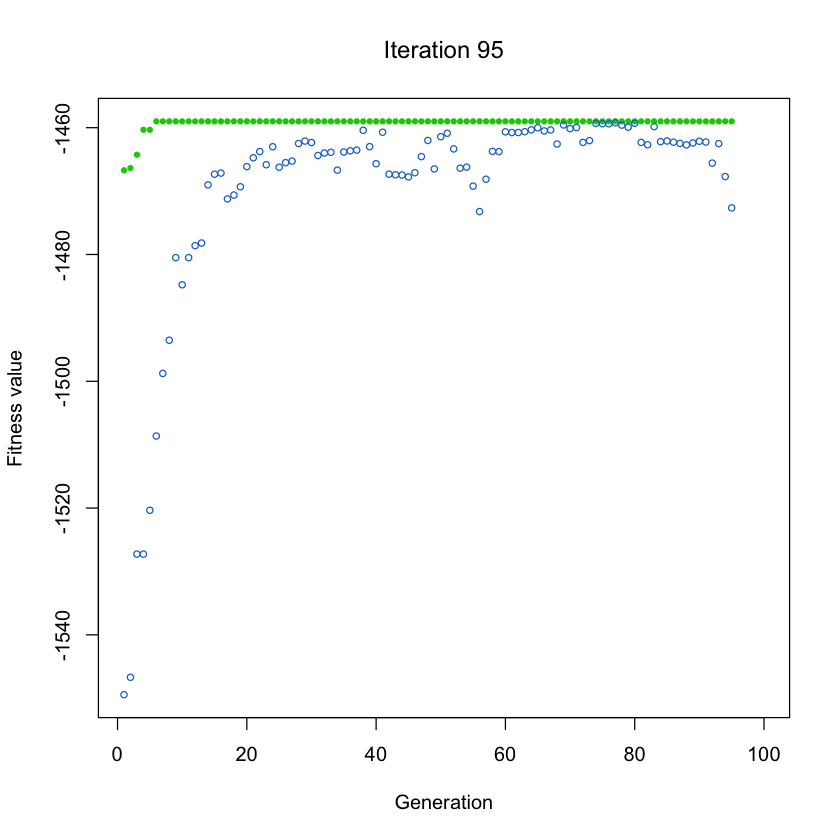

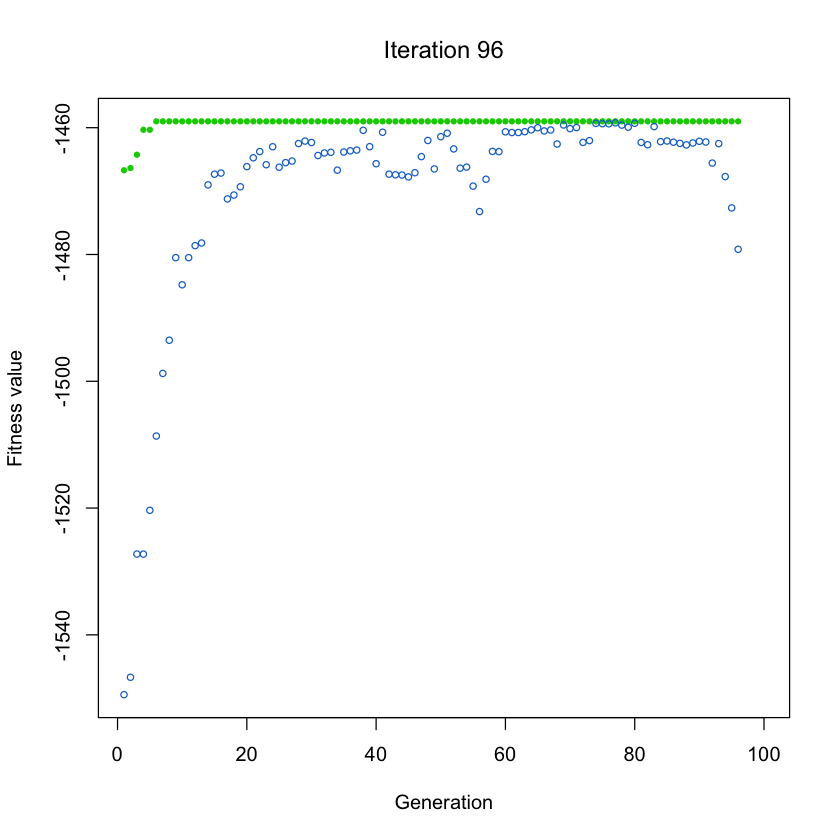

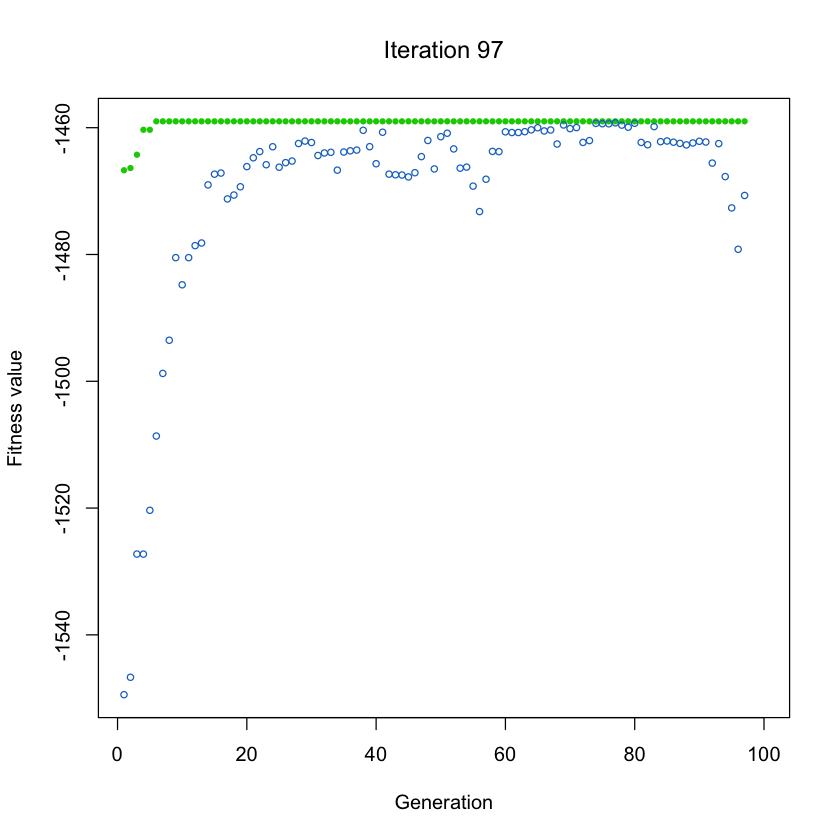

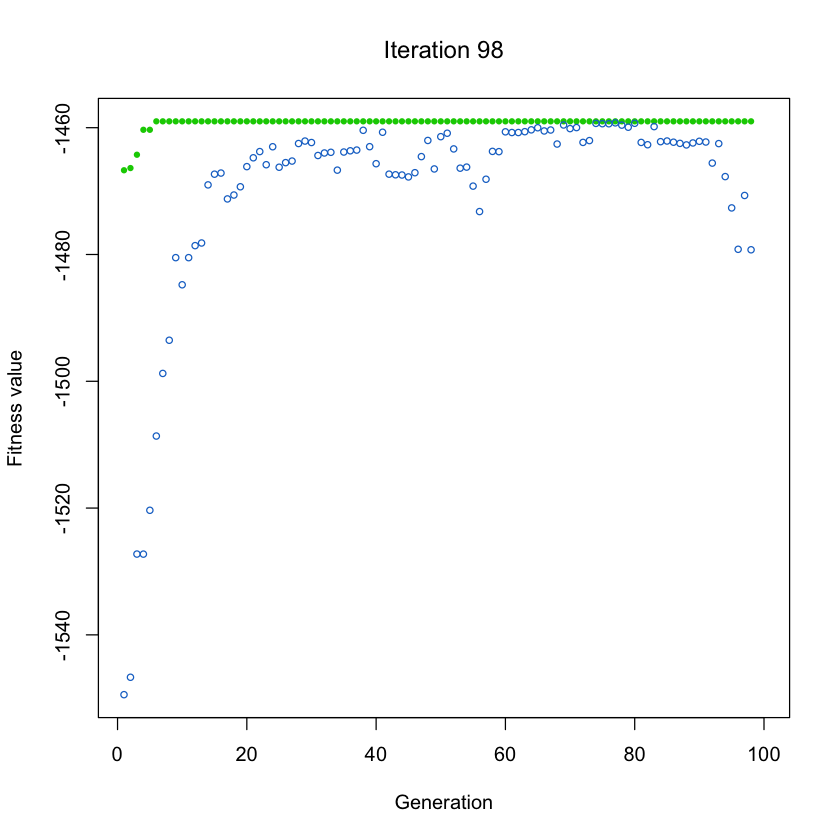

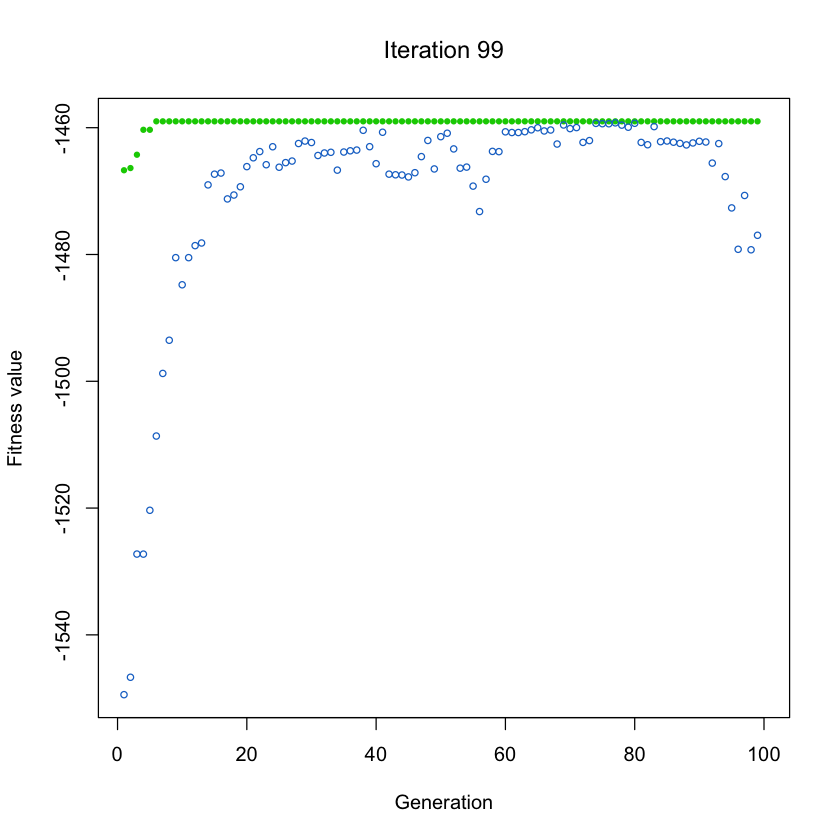

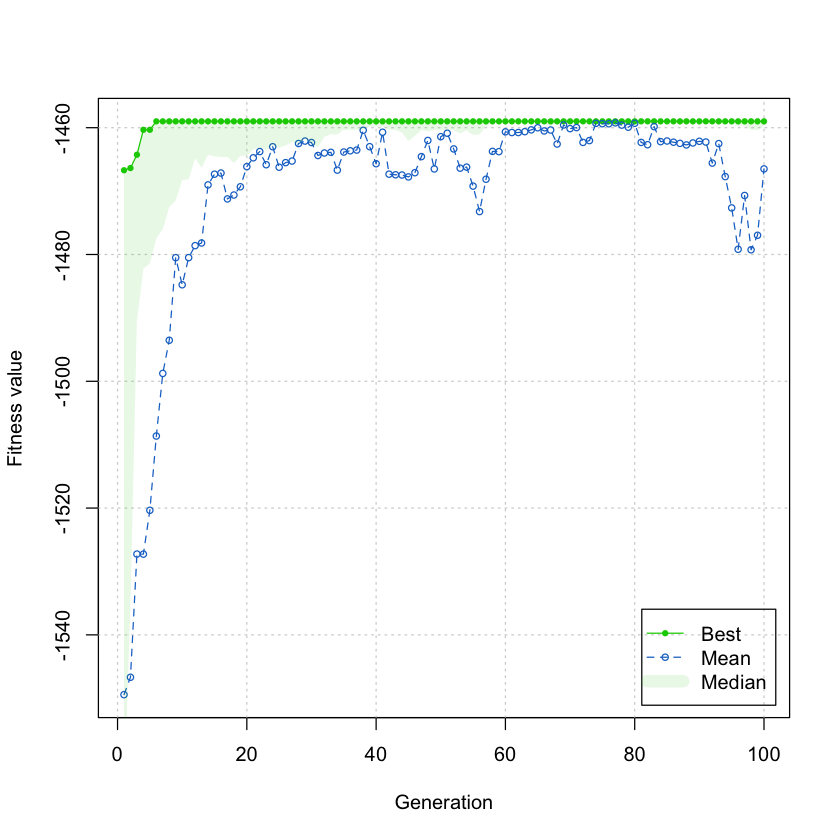

In [14]:
GA_3 <- ga("binary", fitness = fitness, nBits = ncol(x),
         names = colnames(x), monitor = plot)
plot(GA_3)

In [15]:
summary(GA_3)

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  binary 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 

GA results: 
Iterations             = 100 
Fitness function value = -1458.996 
Solution = 
     age weight height neck chest abdomen hip thigh knee ankle bicep forearm
[1,]   1      1      0    1     0       1   1     1    0     0     0       1
     wrist
[1,]     1

In [17]:
# 4.7. Constrained optimization(p27)
# ナップサック問題
p <- c(6, 5, 8, 9, 6, 7, 3)
w <- c(2, 3, 6, 7, 5, 9, 4)
W <- 9

In [20]:
knapsack <- function(x) {
    f <- sum(x * p)
    penalty <- sum(w) * abs(sum(x * w)-W)
    f - penalty
}

In [21]:
GA_4 <- ga(type = "binary", fitness = knapsack, nBits = length(w),
         maxiter = 1000, run = 200, popSize = 20)

summary(GA_4)

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  binary 
Population size       =  20 
Number of generations =  1000 
Elitism               =  1 
Crossover probability =  0.8 
Mutation probability  =  0.1 

GA results: 
Iterations             = 201 
Fitness function value = 15 
Solution = 
     x1 x2 x3 x4 x5 x6 x7
[1,]  1  0  0  1  0  0  0

In [16]:
#　長江さんが使ってる関数
makeGAmodel <- function(seriesShiftBinary, penaltyFunction, POP=3, MAX=100, RUN=100){
    options(warn=-1)
    system.time(
        GA <- ga(
            type = "binary",
            fitness = penaltyFunction,
            nBits = length(seriesShiftBinary),
            maxiter = MAX,    # 最大iteration数
            run = RUN,        
            popSize = POP,    # 1世代の子供の数
            pcrossover = 0.95,
            pmutation = 0.95,  # 突然変異率
            suggestions = seriesShiftBinary  # 初期値
        )
    )
    options(warn=0)
    return(GA)
}